<div style="text-align: center;">
    <h1 style="font-size: 20px;">
        Final project for the <strong style="font-size: 26px;">Management and Analysis of Physics Datasets </strong> course<br>
        <strong style="font-size: 46px; display: block; margin-top: 20px;">Batch analysis of cosmic rays using Drift Tubes</strong>
    </h1>
</div>

<hr style="border: 1px solid #000;">

<div style="display: flex; justify-content: space-between; align-items: center;">
    <div style="flex: 1; text-align: left;">
        <img src="./unipd_template.png" alt="Unipd template" width="500" style="margin-right: 100px; margin-left: 150px;">
    </div>
    <div>
        <img src="./pod_template.png" alt="PoD template" width="350">
    </div>
</div>

<hr style="border: 1px solid #000;">

<div style="display: flex; justify-content: space-between; align-items: left;">
    <div style="flex: 1;">
        <!-- Questo spazio può essere vuoto se non serve altro qui -->
    </div>
    <div style="flex: 1; text-align: left; font-size: 18px;">
        <p><strong style="font-size: 26px;">University of Padua - Department of Physics and Astronomy</strong></p>
        <p><strong>Degree course:</strong> Physics of Data</p>
        <p><strong>Course:</strong> Management and Analysis of Physics Datasets</p>
        <p><strong>Year:</strong> 2023-2024</p>
        <p><strong>Professor in charge:</strong> Jacopo Pazzini</p>
        <table style="margin: 0 auto; border-collapse: collapse; width: 80%; font-size: 16px;">
            <thead>
                <tr>
                    <th colspan="3" style="border: none; padding: 8px; text-align: center; font-weight: bold; font-size: 20px">Students</th>
                </tr>
                <tr>
                    <th style="border: none; padding: 8px;">Name</th>
                    <th style="border: none; padding: 8px;">ID</th>
                    <th style="border: none; padding: 8px;">Email</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td style="border: none; padding: 8px;">Ada D'Iorio</td>
                    <td style="border: none; padding: 8px;">2092320</td>
                    <td style="border: none; padding: 8px;">ada.diorio@studenti.unipd.it</td>
                </tr>
                <tr>
                    <td style="border: none; padding: 8px;">Dario Liotta</td>
                    <td style="border: none; padding: 8px;">2124229</td>
                    <td style="border: none; padding: 8px;">dario.liotta.1@studenti.unipd.it</td>
                </tr>
            </tbody>
        </table>
    </div>
</div>



A set of muon detectors have been built and installed in Legnaro INFN Laboratories (∼10 km far from Padova) and are currently used to collect signals from cosmic rays. The working principles of these detectors (named mini Drift Tubes or miniDTs) are based on ionization: charged particles traversing the volume of the detectors will ionize the gas mixture inside, thus producing electron-ion pairs. Specifically shaped electric fields make the electron cloud travel throughout the volume with an almost constant drift velocity ($v_{drift} = 53.8 \ \mu m/ns$). Near the sensing anode wire, the electric field intensifies, leading to additional ionization and avalanche effects, thereby amplifying the signal.

Signals generated by ionization events are collected on the anodic wire, then amplified, digitized, discriminated, and transmitted through a Data Acquisition (DAQ) system.

Within the DAQ system, a series of Field Programmable Gate Arrays (FPGAs) perform Time-to-Digital Conversion (TDC), associating a digital signal with each electron cloud based on the time of collection.
Each digitized signal is commonly referred to as a "hit" representing an ionization event within the detector.

<div style="text-align: center;">
    <img src="./muon-cell-schema.png" alt="Muon cell schema" width="500">
</div>

If the time of passage of the muon (usually referred to as $t_0$) is known, the TDC of a hit can be translated to a position inside the cell thanks to the constant $v_{drift}$, i.e:

$$ x_{hit} = (t_{hit}-t_0)v_{drift} $$

The time of passage of the muon is typically not known a priori and needs to be inferred from external information or geometrical considerations.
Additionally, there is an intrinsic left-right ambiguity associated with the time-to-space
conversion process. This means that the time information of a single hit is insufficient to
determine whether the muon passed through the right or left half of the cell.
To resolve this ambiguity and accurately reconstruct the trajectory of the muon, a full reconstruction of the track spanning multiple cells is required. By analyzing hits from multiple cells, it becomes possible to identify the track trajectory throughout one or more DT chambers and resolve the left-right ambiguity.




The geometry of one single detector (a miniDT “chamber”) is composed of 64 cells arranged in 4 layers of 16 cells each. Adjacent layers are staggered by half of a cell width.

Each cell has a transversal dimension of $42\times13 \ mm^2$ (width × height). The schema for one DT chamber is reported in the following figure:

<div style="text-align: center;">
    <img src="./chamber-schema.png" alt="Chamber schema" width="1000">
</div>

Four DT chambers are stacked on top of each other in a "muon-telescope" configuration.

Three chambers (0, 2, 3) are oriented in the same direction, while the fourth (1) is rotated $90$ degrees to measure from an orthogonal view. Two external detectors (plastic scintillator palettes, shown in blue in the figure) provide the external timing information for the passage of particles, hence supplying the $t_0$ information.

## Task

Starting from the raw data collected by the DAQ of the detector, this project will require reconstructing the local and global track, relying on the external timing reference provided by the scintillator.

## Data structure

The raw dataset is provided on a cloud storage s3 bucket hosted on Cloud Veneto.
Name of the Bucket: mapd-minidt-batch
Link to visualize the list all contained files: https://cloud-areapd.pd.infn.it:5210/swift/v1/AUTH_d2e941ce4b324467b6b3d467a923a9bc/mapd-minidt-batch/

The dataset is composed of multiple binary files encoding the stream of hits collected:
1. Every hit is encoded as a 64 bit word;
2. Each word has the exact same structure;
3. The 64b data-format complies to the following standard:
- $0-4$   (5 bits)  $\rightarrow$ `TDC`;
- $5-16$  (12 bits) $\rightarrow$ `BX`;
- $17-48$ (32 bits) $\rightarrow$ `ORBIT`;
- $49-57$ (9 bits)  $\rightarrow$ `CHAN`;
- $58-60$ (3 bits)  $\rightarrow$ `FPGA`;
- $61-63$ (3 bits)  $\rightarrow$ `HEAD`.

The data should be "unpacked" from raw objects into a structured format (dataframe).

# Requirements

## Libraries

In [1]:
## Standard python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import re
import struct
import collections
import itertools
from itertools import combinations, product  
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import to_rgba

## PySpark library
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, when, expr, array, udf, explode, count, first, pandas_udf, PandasUDFType
from pyspark.sql.functions import abs as abs_spark
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, LongType, FloatType, DoubleType, ArrayType
from pyspark.sql import functions as F

## Mask credentials
import configparser

## Spark session

In [2]:
config = configparser.ConfigParser()
config.read('./aws_credentials.txt')
access_key = config.get('DEFAULT', 'access_key')
secret_key = config.get('DEFAULT', 'secret_key')

cores      = 4
memory     = "2000m"
partitions = 24

spark = SparkSession.builder \
    .master("spark://master:7077")\
    .appName("MAPD B Project")\
    .config('spark.jars.packages', 'org.apache.hadoop:hadoop-common:3.3.4')\
    .config('spark.jars.packages', 'org.apache.hadoop:hadoop-aws:3.3.4')\
    .config("spark.executor.cores", cores)\
    .config("spark.executor.memory", memory)\
    .config("spark.sql.shuffle.partitions", partitions)\
    .config("spark.sql.execution.arrow.pyspark.enabled", "true")\
    .config("spark.sql.execution.arrow.pyspark.fallback.enabled", "false")\
    .config('spark.hadoop.fs.s3a.aws.credentials.provider', 'org.apache.hadoop.fs.s3a.SimpleAWSCredentialsProvider')\
    .config('spark.hadoop.fs.s3a.access.key', str(access_key))\
    .config('spark.hadoop.fs.s3a.secret.key', str(secret_key))\
    .config('spark.hadoop.fs.s3a.endpoint', 'https://cloud-areapd.pd.infn.it:5210')\
    .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
    .config("spark.hadoop.fs.s3a.metadatastore.impl", "org.apache.hadoop.fs.s3a.s3guard.NullMetadataStore") \
    .config("spark.hadoop.fs.s3a.path.style.access", "true") \
    .config("spark.hadoop.fs.s3a.connection.ssl.enabled","false") \
    .config("com.amazonaws.sdk.disableCertChecking","true") \
    .getOrCreate()


# Creating a spark context
sc = spark.sparkContext  

:: loading settings :: url = jar:file:/usr/local/spark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/diorio/.ivy2/cache
The jars for the packages stored in: /home/diorio/.ivy2/jars
org.apache.hadoop#hadoop-aws added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-5136ed16-fad0-4863-8cd2-70656813cba1;1.0
	confs: [default]
	found org.apache.hadoop#hadoop-aws;3.3.4 in central
	found com.amazonaws#aws-java-sdk-bundle;1.12.262 in central
	found org.wildfly.openssl#wildfly-openssl;1.0.7.Final in central
:: resolution report :: resolve 163ms :: artifacts dl 5ms
	:: modules in use:
	com.amazonaws#aws-java-sdk-bundle;1.12.262 from central in [default]
	org.apache.hadoop#hadoop-aws;3.3.4 from central in [default]
	org.wildfly.openssl#wildfly-openssl;1.0.7.Final from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------

## Benchmarking

In [3]:
'''
def get_nrun(cores, memory, partitions, directory):
    
    pattern = re.compile(rf"C{cores}-M{memory}-P{partitions}_Run-(\d+)\.txt")
    files = os.listdir(directory)
    matches = [int(m.group(1)) for f in files if (m := pattern.match(f))]

    if not matches:
        return 1
      
    return max(matches) + 1

nrun = get_nrun(cores, memory, partitions, "./Runs")
print(nrun)
'''

'\ndef get_nrun(cores, memory, partitions, directory):\n    \n    pattern = re.compile(rf"C{cores}-M{memory}-P{partitions}_Run-(\\d+)\\.txt")\n    files = os.listdir(directory)\n    matches = [int(m.group(1)) for f in files if (m := pattern.match(f))]\n\n    if not matches:\n        return 1\n      \n    return max(matches) + 1\n\nnrun = get_nrun(cores, memory, partitions, "./Runs")\nprint(nrun)\n'

In [4]:
'''
%cd "./Runs"

file_name = "C" + str(cores) + "-M" + memory + "-P" + str(partitions) + "_Run-" + str(nrun) + ".txt"
file = open(file_name, 'w')

def write_time(line):
    file.write(line + '\n')
'''

'\n%cd "./Runs"\n\nfile_name = "C" + str(cores) + "-M" + memory + "-P" + str(partitions) + "_Run-" + str(nrun) + ".txt"\nfile = open(file_name, \'w\')\n\ndef write_time(line):\n    file.write(line + \'\n\')\n'

In [5]:
#start_time = time.time()

# Data import and inspection

## Data unpacking and conversion

We want to convert the raw object in binary form contained into the files in a structured form (a dataframe).

In [6]:
def unpack_data(data):
  word_format = 'Q'
  word = struct.unpack(word_format, data)[0]
    
  TDC   = word         & 0x1F
  BX    = (word >> 5)  & 0xFFF
  ORBIT = (word >> 17) & 0xFFFFFFFF
  CHAN  = (word >> 49) & 0x1FF
  FPGA  = (word >> 58) & 0x7
  HEAD  = (word >> 61) & 0x7
    
  return [TDC, BX, ORBIT, CHAN, FPGA, HEAD]



rdd  = sc.binaryRecords('s3a://mapd-minidt-batch/data_*.dat', 8)
rdd2 = rdd.map(unpack_data)

df = rdd2.toDF(["TDC", "BX", "ORBIT", "CHAN", "FPGA", "HEAD"])

24/09/02 18:02:38 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties


In [7]:
df.show(10)

+---+----+----------+----+----+----+
|TDC|  BX|     ORBIT|CHAN|FPGA|HEAD|
+---+----+----------+----+----+----+
|  0|   0|4079645633| 100|   1|   1|
|  2|4064|4079645602| 100|   1|   0|
| 23|1476|4079645568| 100|   1|   4|
| 16| 653|4079645568| 100|   1|   5|
|  2|2922|3387200947|  75|   0|   2|
| 29|2227|3387200955| 105|   0|   2|
|  7|2234|3387200955| 107|   0|   2|
| 29| 476|3387200973| 126|   0|   2|
| 12|1797|3387200955|  55|   1|   2|
| 28|2165|3387200956|  36|   1|   2|
+---+----+----------+----+----+----+
only showing top 10 rows



In [8]:
#write_time(f"Data unpacking and conversion: {time.time() - start_time}")

## Dataset cleansing

We know that every entry beside the ones where `HEAD = 2` must be dropped.

In [9]:
df = df.filter(col("HEAD") == 2)
df = df.drop("HEAD")

df.show(10)

+---+----+----------+----+----+
|TDC|  BX|     ORBIT|CHAN|FPGA|
+---+----+----------+----+----+
|  2|2922|3387200947|  75|   0|
| 29|2227|3387200955| 105|   0|
|  7|2234|3387200955| 107|   0|
| 29| 476|3387200973| 126|   0|
| 12|1797|3387200955|  55|   1|
| 28|2165|3387200956|  36|   1|
| 14| 249|3387200970|  51|   1|
| 28| 475|3387200973|  90|   1|
| 16| 485|3387200973| 124|   0|
|  5| 480|3387200973| 127|   0|
+---+----+----------+----+----+
only showing top 10 rows



We now verify if there is some datum that is not in the range we expect (so `FPGA` values different from $0$ and $1$ and `CHAN` values not in the $[0,128]$ range).

In [10]:
df_not_in_range = df.filter((col('CHAN') > 128) | (col('FPGA') > 1))

df_not_in_range.groupBy('FPGA').count().show()
df_not_in_range.groupBy('CHAN').count().show()

+----+------+
|FPGA| count|
+----+------+
|   1|304521|
|   0|209373|
+----+------+



+----+------+
|CHAN| count|
+----+------+
| 138|513894|
+----+------+



We can observe that there are some outsiders inside the `CHAN` attribute, all equal to $138$, that we can drop.

In [11]:
df = df.filter(col('CHAN') != 138)

In [12]:
#write_time(f"Dataset cleansing: {time.time() - start_time}")

## Muon passages

We know that muon passages are associated with attributes `CHAN = 128` and simultaneously `FPGA = 1`, so we create another attribute named `SCINT` which is equal to $1$ when these conditions are satisfied and equal to $0$ when they are not, which tells us if the scintillator has revealed the passage of a muon.



In [13]:
df = df.withColumn('SCINT', when((col('CHAN') == 128) & (col('FPGA') == 1), 1).otherwise(0))

Having identified the scintillation events, we now choose to persist our dataframe in memory, since its size ($848.1 \ MB$) should fit inside the memory of the executors, in order to speed up computations.

In [14]:
#df = df.persist()
#df.count() #To trigger persist

Having the scintillator information, we can now count how many scintillation events are there per orbit. Hence, we inspect the number of hits and the number of scintillator hits for each orbit.

In [15]:
''''
n_hits = df.groupby('ORBIT')\
           .count()

bins, counts = n_hits.select('count')\
                     .rdd\
                     .histogram(list(np.arange(0, 80, 1)))

plt.hist(bins[:-1], bins, weights = counts[:], log = True, edgecolor = 'black')
plt.xlabel('Hits')
plt.ylabel('Counts')
plt.title('Counts per orbit')
plt.show()
'''

"'\nn_hits = df.groupby('ORBIT')           .count()\n\nbins, counts = n_hits.select('count')                     .rdd                     .histogram(list(np.arange(0, 80, 1)))\n\nplt.hist(bins[:-1], bins, weights = counts[:], log = True, edgecolor = 'black')\nplt.xlabel('Hits')\nplt.ylabel('Counts')\nplt.title('Counts per orbit')\nplt.show()\n"

In [16]:
'''
data_counts = df.groupby('ORBIT')\
                .agg(F.sum('SCINT').alias('n_scint'))

scint_counts = data_counts.select('n_scint').rdd.flatMap(lambda x: x).countByValue()
sorted_counts = sorted(scint_counts.items())
x, y = zip(*sorted_counts)

plt.bar(x, y, edgecolor = 'black')
plt.xlabel('Hits')
plt.ylabel('Counts')
plt.title('Scintillator counts per orbit')
plt.yscale('log')
plt.show()
'''

"\ndata_counts = df.groupby('ORBIT')                .agg(F.sum('SCINT').alias('n_scint'))\n\nscint_counts = data_counts.select('n_scint').rdd.flatMap(lambda x: x).countByValue()\nsorted_counts = sorted(scint_counts.items())\nx, y = zip(*sorted_counts)\n\nplt.bar(x, y, edgecolor = 'black')\nplt.xlabel('Hits')\nplt.ylabel('Counts')\nplt.title('Scintillator counts per orbit')\nplt.yscale('log')\nplt.show()\n"

Unfortunately, as it is possible to observe from the second plot, there is a lot of noise given by the passage of muons or other particles that haven't travelled inside the scintillators. In order to be able to detect the tracks of the particle and analyze them, we need to further filter the data. We choose to only consider orbits in which only one scintillation event has been registered, for two reasons:

* Hits inside orbits where no scintillator hit has been measured cannot be associated to a muon passage
* Hits inside orbits with two or more scintillator hits cannot be definitively attributed to a single muon event, as it is not possible to distinguish to which muon passage each hit belongs.
  
In order to achieve this, we group on the orbits that present one and only one signal from the scintillator in the same orbit. We are looking for something of the form:
 
```python
        TDC	  BX	    ORBIT     CHAN      FPGA  SCINT
4	2	2922     3387200947	75	  0     0
5	29	2227     3387200955	128	  1     1    # <- there is a count from the scintillator
6	7	2234     3387200955	107	  0     0    # <- in the same orbit there is also another count
7	29	476      3387200973	126	  0     0

```

In [17]:
orbits_w_scint = df.filter(col('SCINT') == 1).select('ORBIT') 
repeated_orbits = orbits_w_scint.groupBy('ORBIT').count().filter(col('count') > 1).select('ORBIT')

df = df.join(orbits_w_scint, 'ORBIT', 'inner')
df = df.join(repeated_orbits, 'ORBIT', 'left_anti')

We now repeat the same histogram seen above that shows the number of hits per orbit, having filtered the dataset.

In [18]:
## Riconvertito in Spark 
'''
n_bins = 250
bin_edges = np.linspace(0, 100, n_bins + 1).tolist()  

n_hits = df.groupBy('ORBIT')\
           .count()\
           .rdd.flatMap(lambda x: x)  

counts = n_hits.histogram(bin_edges)

plt.bar(bin_edges[:-1], counts[1], width=np.diff(bin_edges), edgecolor='black', align='edge')
plt.xlabel('Hits')
plt.ylabel('Frequency')
plt.title('Counts per ORBIT with SCINT = 1')
plt.xlim(0, 40)
plt.show()
'''

"\nn_bins = 250\nbin_edges = np.linspace(0, 100, n_bins + 1).tolist()  \n\nn_hits = df.groupBy('ORBIT')           .count()           .rdd.flatMap(lambda x: x)  \n\ncounts = n_hits.histogram(bin_edges)\n\nplt.bar(bin_edges[:-1], counts[1], width=np.diff(bin_edges), edgecolor='black', align='edge')\nplt.xlabel('Hits')\nplt.ylabel('Frequency')\nplt.title('Counts per ORBIT with SCINT = 1')\nplt.xlim(0, 40)\nplt.show()\n"

Another problem that should be addressed regards the number of hits registered for each orbit. A muon travelling inside the detector is going to trigger at most $16$ channels, given the geometry of the problem. An orbit with a number of channels bigger than $16$ means that various phenomena could have happened: multiple scattering inside the detector, multiple particles arriving in coincidence in the apparatus and so on.

We now ask ourselves: is there a way to further investigate for noise, i. e. drop off hits we know for sure are not related to any muon passage? The answer is yes, but we need to evaluate time information associated with hits.

In [19]:
#write_time(f"Muon passages: {time.time() - start_time}")

## Spatial prospective

In this section we are interested in an analysis of the spatial distribution of the muons before starting to reconstruct the tracks. From the `CHAN` column of the dataframe, it is possible to reconstruct the chamber that actually collected the hit. Another function, `identify_layer()`, is able to distinguish the layer that contains the drift tube that actually collected the muon. By convention, we choose $-1$ as a value in scint cases in both `CHAMBER` and `LAYER` attribute.

In [20]:
# Chamber information
df = df.withColumn('CHAMBER',
                   when((col('FPGA') == 0) & (col('CHAN') >= 0) & (col('CHAN') <= 63), 0)
                   .when((col('FPGA') == 0) & (col('CHAN') >= 64) & (col('CHAN') <= 127), 1)
                   .when((col('FPGA') == 1) & (col('CHAN') >= 0) & (col('CHAN') <= 63), 2)
                   .when((col('FPGA') == 1) & (col('CHAN') >= 64) & (col('CHAN') <= 127), 3)
                   .otherwise(-1))

# Layer information 
df = df.withColumn('LAYER',
                   when(col('CHAN') % 4 == 0, 1)
                    .when(col('CHAN') % 4 == 2, 2)
                    .when(col('CHAN') % 4 == 1, 3)
                    .when(col('CHAN') % 4 == 3, 4)
                    .otherwise(-1)) # Do il valore di LAYER -1 al caso in cui il channel non sia incluso in nessuna di queste sezioni 

df = df.withColumn('LAYER', when(col('CHAMBER') == -1, -1).otherwise(col('LAYER')))

df.show(10)

+-------+---+----+----+----+-----+-------+-----+
|  ORBIT|TDC|  BX|CHAN|FPGA|SCINT|CHAMBER|LAYER|
+-------+---+----+----+----+-----+-------+-----+
|6381127|  1| 997|  43|   1|    0|      2|    4|
|6381127|  5| 994| 118|   1|    0|      3|    2|
|6381127|  9| 995| 128|   1|    1|     -1|   -1|
|6381127| 28| 997|  44|   1|    0|      2|    1|
|6381127| 12| 992| 119|   1|    0|      3|    4|
|6381127| 30|1000|  45|   1|    0|      2|    3|
|6381127| 26|1002| 120|   1|    0|      3|    1|
|6381127|  1| 993| 117|   0|    0|      1|    3|
|6381127|  4| 996| 116|   0|    0|      1|    1|
|6381127| 19|1003| 119|   0|    0|      1|    4|
+-------+---+----+----+----+-----+-------+-----+
only showing top 10 rows



One thing we can investigate is the distribution of hits per layer, in order to verify if there is any "preferred" layer or chamber in the muon passages.

In [21]:
'''
freqs = df.filter(col('CHAMBER') != -1)\
.groupby('CHAMBER', 'LAYER')\
          .count()

freqs = freqs.withColumn('LABEL', F.concat(col('CHAMBER'), F.lit('-'), col('LAYER'))).toPandas()
freqs = freqs.sort_values(by=['CHAMBER', 'LAYER']).reset_index()
'''

"\nfreqs = df.filter(col('CHAMBER') != -1).groupby('CHAMBER', 'LAYER')          .count()\n\nfreqs = freqs.withColumn('LABEL', F.concat(col('CHAMBER'), F.lit('-'), col('LAYER'))).toPandas()\nfreqs = freqs.sort_values(by=['CHAMBER', 'LAYER']).reset_index()\n"

In [22]:
'''
labels = []
colors = []

bars_per_group = 4

for i, row in freqs.iterrows():
    labels.append(f"{row['CHAMBER']}-{row['LAYER']}")
    colors.append(plt.cm.tab10(row['LAYER']))
    
    # Creating spaces between chambers for a better visualization
    if (i+1) % bars_per_group == 0:
        labels.append(' ' * i)
        colors.append('white')

frequencies = np.array(freqs['count'], dtype = float)
frequencies = np.insert(frequencies, np.array([4, 8, 12, 16]), np.nan)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(labels, frequencies, color = colors, edgecolor = 'black', width = 0.8)
ax.set_xlabel('Chamber-Layer Combination')
ax.set_ylabel('Frequency')
ax.set_title('Hit frequency per Chamber-Layer combination')
plt.xticks(rotation=45)
plt.tight_layout()


# Legend
unique_layers  = sorted(freqs['LAYER'].unique())
legend_labels  = [f'Layer {layer}' for layer in unique_layers]
legend_handles = [plt.Rectangle((0,0),1,1, color = plt.cm.tab10(layer)) for layer in unique_layers]
plt.legend(legend_handles, legend_labels, loc = 'upper left')

plt.show()
'''

'\nlabels = []\ncolors = []\n\nbars_per_group = 4\n\nfor i, row in freqs.iterrows():\n    labels.append(f"{row[\'CHAMBER\']}-{row[\'LAYER\']}")\n    colors.append(plt.cm.tab10(row[\'LAYER\']))\n    \n    # Creating spaces between chambers for a better visualization\n    if (i+1) % bars_per_group == 0:\n        labels.append(\' \' * i)\n        colors.append(\'white\')\n\nfrequencies = np.array(freqs[\'count\'], dtype = float)\nfrequencies = np.insert(frequencies, np.array([4, 8, 12, 16]), np.nan)\n\n# Plot\nfig, ax = plt.subplots(figsize=(12, 6))\nbars = ax.bar(labels, frequencies, color = colors, edgecolor = \'black\', width = 0.8)\nax.set_xlabel(\'Chamber-Layer Combination\')\nax.set_ylabel(\'Frequency\')\nax.set_title(\'Hit frequency per Chamber-Layer combination\')\nplt.xticks(rotation=45)\nplt.tight_layout()\n\n\n# Legend\nunique_layers  = sorted(freqs[\'LAYER\'].unique())\nlegend_labels  = [f\'Layer {layer}\' for layer in unique_layers]\nlegend_handles = [plt.Rectangle((0,0),1,1,

On average, chambers $1$ and $2$ have more counts than chambers $0$ and $3$. This is probably due to the fact that the formers are placed between the two scintillators, where muon passages are registered, so - considering the flux of muons coming from space - it's more probable for the muons to pass through them while also crossing the scintillators.

This reasoning, however, should only explain the lack of hits in chamber $3$ and not in chamber $0$. We think that the different orientation of the chamber $1$ may cause the registration of some tracks that don't cross any chamber $0$ cell.

We now want to analyze the "frontal" prospective of the experiment. For this purpose we created a function named `get_section()`, which separates each layer into $16$ sections. We expect a higher number of counts in the sections closest to the scintillator.

In [23]:
# Dividing each layer into 16 sections to better study the distribution of the muons 
def get_section(chamber, chan):

    block1 = [i for i in range(0, 64)] 
    block2 = [i for i in range(64, 128)]

    sub_lists1 = [block1[i:i + 4] for i in range(0, len(block1), 4)]
    sub_lists2 = [block2[i:i + 4] for i in range(0, len(block2), 4)]

    
    if chamber == 0 or chamber == 2:
         section = next((index for index, sublist in enumerate(sub_lists1) if chan in sublist), -1)
         
    elif chamber == 1 or chamber == 3:
         section = next((index for index, sublist in enumerate(sub_lists2) if chan in sublist), -1)

    elif chamber == -1:
        section = np.nan

    return(section)


We now plot the histogram of counts per section. Due to the different orientation of the chamber $1$ we will consider also the case where those hits are excluded from the counts.

In [24]:
def view_sections(event, sections, title = 'Counts per section', flag = True):
   
    sections_cleaned = [x if not np.isnan(x) else -2 for x in sections]
    
    # Count occurrences manually
    occurrences = {}
    for section in sections_cleaned:
        if section in occurrences:
            occurrences[section] += 1
        else:
            occurrences[section] = 1
    elements = sorted(occurrences.keys())
    
    counts = [occurrences[element] for element in elements]
   
    # Plotting only the histogram
    if flag == False:
      fig, ax = plt.subplots(1, 1, figsize = (10, 5))
      ax.bar(elements, counts, edgecolor = 'black')
      ax.set_xlabel('Section')
      ax.set_ylabel('Counts')
      ax.set_title(title)
      ax.set_xticks([i for i in range(0, len(elements)-1)])
      ax.set_xlim(-1, len(elements)-1)
      ax.tick_params(axis = 'x', rotation = 45)
      plt.show() 

    # Plotting both the histogram and the schema
    else:
        # Histogram
        fig, ax = plt.subplots(2, 1, figsize=(10, 10))     
        ax[0].bar(elements, counts, edgecolor = 'black')
        ax[0].set_xlabel('Section')
        ax[0].set_ylabel('Counts')
        ax[0].set_title(title)
        ax[0].set_xticks([i for i in range(0, len(elements)-1)])
        ax[0].set_xlim(-1, len(elements)-1)
        ax[0].tick_params(axis = 'x', rotation = 45)

        # Schema

        # Parameters
        w, h = 1, 13/42
        x_rect = np.arange(-8*w, 8*w, w)
        z_rect = np.arange(-2*h, 2*h, h)
        base_colors = plt.cm.tab20(np.linspace(0, 1, 16))
        colors = [to_rgba(c, alpha=0.5) for c in base_colors] 
        scintillator_height = 0.3
        scintillator_y = -3.75*h - scintillator_height/2
        scintillator_x_start = 0.5*w + 7.5 + 0.20
        scintillator_width = 4.5*w - 0.5 - 0.20

        # Drawning
        ax[1].set_xlim(-9*w, 9*w)
        ax[1].set_ylim(-2*h, 2*h)
        counter = 0
        for i in range(4):
            if i % 2 == 0:
                x = x_rect + w/2 + 7
            else:
                x = x_rect + 7
            for j in range(16):
                if counter <= 15:
                   ax[1].add_patch(Rectangle((x[j], z_rect[i]), w, h, lw=3, edgecolor='gray', facecolor=colors[j], label = f'Section {j}'))
                else:
                   ax[1].add_patch(Rectangle((x[j], z_rect[i]), w, h, lw=3, edgecolor='gray', facecolor=colors[j]))
                counter += 1

        ax[1].add_patch(Rectangle((scintillator_x_start, scintillator_y), scintillator_width, scintillator_height,
                              lw=2, edgecolor='blue', facecolor='lightblue', alpha=0.5, hatch='/', label = 'Scintillator'))
        ax[1].axis('equal')
        ax[1].set_xticks([i for i in range(16)])
        ax[1].set_title('Experimental apparatus')


        # Legend
        legend = ax[1].legend(loc = 'upper left', bbox_to_anchor = (1, 1), frameon = True, shadow = True)
        frame = legend.get_frame()
        frame.set_facecolor('white')
        frame.set_alpha(0.8)
        plt.setp(legend.get_texts(), color = 'black') 
    
        plt.tight_layout()
        plt.show()


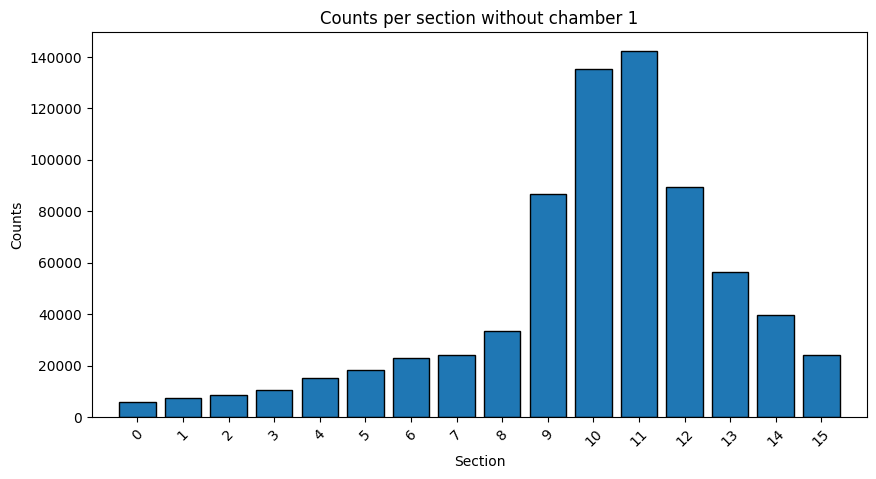

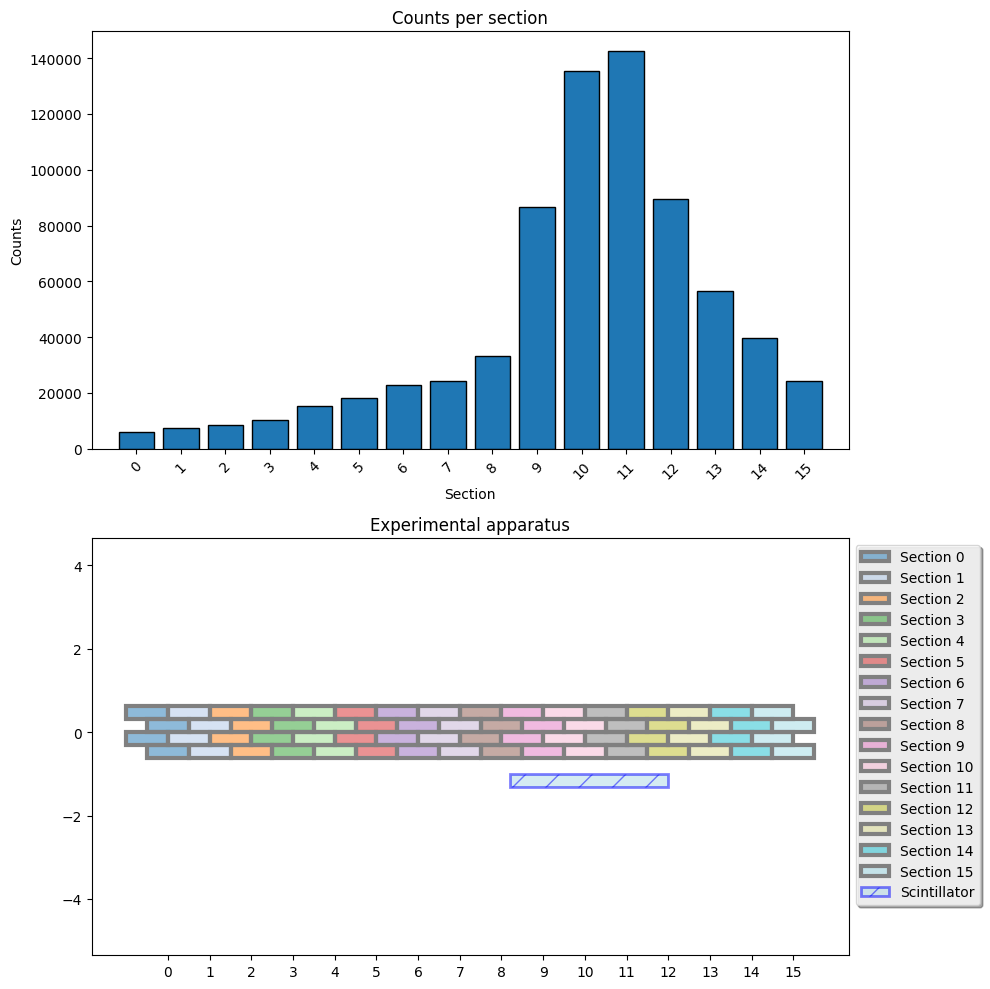

In [25]:
sections = df.rdd.map(lambda row: get_section(row['CHAMBER'], row['CHAN'])).collect()
sections = np.array(sections).flatten()

df_wo_chamber1       = df.filter(col('CHAMBER') != 1)
sections_wo_chamber1 = df.rdd.map(lambda row: get_section(row['CHAMBER'], row['CHAN'])).collect()
sections_wo_chamber1 = np.array(sections_wo_chamber1).flatten()

view_sections(df_wo_chamber1, sections_wo_chamber1, title = 'Counts per section without chamber 1', flag = False)
view_sections(df, sections, flag = True)

Results reflect our expectations. Also, it doesn't seem to be a real difference not considering chamber $1$ hits.

In [26]:
#write_time(f"Spatial prospective: {time.time() - start_time}")

## Layer cleansing 

Before proceiding with the hit time information, it is important to perform another cleaning for each group of events. In particular, we want to drop all the cases in which two hits are recorded in the same layer (in the same `ORBIT` and `CHAMBER`). In order to do so, we need to identify and clean for all the events that are resticted in a given zone inside the chamber. 

For each `ORBIT` and `CHAMBER`, we calculate the mean of the section column. We then consider a range around this mean defined as $\pm 3$ to filter only the hits within this interval. In a second step, we remove all hits where the section deviates from the mean (`mean(SECTION)`) by more than $1.5$ standard deviations.



In [27]:
# introduco una colonna section nel dataframe, di modo da pulire per layer 

df = df.withColumn(
    "SECTION",
    when(col("CHAN") < 64, (col("CHAN") / 4).cast("integer"))      # NB che section 16 corrisponde a scint = 1, pertanto va eliminata (rovina  tutta la media)
    .otherwise(((col("CHAN") - 64) / 4).cast("integer"))
)


df.show(10)

+-------+---+----+----+----+-----+-------+-----+-------+
|  ORBIT|TDC|  BX|CHAN|FPGA|SCINT|CHAMBER|LAYER|SECTION|
+-------+---+----+----+----+-----+-------+-----+-------+
|1135298| 10|2938|  47|   1|    0|      2|    4|     11|
|1135298| 10|2941| 128|   1|    1|     -1|   -1|     16|
|1135298| 25|2938|  21|   0|    0|      0|    3|      5|
|1135298|  9|2938| 118|   0|    0|      1|    2|     13|
|1135298| 14|2939| 116|   0|    0|      1|    1|     13|
|1135298| 17|2944|  20|   0|    0|      0|    1|      5|
|1135298|  7|2939| 117|   0|    0|      1|    3|     13|
|1135298|  7|2949|  22|   0|    0|      0|    2|      5|
|1135298| 21|2943|  46|   1|    0|      2|    2|     11|
|1135298|  7|2944|  48|   1|    0|      2|    1|     12|
+-------+---+----+----+----+-----+-------+-----+-------+
only showing top 10 rows



In [28]:
total_elements = df.count()

stats_df = df.filter(col('SCINT') != 1)\
             .groupBy('ORBIT', 'CHAMBER').agg( 
               F.round(F.mean('SECTION')).alias('mean_section'),
               F.stddev('SECTION').alias('std_dev_section')
) 

stats_df = df.filter(col('SCINT') != 1)\
             .join(stats_df, on = ['ORBIT', 'CHAMBER'])

# Filtering on mean and std dev 
result_df = stats_df.withColumn(
    'good_events_mean',
    when(
        (col('SECTION') >= (col('mean_section') - 3)) & 
        (col('SECTION') <= (col('mean_section') + 3)), 
        1
    ).otherwise(0)
).withColumn(
    'good_events_stddev',
    when(
        (col('std_dev_section') <= 1.5), 
        1
    ).otherwise(0)
).withColumn(
    'good_events',
    when(
        (col('good_events_mean') == 1) & (col('good_events_stddev') == 1), 
        1
    ).otherwise(0)
).filter(col('good_events') == 1)\
 .drop('mean_section', 'std_dev_section', 'good_events_mean', 'good_events_stddev', 'good_events')

df_scint = df.filter(col('SCINT') == 1)\
             .join(result_df.select('ORBIT').distinct(), on = 'ORBIT', how = 'inner')

df = result_df.unionByName(df_scint)

df.show(10)

+--------+-------+---+----+----+----+-----+-----+-------+
|   ORBIT|CHAMBER|TDC|  BX|CHAN|FPGA|SCINT|LAYER|SECTION|
+--------+-------+---+----+----+----+-----+-----+-------+
|30251752|      1| 22| 901| 102|   0|    0|    2|      9|
|30251752|      1| 23| 900| 103|   0|    0|    4|      9|
|30251752|      1| 29| 909| 104|   0|    0|    1|     10|
|30251752|      1|  6| 914| 105|   0|    0|    3|     10|
|33443771|      2| 21|1079|  42|   1|    0|    2|     10|
|33443771|      2| 18|1081|  43|   1|    0|    4|     10|
|33443771|      2| 10|1090|  45|   1|    0|    3|     11|
|33443771|      2| 13|1088|  42|   1|    0|    2|     10|
|33443771|      2|  5|1092|  44|   1|    0|    1|     11|
|32032286|      3|  3|2250| 103|   1|    0|    4|      9|
+--------+-------+---+----+----+----+-----+-----+-------+
only showing top 10 rows



In [29]:
# Adesso controlliamo se delle entries siano state droppate oppure no:

final_elements = df.count()

print('Number of events rejected: ', total_elements - final_elements)

Number of events rejected:  117907


In [30]:
# Inserisco qui un altro persist per velocizzare i calcoli

df = df.persist() 

## Hit time information

Information about time is provided by three attributes: `ORBIT`, `BX` and `TDC`. We can evaluate the absolute time associated to each hit in nanoseconds using the formula

$$t_{abs} = 25\cdot\left(\texttt{ORBIT} * 3564 + \texttt{BX} + \texttt{TDC}/30\right)$$

In [31]:
df = df.withColumn("T_ABS", 25 * (col("ORBIT") * 3564 + col("BX") + col("TDC") / 30))

In order to compare the time of chamber hits with the time of scintillation events we need to consider the estimated offset.

In [32]:

df = df.withColumn('OFFSET', 
                   when(col('CHAMBER') == 0, 95.0 - 1.1)
                   .when(col('CHAMBER') == 1, 95.0 + 6.4)
                   .when(col('CHAMBER') == 2, 95.0 + 0.5)
                   .when(col('CHAMBER') == 3, 95.0 - 2.6)
                   .otherwise(0.0))


df = df.withColumn("T_ABS", col("T_ABS") + (col("OFFSET")))\
       .drop('OFFSET')


df.show(10)

+-------+-------+---+----+----+----+-----+-----+-------+--------------------+
|  ORBIT|CHAMBER|TDC|  BX|CHAN|FPGA|SCINT|LAYER|SECTION|               T_ABS|
+-------+-------+---+----+----+----+-----+-----+-------+--------------------+
|2110705|      1| 26|2405| 102|   0|    0|    2|      9|1.880638757480666...|
|2110705|      1| 29|2405| 103|   0|    0|    4|      9|1.880638757505666...|
|2110705|      1| 21|2416| 100|   0|    0|    1|      9|   1.880638760189E11|
|2110705|      1|  1|2416| 101|   0|    0|    3|      9|1.880638760022333...|
|2110705|      1|  5|2423| 100|   0|    0|    1|      9|1.880638761805666...|
|3408118|      0| 28|2962|  56|   0|    0|    1|     14|3.036633879672333...|
|3408118|      0|  9|2962|  57|   0|    0|    3|     14|   3.036633879514E11|
|3408118|      0| 19|2973|  59|   0|    0|    4|     14|3.036633882347333...|
|2229367|      1| 27|3324| 120|   0|    0|    1|     14|   1.986366829239E11|
|2229367|      1| 24|3328| 119|   0|    0|    4|     13|   1.986

Now we have all the temporal information we need.

We can do some physical considerations knowing the geometrical structure of the detector; in fact, each cell has width equal to $42 \ mm$, and each muon passage is revelead via ionization, i. e. an electron that moves inside the cell from the cathode (at the edge) to the anode wire (at the center) with constant velocity $v_{drift}$. Since we know the maximum distance that can be covered by electrons (half of the cell width, $21 \ mm$), and we also know $v_{drift}$, we can evaluate the maximum time for which an hit can be causally connected with a scintillation event:

$$t_{max}=\frac{\frac{w}{2}}{v_{drift}}=\frac{21\cdot10^3 \ \mu m}{53.8 \ \frac{\mu m}{ns}}\simeq390.33 \ ns$$

This means that any hit more than $390 \ ns$ temporally distant cannot be related to any muon transition and we can drop it off.

In [33]:
scints = df.filter(col("SCINT") == 1)\
           .select("ORBIT", col("T_ABS").alias("T_ABS_SCINT"))\

df = df.join(scints, on = "ORBIT", how = "left")\
       .withColumn("T_DIFF", abs_spark(col("T_ABS") - col("T_ABS_SCINT")))\
       .drop("T_ABS_SCINT")


df.show(10)

+-------+-------+---+----+----+----+-----+-----+-------+--------------------+------+
|  ORBIT|CHAMBER|TDC|  BX|CHAN|FPGA|SCINT|LAYER|SECTION|               T_ABS|T_DIFF|
+-------+-------+---+----+----+----+-----+-----+-------+--------------------+------+
|1135298|     -1| 10|2941| 128|   1|    1|   -1|     16|1.011551253333333...|   0.0|
|1297227|     -1|  5|1350| 128|   1|    1|   -1|     16|1.155829594541666...|   0.0|
|1340132|     -1| 16|1800| 128|   1|    1|   -1|     16|1.194058062133333...|   0.0|
|1731864|     -1| 22|3392| 128|   1|    1|   -1|     16|1.543091672183333...|   0.0|
|2110705|     -1| 20|2406| 128|   1|    1|   -1|     16|1.880638756666667E11|   0.0|
|2133809|     -1| 18|1782| 128|   1|    1|   -1|     16|    1.90122426465E11|   0.0|
|2249827|     -1| 10|2099| 128|   1|    1|   -1|     16|2.004596381833333E11|   0.0|
|2673209|     -1|  2|1592| 128|   1|    1|   -1|     16|2.381829617016667E11|   0.0|
|3408118|     -1| 12|2964| 128|   1|    1|   -1|     16|     3.03

In [34]:
'''
bin_edges = list(np.arange(0, 1001, 5)) 

# Calcolare le frequenze dei valori di T_DIFF
n_hits = df.filter(col('T_DIFF') != 0)\
           .select('T_DIFF')\
           .rdd.flatMap(lambda x: x)  


counts = n_hits.histogram(bin_edges)

plt.bar(bin_edges[:-1], counts[1], width=np.diff(bin_edges), edgecolor='black', align='edge')
plt.xlabel('Temporal difference (ns)')
plt.ylabel('Frequency')
plt.title('Histogram of Temporal Differences')
plt.xlim(0, 1000)
plt.show()
'''

"\nbin_edges = list(np.arange(0, 1001, 5)) \n\n# Calcolare le frequenze dei valori di T_DIFF\nn_hits = df.filter(col('T_DIFF') != 0)           .select('T_DIFF')           .rdd.flatMap(lambda x: x)  \n\n\ncounts = n_hits.histogram(bin_edges)\n\nplt.bar(bin_edges[:-1], counts[1], width=np.diff(bin_edges), edgecolor='black', align='edge')\nplt.xlabel('Temporal difference (ns)')\nplt.ylabel('Frequency')\nplt.title('Histogram of Temporal Differences')\nplt.xlim(0, 1000)\nplt.show()\n"

As expected, most number of the temporal differences are inside the $390 \ ns$ range. All the remaining times cannot be associated with a muon detection, hence we descard them.

In [35]:
df = df.filter(col("T_DIFF") <= 390)

From now on we will never use `BX`, `TDC` and `T_ABS` information, so we can free some space deleting those attributes.

In [36]:
df1 = df.drop("BX", "TDC", "T_ABS")

# Having reduced our dataframe, we unpersist the previous one and persist the new one
df.unpersist()
df1 = df1.persist()

Finally, we repeat the histogram of the number of hits per orbit.

In [37]:
## Riconvertito in Spark 
'''
n_bins = 150
bin_edges = np.linspace(0, 100, n_bins + 1).tolist()  

n_hits = df1.groupBy('ORBIT')\
           .count()\
           .rdd.flatMap(lambda x: x)  

counts = n_hits.histogram(bin_edges)

plt.bar(bin_edges[:-1], counts[1], width=np.diff(bin_edges), edgecolor='black', align='edge')
plt.xlabel('Hits')
plt.ylabel('Frequency')
plt.title('Counts')
plt.xlim(0, 40)
plt.show()
'''

"\nn_bins = 150\nbin_edges = np.linspace(0, 100, n_bins + 1).tolist()  \n\nn_hits = df1.groupBy('ORBIT')           .count()           .rdd.flatMap(lambda x: x)  \n\ncounts = n_hits.histogram(bin_edges)\n\nplt.bar(bin_edges[:-1], counts[1], width=np.diff(bin_edges), edgecolor='black', align='edge')\nplt.xlabel('Hits')\nplt.ylabel('Frequency')\nplt.title('Counts')\nplt.xlim(0, 40)\nplt.show()\n"

Another thing we can observe is the number of hits per single chamber. We expect most of the chambers to have at most four hits.

In [38]:
'''
n_counts = df1.filter(df1['CHAMBER'] != 1)\
             .groupBy(['ORBIT', 'CHAMBER'])\
             .count()\
             .rdd.flatMap(lambda row: (row['count'],))

n_bins = 16
bin_edges = np.linspace(0, 16, n_bins + 1).tolist()

counts = n_counts.histogram(bin_edges)

plt.bar(bin_edges[:-1], counts[1], width=0.8, edgecolor='black', align='center')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Counts grouped by chamber and orbit')
plt.xlim(0, 16)  
plt.xticks(np.arange(17))
plt.show()
'''

"\nn_counts = df1.filter(df1['CHAMBER'] != 1)             .groupBy(['ORBIT', 'CHAMBER'])             .count()             .rdd.flatMap(lambda row: (row['count'],))\n\nn_bins = 16\nbin_edges = np.linspace(0, 16, n_bins + 1).tolist()\n\ncounts = n_counts.histogram(bin_edges)\n\nplt.bar(bin_edges[:-1], counts[1], width=0.8, edgecolor='black', align='center')\nplt.xlabel('Counts')\nplt.ylabel('Frequency')\nplt.title('Counts grouped by chamber and orbit')\nplt.xlim(0, 16)  \nplt.xticks(np.arange(17))\nplt.show()\n"

To be more precise, we can investigate which chamber contributes the most to the total number of hit.

In [39]:
'''
from pyspark.sql import functions as F
from pyspark.sql.window import Window

n_hits = df1.groupBy('ORBIT').count()

n_chambers_per_orbit_and_chamber = df1.filter(col('CHAMBER') != -1)\
                                     .groupBy('ORBIT', 'CHAMBER')\
                                     .agg(F.count('*').alias("CHAMBER_COUNT"))\
                                     .orderBy('ORBIT', 'CHAMBER')

window_spec_chamber = Window.partitionBy('CHAMBER').orderBy('ORBIT')
n_chambers_per_orbit_and_chamber = n_chambers_per_orbit_and_chamber.withColumn(
    'CUMULATIVE_CHAMBERS', 
    F.sum('CHAMBER_COUNT').over(window_spec_chamber)
)

window_spec_total = Window.orderBy('ORBIT')
n_hits = n_hits.withColumn(
    'CUMULATIVE_COUNT', 
    F.sum('count').over(window_spec_total)
)

n_chambers_data = n_chambers_per_orbit_and_chamber.select('ORBIT', 'CHAMBER', 'CUMULATIVE_CHAMBERS').rdd
n_hits_data = n_hits.select('ORBIT', 'CUMULATIVE_COUNT').rdd

n_chambers_list = n_chambers_data.map(lambda row: (row['ORBIT'], row['CHAMBER'], row['CUMULATIVE_CHAMBERS'])).collect()
n_hits_list = n_hits_data.map(lambda row: (row['ORBIT'], row['CUMULATIVE_COUNT'])).collect()

orbits_chambers = sorted(set(row[0] for row in n_chambers_list))
chamber_data = {chamber: [] for chamber in set(row[1] for row in n_chambers_list)}

for orbit, chamber, cumulative_chambers in n_chambers_list:
    chamber_data[chamber].append((orbit, cumulative_chambers))

# Creo i grafici per ogni CHAMBER 
for chamber, data in chamber_data.items():
    data_subset = sorted(data)
    orbits, cumulative_chambers = zip(*data_subset)
    plt.plot(orbits, cumulative_chambers, marker='.', markersize=0.5, linewidth=1, alpha=0.8, label=f'Chamber {chamber}')

# Grafico totale
n_hits = sorted(n_hits_list)
orbits_hits, cumulative_counts = zip(*n_hits)
plt.plot(orbits_hits, cumulative_counts, marker='.', markersize=0.5, linewidth=1, color='black', label='Total sum')

plt.title('Cumulative Number of Counts per Orbit and Chamber')
plt.xlabel('Orbit')
plt.ylabel('Cumulative Number of Counts')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
'''

'\nfrom pyspark.sql import functions as F\nfrom pyspark.sql.window import Window\n\nn_hits = df1.groupBy(\'ORBIT\').count()\n\nn_chambers_per_orbit_and_chamber = df1.filter(col(\'CHAMBER\') != -1)                                     .groupBy(\'ORBIT\', \'CHAMBER\')                                     .agg(F.count(\'*\').alias("CHAMBER_COUNT"))                                     .orderBy(\'ORBIT\', \'CHAMBER\')\n\nwindow_spec_chamber = Window.partitionBy(\'CHAMBER\').orderBy(\'ORBIT\')\nn_chambers_per_orbit_and_chamber = n_chambers_per_orbit_and_chamber.withColumn(\n    \'CUMULATIVE_CHAMBERS\', \n    F.sum(\'CHAMBER_COUNT\').over(window_spec_chamber)\n)\n\nwindow_spec_total = Window.orderBy(\'ORBIT\')\nn_hits = n_hits.withColumn(\n    \'CUMULATIVE_COUNT\', \n    F.sum(\'count\').over(window_spec_total)\n)\n\nn_chambers_data = n_chambers_per_orbit_and_chamber.select(\'ORBIT\', \'CHAMBER\', \'CUMULATIVE_CHAMBERS\').rdd\nn_hits_data = n_hits.select(\'ORBIT\', \'CUMULATIVE_COUNT\').rdd\n\n

We can see that in many cases chambers $0$ and $3$ are not triggered by the passage of the muon compared to chambers $1$ and $2$. This is something we partially already observed in the spacial prospective paragraph, so our analysis appears to be consistent so far.

This is our cleaned dataset. We still observe orbits where the number of hits is bigger than $16$, hence we choose to drop them off. At the same time, since our goal is to recontruct tracks via interpolation, we can't study cases where the number of points is less than three, so we descard those cases as well.

In [40]:
orbit_counts = df1.groupBy("ORBIT").count()

df1 = df1.join(orbit_counts, on = "ORBIT", how = "inner")\
       .filter((col("count") <= 16) & (col("count") >= 3))\
       .drop("count")

In the analysis that follows we won't consider chamber $1$, since its different orientation is only useful for 3D information, which is something we are not interested in. Hence, we drop every chamber $1$ hit off.

In [41]:
df1 = df1.filter(col('CHAMBER') != 1)

In the analysis that follows, we will consider the cases where each layer of each chamber has at most one hit, so we also need to descard hits on the same layer in the same orbit and the same chamber.

In [42]:
df_counts = df1.groupBy("ORBIT", "CHAMBER", "LAYER")\
              .count()

df_counts = df_counts.filter(df_counts['count'] == 1)

df1 = df1.join(df_counts, on = ["ORBIT", "CHAMBER", "LAYER"], how = "left")\
        .drop("count")

This is our final and cleaned up version of the dataset.

In [43]:
df1.show(10)

+-------+-------+-----+----+----+-----+-------+------------------+
|  ORBIT|CHAMBER|LAYER|CHAN|FPGA|SCINT|SECTION|            T_DIFF|
+-------+-------+-----+----+----+-----+-------+------------------+
|1135298|      2|    4|  47|   1|    0|     11|              20.5|
|1135298|      2|    2|  46|   1|    0|     11|154.66665649414062|
|1135298|      2|    1|  48|   1|    0|     12|167.99998474121094|
|1135298|      2|    3|  49|   1|    0|     12| 321.3333282470703|
|1135298|      0|    3|  21|   0|    0|      5|31.399993896484375|
|1135298|      0|    1|  20|   0|    0|      5| 174.7333221435547|
|1135298|      0|    2|  22|   0|    0|      5| 291.3999786376953|
|1135298|      0|    4|  19|   0|    0|      4| 326.3999786376953|
|1135298|     -1|   -1| 128|   1|    1|     16|               0.0|
|1297227|     -1|   -1| 128|   1|    1|     16|               0.0|
+-------+-------+-----+----+----+-----+-------+------------------+
only showing top 10 rows



In [44]:
#write_time(f"Hit time information: {time.time() - start_time}")

# Track muons reconstruction

## Spatial coordinates

Now that we have reconstructed the $\Delta t$ time for each hit, we can obtain the position of the hit of the particle through a single cell, according to the following formula:

$$ x = v_{drift} \cdot (t_{hit} - t_0) = v_{drift} \cdot \Delta t $$

where

$$v_{drift} = 53.8 \ \frac{\mu m}{ns} = 53.8 \cdot 10^{-3} \frac{mm}{ns}$$

In [45]:
v_drift = 53.8 * 10**(-3) 
df1 = df1.withColumn('X', col('T_DIFF') * v_drift)

df1.show(10)

+-------+-------+-----+----+----+-----+-------+------------------+------------------+
|  ORBIT|CHAMBER|LAYER|CHAN|FPGA|SCINT|SECTION|            T_DIFF|                 X|
+-------+-------+-----+----+----+-----+-------+------------------+------------------+
|1135298|      2|    4|  47|   1|    0|     11|              20.5|            1.1029|
|1135298|      2|    2|  46|   1|    0|     11|154.66665649414062| 8.321066119384765|
|1135298|      2|    1|  48|   1|    0|     12|167.99998474121094| 9.038399179077148|
|1135298|      2|    3|  49|   1|    0|     12| 321.3333282470703|17.287733059692382|
|1135298|      0|    3|  21|   0|    0|      5|31.399993896484375|1.6893196716308594|
|1135298|      0|    1|  20|   0|    0|      5| 174.7333221435547| 9.400652731323243|
|1135298|      0|    2|  22|   0|    0|      5| 291.3999786376953|15.677318850708009|
|1135298|      0|    4|  19|   0|    0|      4| 326.3999786376953|17.560318850708008|
|1135298|     -1|   -1| 128|   1|    1|     16|       

We can inspect the distribution of these distances.

In [46]:
'''
data = df1.filter(col("SCINT") == 0)\
         .select('X')\
         .rdd.flatMap(lambda x: x)\
         .collect()

plt.hist(data, bins = 100, edgecolor = 'black')
plt.title('Spatial hit distribution')
plt.xlabel('Distances')
plt.ylabel('Counts')
plt.show()
'''

'\ndata = df1.filter(col("SCINT") == 0)         .select(\'X\')         .rdd.flatMap(lambda x: x)         .collect()\n\nplt.hist(data, bins = 100, edgecolor = \'black\')\nplt.title(\'Spatial hit distribution\')\nplt.xlabel(\'Distances\')\nplt.ylabel(\'Counts\')\nplt.show()\n'

Of course, all distances are inside the $21 \ mm$ limit, because of the filtering we computed above. Anyway, all values tend to distribuite uniformly, with a slight peak towards the smaller values.

Also, as explained in the text, we are facing a left-right ambiguity, since time information alone doesn't carry the information about the position with respect to the anode.

We now want to create a function that takes the values of `X`, `CHAN`, `CHAMBER` and `LAYER` for each row and returns the coordinate $x$ with respect to the same frame of reference indicated in the guidelines.

We know that

* for chamber 0 and 2 CHAN is in $[0, 63]$
* for chamber 3 CHAN is in $[64, 127]$

We represent each cell inside the channel by encoding its index inside a matrix. Since the center of the reference is placed eight positions from the left border, the schema is as it follows:


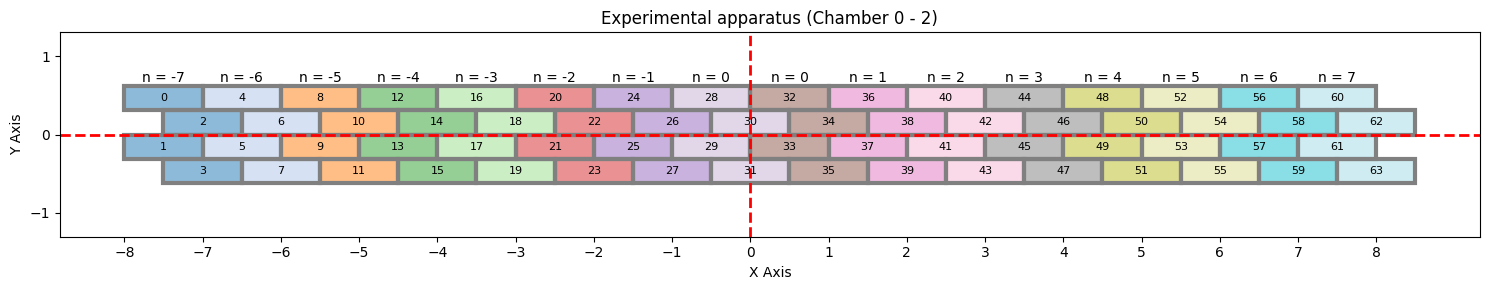

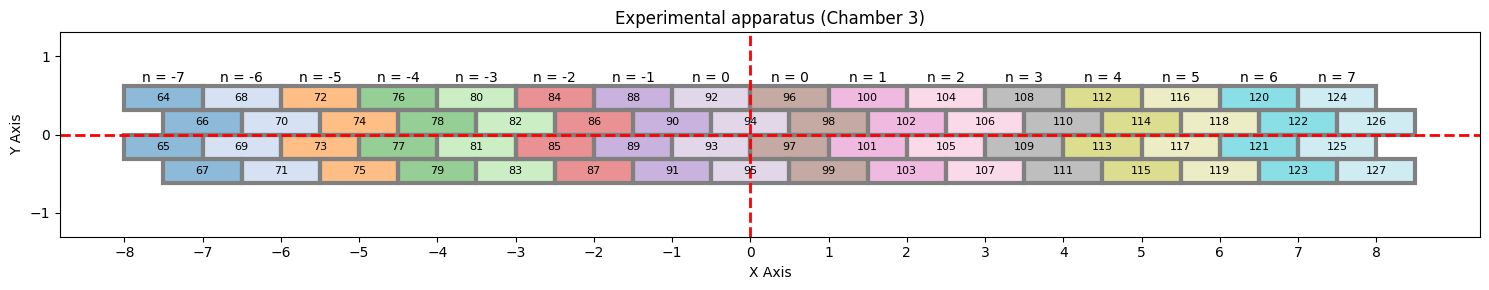

In [47]:
# Parameters
w, h = 1, 13/42
x_rect = np.arange(-8*w, 8*w, w)
z_rect = np.arange(-2*h, 2*h, h)
base_colors = plt.cm.tab20(np.linspace(0, 1, 16))
colors = [to_rgba(c, alpha=0.5) for c in base_colors]
scintillator_height = 0.3
scintillator_y = -3.75*h - scintillator_height/2
scintillator_x_start = 0.5*w + 0.20
scintillator_width = 4.5*w - 0.5 - 0.20

titles = ['Experimental apparatus (Chamber 0 - 2)', 'Experimental apparatus (Chamber 3)']

indeces = [-7, -6, -5, -4, -3, -2, -1, 0, 0, 1, 2, 3, 4, 5, 6, 7]

for idx, start in enumerate([0, 64]):
    fig, ax = plt.subplots(figsize=(15, 3))

    ax.set_xlim(-9*w, 9*w)
    ax.set_ylim(-2*h, 2*h)

    cell_n_type02 = np.zeros((4, 16), dtype=int)
    for k in range(16):
        cell_n_type02[0, k] = 4 * k + 3 + start
        cell_n_type02[1, k] = 4 * k + 1 + start
        cell_n_type02[2, k] = 4 * k + 2 + start
        cell_n_type02[3, k] = 4 * k + start
        
    for i in range(4):
        if i % 2 == 0:
            x = x_rect + w/2
        else:
            x = x_rect
        for j in range(16):
            counter = cell_n_type02[i, j]
            ax.add_patch(Rectangle((x[j], z_rect[i]), w, h, lw=3, edgecolor='gray', facecolor=colors[j]))
            ax.text(x[j] + w/2, z_rect[i] + h/2, str(counter), ha='center', va='center', fontsize=8, color='black')

    for j, n_index in enumerate(indeces):
        ax.text(x_rect[j] + w/2, 2*h + 0.1, f'n = {n_index}', ha='center', va='center', fontsize=10, color='black')

    ax.axhline(y=0, color='red', linewidth=2, linestyle='--') 
    ax.axvline(x=0, color='red', linewidth=2, linestyle = '--') 

    ax.axis('equal')
    ax.set_xticks(np.arange(-8, 9, 1))
    ax.set_yticks(np.arange(-2, 3, 1))
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_title(titles[idx])

    plt.tight_layout()
    plt.show()

We're gonna use an index to refer to each cell with respect to $x=0$:

* channel 32 is counted as the first cell, so it will have index $n=0$;  same for channels 34, 33, 35 (they have the same $x$ information, plus a shift on layer 1 and 3)
* channel 36 will have `index = int( chan / 4 ) - 8 = 1`
* channel 40 will have `index = int( chan / 4 ) - 8 = 2`
* ...and so on

Indicating the index with $n$, the $x$ in this reference will be:

$$x_{left} = [ (n + 0.5)\cdot w - x ] + shift \hspace{1 cm} x_{right} = [ (n + 0.5)\cdot w + x ] + shift$$

where $w$ is the width of the cell, $x$ is the measure with respect to the center of the cell and $shift$ is the offset of layers 1 and 3 equal to $w/2$.

The situation is similar for chamber 3, where CHAN is in $[64, 127]$.

In [48]:
# Function that evaluates both coordinates for each hit
'''
def left_or_right(x, chamber, chan, layer):
    w = 42  # mm, width of the cell
    
    shift = w / 2 if layer == 2 or layer == 4 else 0  # Applying a w/2 shift on layers 1 and 3 given the geometry, else 0 
    
    if chamber == 0 or chamber == 2:
        n = int(chan / 4) - 8 + 1 if chan <= 31 else int(chan / 4) - 8 
        cell_index = n - 0.5 if chan <= 31 else n + 0.5 #-2.5 chan 21
        cell_center = cell_index * w # - 2.5 * w
        return [shift + cell_center - x, shift + cell_center + x]

        
    elif chamber == 3:
        n = int(chan / 4) - 24 + 1 if chan <= 96 else int(chan / 4) - 24
        cell_index = n - 0.5 if chan <= 96 else n + 0.5
        cell_center = cell_index * w
        return [shift + cell_center - x, shift + cell_center + x]
    
    else:
        return [float('nan'), float('nan')]


# Register UDF
left_or_right_udf = udf(left_or_right, ArrayType(FloatType()))

# Apply UDF to DataFrame
df1 = df1.withColumn("X_COORDS", left_or_right_udf(df1['X'], df1['CHAMBER'], df1['CHAN'], df1['LAYER']))
df1 = df1.withColumn("X_LEFT", df1['X_COORDS'].getItem(0))
df1 = df1.withColumn("X_RIGHT", df1['X_COORDS'].getItem(1))
df1 = df1.drop("X").drop("T_DIFF").drop("X_COORDS")

df1.show(10)
'''

'\ndef left_or_right(x, chamber, chan, layer):\n    w = 42  # mm, width of the cell\n    \n    shift = w / 2 if layer == 2 or layer == 4 else 0  # Applying a w/2 shift on layers 1 and 3 given the geometry, else 0 \n    \n    if chamber == 0 or chamber == 2:\n        n = int(chan / 4) - 8 + 1 if chan <= 31 else int(chan / 4) - 8 \n        cell_index = n - 0.5 if chan <= 31 else n + 0.5 #-2.5 chan 21\n        cell_center = cell_index * w # - 2.5 * w\n        return [shift + cell_center - x, shift + cell_center + x]\n\n        \n    elif chamber == 3:\n        n = int(chan / 4) - 24 + 1 if chan <= 96 else int(chan / 4) - 24\n        cell_index = n - 0.5 if chan <= 96 else n + 0.5\n        cell_center = cell_index * w\n        return [shift + cell_center - x, shift + cell_center + x]\n    \n    else:\n        return [float(\'nan\'), float(\'nan\')]\n\n\n# Register UDF\nleft_or_right_udf = udf(left_or_right, ArrayType(FloatType()))\n\n# Apply UDF to DataFrame\ndf1 = df1.withColumn("X_COORDS

In [49]:
# Redone in spark 

w = 42 # width of the cell 

df1 = df1.withColumn(
    "cell_index",
    F.when(col("SECTION") < 8, 8 - col("SECTION"))
    .when((col("SECTION") >= 8) & (col("SECTION") != 16), col("SECTION") - 8 + 1)
    .otherwise(float('nan'))
)

df1 = df1.withColumn(
    "cell_center",
    F.when(col("SECTION") < 8, -1 * w * (col("cell_index") - 0.5))
    .otherwise(w * (col("cell_index") - 0.5))
)

df1 = df1.withColumn(
    "shift",
    F.when((col("LAYER") == 2) | (col("LAYER") == 4), w / 2)
    .otherwise(0)
)

df1 = df1.withColumn(
    "X_COORDS",
         F.array(
             col("cell_center") - col("X") + col("shift"),
             col("cell_center") + col("X") + col("shift")
         )
    )

df1 = df1.withColumn("X_LEFT", col("X_COORDS").getItem(0)) \
       .withColumn("X_RIGHT", col("X_COORDS").getItem(1)) \
       .drop("X", "X_COORDS", "cell_index", "cell_center", "shift")

df1.show(10)

+-------+-------+-----+----+----+-----+-------+------------------+-------------------+-------------------+
|  ORBIT|CHAMBER|LAYER|CHAN|FPGA|SCINT|SECTION|            T_DIFF|             X_LEFT|            X_RIGHT|
+-------+-------+-----+----+----+-----+-------+------------------+-------------------+-------------------+
|1135298|      2|    4|  47|   1|    0|     11|              20.5|           166.8971|           169.1029|
|1135298|      2|    2|  46|   1|    0|     11|154.66665649414062| 159.67893388061523| 176.32106611938477|
|1135298|      2|    1|  48|   1|    0|     12|167.99998474121094| 179.96160082092285| 198.03839917907715|
|1135298|      2|    3|  49|   1|    0|     12| 321.3333282470703| 171.71226694030761| 206.28773305969239|
|1135298|      0|    3|  21|   0|    0|      5|31.399993896484375|-106.68931967163086|-103.31068032836914|
|1135298|      0|    1|  20|   0|    0|      5| 174.7333221435547|-114.40065273132325| -95.59934726867675|
|1135298|      0|    2|  22|   0|    

We can observe how the hits are distributed with respect to these coordinates.

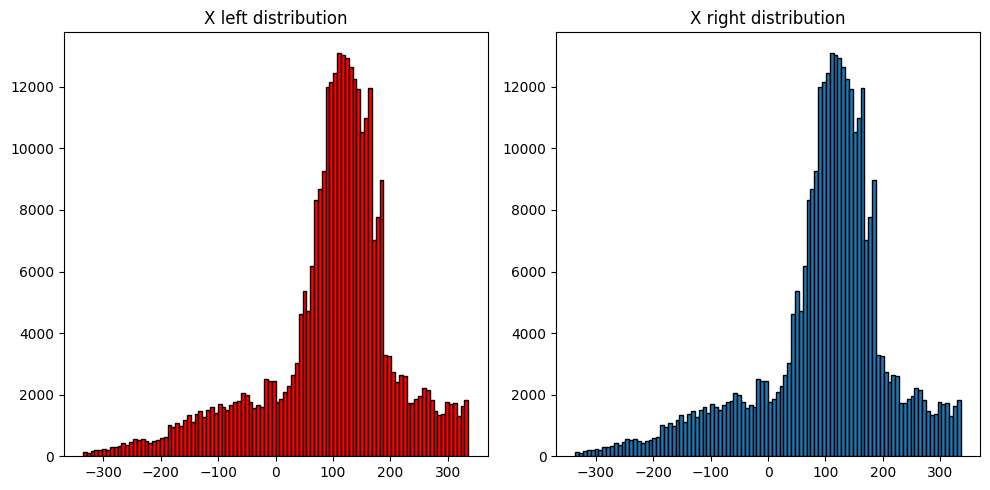

In [50]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

x_left_counts = df1.select('X_LEFT').rdd.flatMap(lambda x: x).collect()
x_right_counts = df1.select('X_LEFT').rdd.flatMap(lambda x: x).collect()

axes[0].hist(x_left_counts, bins = 100, edgecolor = 'black', label = 'X LEFT', color = 'red')
axes[0].set_title('X left distribution')

axes[1].hist(x_right_counts, bins = 100, edgecolor = 'black', label = 'X RIGHT')
axes[1].set_title('X right distribution')

plt.tight_layout()
plt.show()

Clearly, we don't see much differences from the frontal space prospective, since the scintillators are placed around sectors $9-12$, confirming the bias on the right.

We still miss the $z$ coordinate; we can evaluate $z$ by summing the `shift_chamber` given by the text and the height with respect to the chamber frame of reference, that we can call `shift_layer`:

```python
shift_layer = {
        1: 3/2 * h,
        2: 1/2 * h,
        3: -1/2 * h,
        4: -3/2 * h
}
```

where $h$ is the height of the cell ($13 \ mm$).

In [51]:
local_levels = [1.5, 0.5, -0.5, -1.5]
global_levels = [219.8, 977.3, 1035.6, 1819.8]

# Convert the lists to SQL expressions
local_level_expr = 'CASE LAYER WHEN 1 THEN {} WHEN 2 THEN {} WHEN 3 THEN {} WHEN 4 THEN {} END'.format(
    local_levels[0], local_levels[1], local_levels[2], local_levels[3]
)
global_level_expr = 'CASE CHAMBER WHEN 0 THEN {} WHEN 1 THEN {} WHEN 2 THEN {} WHEN 3 THEN {} END'.format(
    global_levels[0], global_levels[1], global_levels[2], global_levels[3]
)

# Add the 'Z' column using SQL expressions
df1 = df1.withColumn(
    'Z',
    F.expr('({} * 13) + {}'.format(local_level_expr, global_level_expr)).cast(FloatType())
).drop('CHAN', 'FPGA')

df1.show()

+-------+-------+-----+-----+-------+------------------+-------------------+-------------------+------+
|  ORBIT|CHAMBER|LAYER|SCINT|SECTION|            T_DIFF|             X_LEFT|            X_RIGHT|     Z|
+-------+-------+-----+-----+-------+------------------+-------------------+-------------------+------+
|1135298|      2|    4|    0|     11|              20.5|           166.8971|           169.1029|1016.1|
|1135298|      2|    2|    0|     11|154.66665649414062| 159.67893388061523| 176.32106611938477|1042.1|
|1135298|      2|    1|    0|     12|167.99998474121094| 179.96160082092285| 198.03839917907715|1055.1|
|1135298|      2|    3|    0|     12| 321.3333282470703| 171.71226694030761| 206.28773305969239|1029.1|
|1135298|      0|    3|    0|      5|31.399993896484375|-106.68931967163086|-103.31068032836914| 213.3|
|1135298|      0|    1|    0|      5| 174.7333221435547|-114.40065273132325| -95.59934726867675| 239.3|
|1135298|      0|    2|    0|      5| 291.3999786376953|   -99.6

Now we have all the information we need to perform linear fits.

In [52]:
#write_time(f"Spatial coordinates: {time.time() - start_time}")

## Local tracks

For local track reconstruction we need to focus on hits inside the same orbit and chamber. We will not consider events with only one hit for obvious reasons, as well as with only two hits, since two point are crossed by one and only one line and therefore no linear fit is actually possible.

The first thing we want to do is to obtain each possible combination of (`X_LEFT`,`X_RIGHT`) considering the three or four hits; hence, we are going to work with only $2^3$ or $2^4$ combinations in each event. Having these combinations, we need to perform a linear fit for each combination, observing which one of them suits better, i. e. has the least residual value (evaluated with the least square method).

Since it's better to not use loops we will use the function `np.linalg.lstsq`, which can take more sets of coordinates and returns the results for each one of them. Still, there is an issue: this function takes more than one set of coordinates only in the $z$-axis, since they correspond to the costant values of the set of equations, but in our case the different set of coordinates are placed in the $x$-axis. In order to solve this issue we are going to compute the cofficients and the residuals inverting the axes; in the end, we should find something like

$$x=mz+q$$

that gives us the line

$$z=\frac{1}{m}x-\frac{q}{m}=m'x+q' \hspace{0.85cm} \text{where} \hspace{0.4cm} \begin{cases}m'=\frac{1}{m}\\ q'=-\frac{q}{m}\end{cases}$$

We can actually distinguish two cases:
1. Only one hit is detected in each layer. In this case the function is going to estimate the fit for each combination of `X_LEFT` and `X_RIGHT` and select the one with the lowest residual value. In case the value of the `RSE` results to be bigger than $10$, the function proceeds removing one hit at a time from the grouped dataframe and computing again the local fit. The best sequence, given by the lowest `RSE` score, is returned. This step is introduced in order to take into account of possible noise inside one `ORBIT`, that can be removed in this way.
2. Two or more hits are detected in one or more layers. The function is going to choose one at a time hit from each different layer and compute the local fit. The best combination, as above, is given back.

In [53]:
# Dropping null values
df1 = df1.drop('SECTION', 'T_DIFF') # dropping no needed columns
df1.na.drop()

# Inserting the new columns needed in order to apply the fit 
df1 = df1 \
    .withColumn('X_TRUE', lit(0.0)) \
    .withColumn('M', lit(0.0)) \
    .withColumn('Q', lit(0.0)) \
    .withColumn('RSE', lit(0.0))


df1.show(10)

+-------+-------+-----+-----+-------------------+-------------------+------+------+---+---+---+
|  ORBIT|CHAMBER|LAYER|SCINT|             X_LEFT|            X_RIGHT|     Z|X_TRUE|  M|  Q|RSE|
+-------+-------+-----+-----+-------------------+-------------------+------+------+---+---+---+
|1135298|      2|    4|    0|           166.8971|           169.1029|1016.1|   0.0|0.0|0.0|0.0|
|1135298|      2|    2|    0| 159.67893388061523| 176.32106611938477|1042.1|   0.0|0.0|0.0|0.0|
|1135298|      2|    1|    0| 179.96160082092285| 198.03839917907715|1055.1|   0.0|0.0|0.0|0.0|
|1135298|      2|    3|    0| 171.71226694030761| 206.28773305969239|1029.1|   0.0|0.0|0.0|0.0|
|1135298|      0|    3|    0|-106.68931967163086|-103.31068032836914| 213.3|   0.0|0.0|0.0|0.0|
|1135298|      0|    1|    0|-114.40065273132325| -95.59934726867675| 239.3|   0.0|0.0|0.0|0.0|
|1135298|      0|    2|    0|   -99.677318850708|   -68.322681149292| 226.3|   0.0|0.0|0.0|0.0|
|1135298|      0|    4|    0|  -143.5603

In [69]:
def unique_elements_in_order(lst):
    seen = set()  # Set per tenere traccia degli elementi già visti
    unique_lst = []  # Lista per memorizzare gli elementi unici in ordine

    for item in lst:
        if item not in seen:
            seen.add(item)
            unique_lst.append(item)
    
    return unique_lst

def generate_combinations(lists):
    return list(product(*lists))

# Funzione per ottenere tutte le combinazioni possibili degli indici duplicati
def get_combinations(LAYER):
    '''
    This function is used to take in input a list LAYER like [2, 2, 3, 3, 1, 4]
    gives back all the possible combinations of indices of the repeated layers 
    considering only one time each layer
    '''
    unique_elements = unique_elements_in_order(LAYER)

    element_indices = collections.defaultdict(list)
    for index, element in enumerate(LAYER):
        element_indices[element].append(index)

    duplicated_elements_indices = {el: indices for el, indices in element_indices.items()}

    # Converti la lista di liste di indici in una lista di liste
    lists = [indices for indices in duplicated_elements_indices.values() if len(indices) > 0]
    # Usa generate_combinations per ottenere tutte le combinazioni
    all_combinations = generate_combinations(lists)
    if len(all_combinations) == 1:
        return [()]
    else:
        return all_combinations


def remove_element(lst, i_list, rev=False):
    
    '''
    This function takes in input a list (or NumPy array) `lst` and removes the elements at indices in list `i_list`.
    Returns the modified list (or array).
    If `rev` is true, the function will CONTAIN ONLY THE ELEMENTS IN `lst` AND REMOVE ALL THE OTHERS.
    '''
    
    # Convert i_list to a set for faster membership testing
    i_set = set(i_list)
    
    if isinstance(lst, list):
        if rev:
            # Create a new list that contains only the elements at the indices specified in i_list
            return [lst[i] for i in sorted(i_list) if 0 <= i < len(lst)]
        else:
            # Remove elements at specified indices
            for i in sorted(i_list, reverse=True):
                if 0 <= i < len(lst):  # Ensure index is within the valid range
                    lst.pop(i)
            return lst
    elif isinstance(lst, np.ndarray):
        if rev:
            # Create a new array that contains only the elements at the indices specified in i_list
            mask = np.zeros(len(lst), dtype=bool)
            mask[list(sorted(i_list))] = True
            return lst[mask]
        else:
            # Remove elements at specified indices
            mask = np.ones(len(lst), dtype=bool)
            mask[list(sorted(i_list))] = False
            return lst[mask]
    else:
        raise TypeError("Input `lst` must be either a list or a NumPy array")
def add_padding(lst_, LST, isglob = False):
    """
    Aggiunge padding di zeri a lst_ fino a quando la lunghezza di lst_ è uguale alla lunghezza di LST.
    """
    # Calcola il numero di zeri da aggiungere
    padding_length = len(LST) - len(lst_)

    # Aggiungi padding se necessario
        
    if isglob:
        # Aggiungi righe di liste vuote a lst_ per raggiungere la lunghezza di LST
        for _ in range(padding_length):
            lst_.append([0] * len(LST[0])) 
            
    elif padding_length > 0:
        lst_ = np.append(lst_, [0.0] * padding_length)

    return lst_


def get_coefficients(z, X_LEFT, X_RIGHT):
        '''
        This function returns the coefficients needed to perform the fit
        '''
    
        # Get all the (X_LEFT, X_RIGHT) combinations
        pairs  = zip(X_LEFT, X_RIGHT)
        combos = list(itertools.product(*pairs))

        # Creating the correct matrices for the fit
        combos_matrix = np.array(combos, dtype=np.float64)
        Z = np.vstack([z, np.ones(len(z), dtype=np.float64)]).T

        # Fit
        coeff, residuals = np.linalg.lstsq(Z, combos_matrix.T, rcond = None)[:2]

        if len(residuals) == 0:     
           return -1, 0, 0, 0
           
        
        else:
             # Getting the best fit
             minimum_idx = np.argmin(residuals)

             # Best values
             rse = residuals[minimum_idx]
             m = 1 / coeff[0][minimum_idx]
             q = - coeff[1][minimum_idx] / coeff[0][minimum_idx]
             x_true = combos_matrix[minimum_idx]

             
             return rse, m, q, x_true 

def null_event(group):

    return pd.DataFrame({
            'ORBIT': [None],
            'CHAMBER': [None],
            'LAYER': [None],
            'SCINT': [None],
            'X_LEFT': [None],
            'X_RIGHT': [None],
            'Z': [None],
            'X_TRUE': [None],
            'M': [None],
            'Q': [None],
            'RSE': [None]
        })


def get_minimum(group, DICTIONARY, flag = False):
   min_rse = float('inf')
   min_counter = None

   # Iterare sui valori del dizionario
   for counter, value in DICTIONARY.items():
   # Trovare il valore minimo di RSE e il relativo counter fra tutte le combinazioni che ho considerato 
          rse = value[2]
          if rse < min_rse:
                min_rse = rse
                min_counter = counter
              
   group['X_TRUE'] = DICTIONARY[min_counter][3]
   group['M'] = DICTIONARY[min_counter][0]
   group['Q'] = DICTIONARY[min_counter][1]
   group['RSE'] = DICTIONARY[min_counter][2]
   group['Z'] = DICTIONARY[min_counter][4]

   if flag == True:
       return group, min_counter 

   else:
       return group

In [70]:
def local_fit(group):
    '''
    In questa funzione bisognerebbe prima di tutto fare un check per verificare la presenza di hit nello stesso layer,
    nel caso in cui il fit sia maggiore di una certa soglia (>10^1) ricalcolarlo di volta in volta rimuovendo un punto.
    '''

    isDuplicated = False
    
    z = np.asarray(group.Z.values,  dtype=np.float64)
    X_LEFT, X_RIGHT = np.asarray(group.X_LEFT.values,  dtype=np.float64), np.asarray(group.X_RIGHT.values)
    LAYER = group['LAYER'].tolist()

    layer_combo = get_combinations(LAYER) 
    # Ricerco i duplicati all'interno del LAYER e ottengo la lista con tutte le combinazioni 
      
    if layer_combo != [()]: # Vuol dire che la funzione ha trovato dei duplicati nel layer,
                            # ossia che ho effettivamente delle combinazioni 
        isDuplicated = True 
    
    
    #Prima parte della funzione, si applica al caso in cui il layer non abbia duplicati 
    if len(group) > 2 and not isDuplicated: 
          # Performing the linear fit and getting the coefficients 
          rse, m, q, X_TRUE = get_coefficients(z, X_LEFT, X_RIGHT)

          # Se rse = -1 significa che len(residuals) == 0, ossia che non ho elementi per l'analisi
          if rse == -1:
              return null_event(group) 
          
          elif rse > 10:
          # In questo caso ricalcolo l'RSE rimuovendo di volta in volta un punto dalla lista e restituisco soltanto il caso migliore (minor rse)
              counter = 0
              MINIMUM_INDECES = {counter : [m, q, rse, X_TRUE, z]}  
              
              while counter < len(z): 
                  X_left, X_right, z_ = remove_element(X_LEFT.copy(), [counter]), remove_element(X_RIGHT.copy(), [counter]), remove_element(z.copy(), [counter]) 
                  # elimino man mano un elemento dalla lista in modo sequenziale 
                  
                  rse, m, q, X_true = get_coefficients(z_, X_left, X_right)
                
                  if rse == -1:
                      return null_event(group)

                  
                  x_trues = np.insert(X_true, counter, 0.0) # aggiungere gli zeri serve come padding sennò da errore sulle lunghezze, 
                                                            # li rimuovo nella cella successiva 
                  z_ = np.insert(z_, counter, 0.0)
                  
                  counter += 1 

                  
                  MINIMUM_INDECES[counter] = [m, q, rse, x_trues, z_]
            

              # Gives back the group containing the coefficients 
              # corresponding to the minimum in the dictionary 
              return get_minimum(group, MINIMUM_INDECES) 
              
          # New attributes
          group['X_TRUE'] = X_TRUE
          group['M'] = m
          group['Q'] = q
          group['RSE'] = rse

    
    #Seconda parte, si applica ai casi in cui ho un duplicato in qualche layer, 
    #l'algoritmo sceglierà quale delle due hit è la migliore in base al calcolo dell'RSE
   
    elif len(group) > 2 and isDuplicated:
        counter = 0
        MINIMUM_DUP = {}
        LAYERS = []
        for lst in layer_combo: # Devo rimuovere elementi duplicati dalla lista ed eseguire il fit 
   
            # Rimuove di volta in volta gli indici che NON sono contenuti in lst e ricalcola il fit 
            LAYER_ = remove_element(LAYER.copy(), lst, rev = True)
           
            X_left, X_right, z_ = remove_element(X_LEFT.copy(), lst, rev = True), remove_element(X_RIGHT.copy(), lst, rev = True), remove_element(z.copy(), lst, rev = True) 

            rse, m, q, X_true = get_coefficients(z_, X_left, X_right)

            if rse == -1:
                 return null_event(group)

            # Aggiungo un padding di zeri, viene rimosso successivamente 
            x_trues, z_, LAYER_ = add_padding(X_true, LAYER), add_padding(z_, LAYER), add_padding(LAYER_, LAYER)

            MINIMUM_DUP[counter] = [m, q, rse, x_trues, z_]
            LAYERS.append(LAYER_)

            counter += 1
              
        group, minimum = get_minimum(group, MINIMUM_DUP, flag = True)

        # Restituisce la lista corrispondente soltanto al layer con indice minimo 
        group['LAYER'] = LAYERS[minimum] 

              
    return group  

In [71]:
local_schema = "ORBIT int, CHAMBER int, LAYER int, \
            SCINT int, X_LEFT double, X_RIGHT double, \
            X_TRUE double, Z double, M double, Q double, RSE double"

df_local = df1.filter(col('SCINT') != 1).groupBy("ORBIT", "CHAMBER").applyInPandas(local_fit, local_schema)

df_local.show()

df_local.printSchema()

+-------+-------+-----+-----+-------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+
|  ORBIT|CHAMBER|LAYER|SCINT|             X_LEFT|            X_RIGHT|             X_TRUE|                 Z|                  M|                 Q|                RSE|
+-------+-------+-----+-----+-------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+
|1135298|      0|    3|    0|-106.68931967163086|-103.31068032836914|-103.31068032836914| 213.3000030517578| 3.0839037855097535| 533.6080508545859|0.46439401120307217|
|1135298|      0|    1|    0|-114.40065273132325| -95.59934726867675| -95.59934726867675| 239.3000030517578| 3.0839037855097535| 533.6080508545859|0.46439401120307217|
|1135298|      0|    2|    0|   -99.677318850708|   -68.322681149292|   -99.677318850708| 226.3000030517578| 3.0839037855097535| 533.6080508545859|0.46439401120

In [72]:
# Now dropping all the null values in the dataframe 
df_local = df_local.filter((col('RSE') != 0.0) & (~F.isnan(col('RSE'))) & (col('RSE').isNotNull()))

# Drop rows where 'X_TRUE' is 0.0 or 'Z' is 0.0
df_local = df_local.filter((col('X_TRUE') != 0.0) & (col('Z') != 0.0))

# Show the filtered DataFrame
df_local.show()

+-------+-------+-----+-----+-------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+
|  ORBIT|CHAMBER|LAYER|SCINT|             X_LEFT|            X_RIGHT|             X_TRUE|                 Z|                  M|                 Q|                RSE|
+-------+-------+-----+-----+-------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+
|1135298|      0|    3|    0|-106.68931967163086|-103.31068032836914|-103.31068032836914| 213.3000030517578| 3.0839037855097535| 533.6080508545859|0.46439401120307217|
|1135298|      0|    1|    0|-114.40065273132325| -95.59934726867675| -95.59934726867675| 239.3000030517578| 3.0839037855097535| 533.6080508545859|0.46439401120307217|
|1135298|      0|    2|    0|   -99.677318850708|   -68.322681149292|   -99.677318850708| 226.3000030517578| 3.0839037855097535| 533.6080508545859|0.46439401120

In [73]:
# Sorting by the value of the RSE column in ascending order 
df_local = df_local.orderBy('RSE', ascending=True)


We can explore how the `RSE` scales with respect to the fit, from the best one to the worst one.

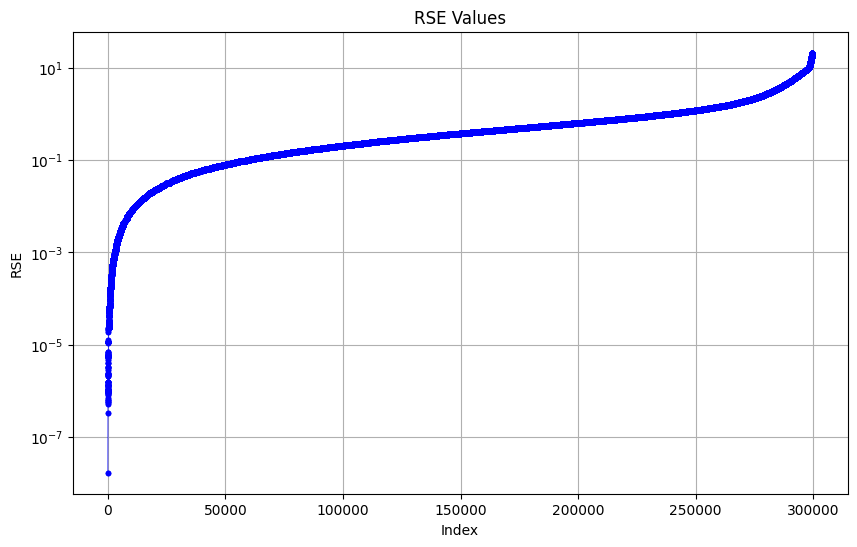

In [74]:
df_local = df_local.filter(col('RSE') <= 21)

df_local_with_index = df_local.withColumn("Index", F.monotonically_increasing_id())
data = df_local_with_index.select("Index", "RSE").rdd.map(lambda row: (row["Index"], row["RSE"])).collect()
indices, rse_values = zip(*data)

plt.figure(figsize=(10, 6))
plt.plot(indices, rse_values, linestyle='-', marker='o', color='b', linewidth=0.5, markersize = 3)
plt.title('RSE Values')
plt.xlabel('Index')
plt.ylabel('RSE')
plt.yscale('log')  # Usa la scala logaritmica se necessario
plt.grid(True)
plt.show()

The trend tends to grow quite rapidly in the first part, stabilizing in the middle part and exploding again in the final part. Because of this, one reasonable choise for a threshold above which dropping off the fits could be $0.5$, since it includes most of the fits and is placed before the final explosion of the trend.

We now create a function able to plot the fits, highlighting the best combination of coordinates.

In [75]:
def plot_event(event, flag=True):
    # event will be a row in our dataframe, we should change it 
    
    w, h = 1, 13/42
    
    
    chamber, orbit, layer = int(event['CHAMBER'][0]), int(event['ORBIT'][0]), event['LAYER']
    Z_list, X_list = event['Z'], event['X_TRUE']
    X_LEFT, X_RIGHT = event['X_LEFT'], event['X_RIGHT']
    m, q, rse = event['M'][0], event['Q'][0], event['RSE'][0]

    set_x_true = set(X_list)
    
    non_common_elements = []

    # Adding elements of (X_LEFT, X_RIGHT) not in X_TRUE
    for j, k in zip(X_LEFT, X_RIGHT):
        if j not in set_x_true:
            non_common_elements.append(j)
        else:
            non_common_elements.append(k)

    X_list = [i / 42 for i in X_list]
    non_common_elements = [i / 42 for i in non_common_elements]

    # Offsets defined by layers and chamber 
    offset_layer = [2*h, h, -h, -2*h]
    offset_z = [219.8, 977.3, 1035.6, 1819.8]
    offi_z = offset_z[chamber]
    
    Z_list = [(zi - offi_z - offi_layer) / 42 for zi, offi_layer in zip(Z_list, offset_layer)]
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))  

    x_rect = np.arange(-8*w, 8*w, w)
    z_rect = np.arange(-2*h, 2*h, h)
    base_colors = plt.cm.tab20(np.linspace(0, 1, 16))
    colors = [to_rgba(c, alpha=0.5) for c in base_colors]
    scintillator_height = 0.3
    scintillator_y = -3.75*h - scintillator_height/2
    scintillator_x_start = 0.5*w + 7.5 + 0.20
    scintillator_width = 4.5*w - 0.5 - 0.20

    ax.set_xlim(-9*w, 9*w)
    ax.set_ylim(-2*h, 2*h)

    for i in range(4):
        if i % 2 == 0:
            x = x_rect + w/2 
        else:
            x = x_rect
        for j in range(16):
            ax.add_patch(Rectangle((x[j], z_rect[i]), w, h, lw=3, edgecolor='gray', facecolor='white'))

    
    y_offset = min(Z_list) / 42
    adj_m = m
    adj_q = (q - offi_z - y_offset) / 42

    
    if abs(m) > 50:
        x_min, x_max = min(X_list) - 1 / 42, max(X_list) + 1 / 42 
    else:
        x_min, x_max = min(X_list) - 1 / 42 * 12, max(X_list) + 1 / 42 * 12
        
    y_min_line = adj_m * x_min + adj_q
    y_max_line = adj_m * x_max + adj_q

    
    ax.plot([x_min, x_max], [y_min_line, y_max_line], color = 'blue', linestyle='-', lw=1, label = 'Fit reconstruction')  # extended blue line
    ax.plot(X_list, Z_list, 'rx', label = 'True hits', linestyle = 'none')

    ax.plot(non_common_elements, Z_list, color = 'black', marker = '*', linestyle = 'none', label = 'Other combination')
    ax.legend()
    
    ax.axis('equal')
    ax.set_xticks([i for i in range(-8, 9)])
    ax.set_title(f'Local fit reconstruction in orbit {orbit} and chamber {chamber} (RSE = {rse:.4g})')

    plt.tight_layout()
    plt.show()

We show the best three local fit followed by the worst three (considering that we cut off all fits above $RSE=0.5$).

In [76]:
def update_dict(d, new_entries):
    """
    Aggiorna il dizionario `d` con i nuovi dati in `new_entries`.
    
    Parameters:
        d (dict): Il dizionario da aggiornare.
        new_entries (dict): Un dizionario contenente le chiavi e i valori da aggiungere o aggiornare.
    """
    for key, value in new_entries.items():
        if key in d:
            if isinstance(d[key], list):
                d[key].append(value)  # Aggiunge il valore alla lista esistente
            else:
                d[key] = [d[key], value]  # Se il valore esistente non è una lista, crea una lista con i valori esistenti e il nuovo valore
        else:
            d[key] = [value]  # Crea una nuova chiave con una lista contenente solo il nuovo valore

    return d

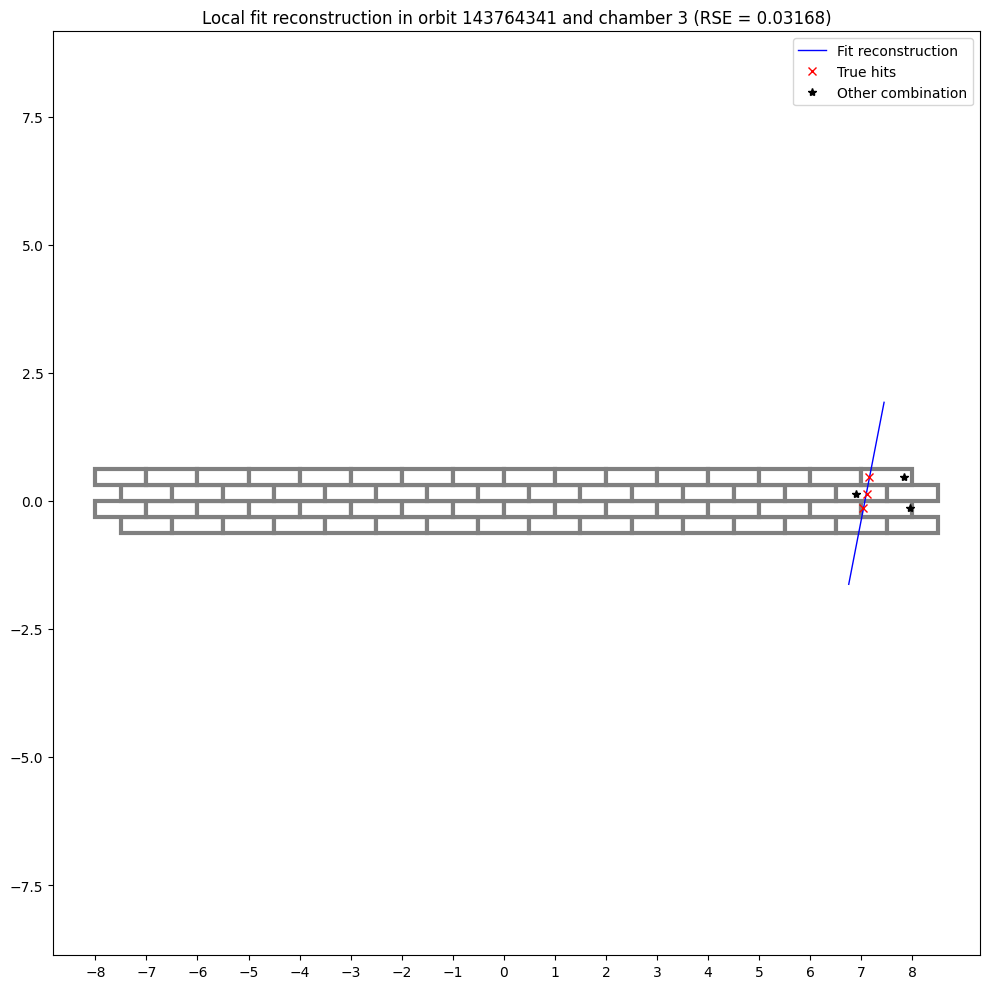

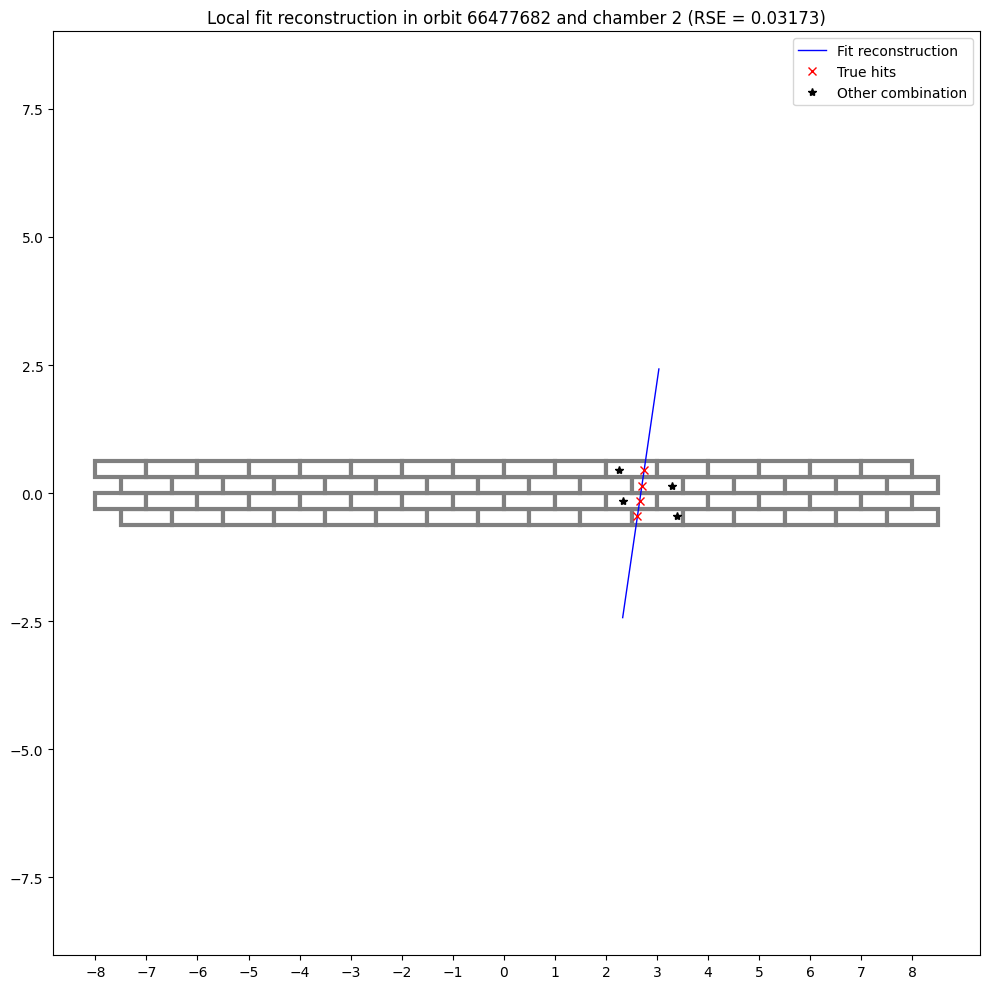

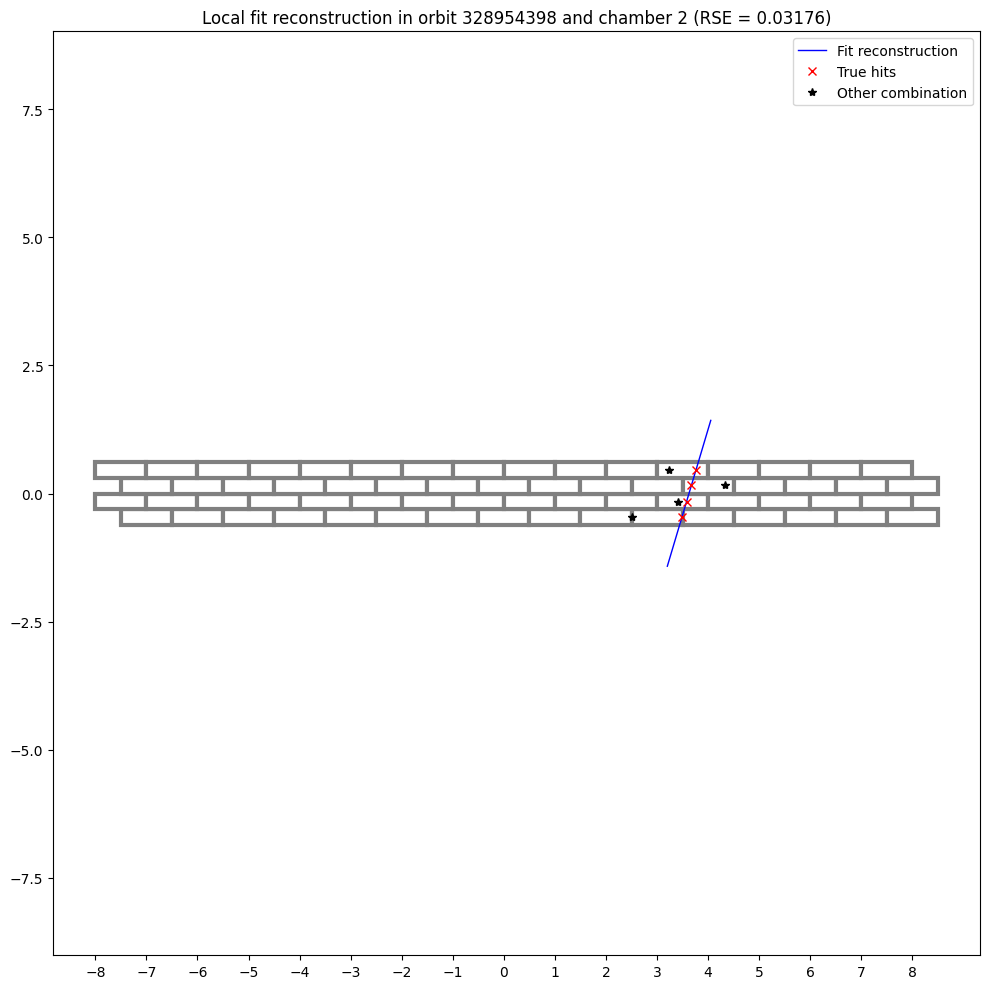

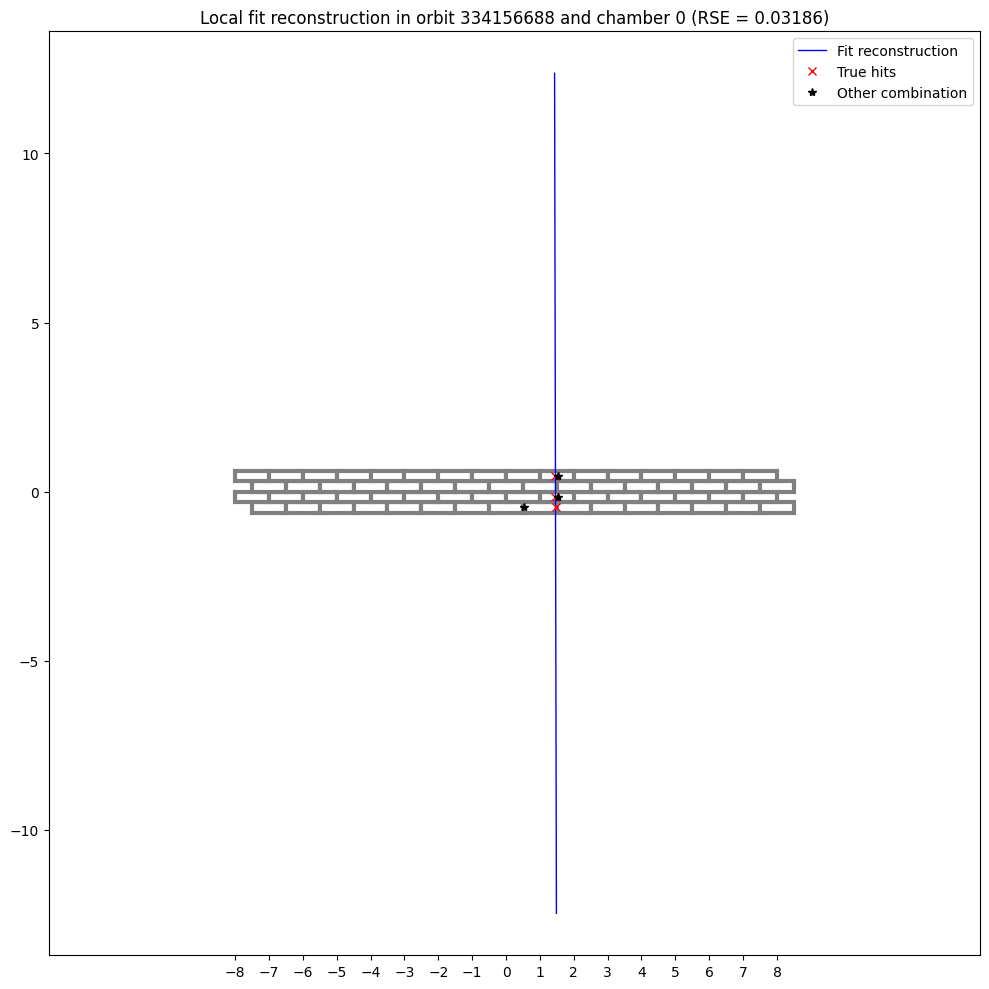

In [77]:
df_local = df_local.persist() # Può essere tolto, mi serve adesso per il debugging del plot 
                              # però effettivamente lo usiamo successivamente per il df_global 

# Selezioniamo tutte le coppie di ORBIT e CHAMBER distinte, saranno usate per il plot 
distinct_groups = df_local.select('ORBIT', 'CHAMBER').distinct()

# Limit to the first 4 unique groups
first_four_groups = distinct_groups.limit(4).collect() 
# Selezioniamo le prime 4 combinazioni di ORBIT e CHAMBER, 
#queste ci serviranno per estrarre gli elementi dal dataframe  


# Apply your function to each of the first 4 elements
for group in first_four_groups:
    orbit = group['ORBIT']
    chamber = group['CHAMBER']
    
    # Filter the original DataFrame based on the group
    tmp = df_local.filter((df_local['ORBIT'] == orbit) & (df_local['CHAMBER'] == chamber))
    
    # Collect rows from the filtered DataFrame
    culen = tmp.collect()

    plot_dic = {}
    rows_as_dicts = [row.asDict() for row in culen]
    for i in range(len(rows_as_dicts)):
        tmp_dic = rows_as_dicts[i]
        
        plot_dic = update_dict(plot_dic, tmp_dic)
    
    plot_event(plot_dic)
    



In [78]:
#write_time(f"Local tracks: {time.time() - start_time}")

## Global tracks

Having selected the correct $x$ coordinate for each hit we can try to extend the fits to all the chambers. We use the `numpy.linalg.lstsq` also in this case, with the only difference that we don't need to consider different combinations since we have the `X_TRUE` values.

In [79]:
# Queste celle mi sono per ora inutili, sono al servizio soltanto della produttività, mettendo da parte la conoscenza. 
# Forse un giorno troveranno un posto in un ambiente che possa dargli l'importanza che meritano.

'''
df_grouped_pandas = df_grouped.toPandas()

plt.figure(figsize=(10, 6))

# Crea un istogramma della frequenza dei conteggi di hit
plt.hist(df_grouped_pandas['hit_count'], bins=range(int(df_grouped_pandas['hit_count'].min()), int(df_grouped_pandas['hit_count'].max()) + 2), color='skyblue', edgecolor='black')

# Aggiungi etichette e titolo
# Aggiungi etichette e titolo
plt.xlabel('Number of Hits')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Hits')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Mostra il plot
plt.show()
'''

"\ndf_grouped_pandas = df_grouped.toPandas()\n\nplt.figure(figsize=(10, 6))\n\n# Crea un istogramma della frequenza dei conteggi di hit\nplt.hist(df_grouped_pandas['hit_count'], bins=range(int(df_grouped_pandas['hit_count'].min()), int(df_grouped_pandas['hit_count'].max()) + 2), color='skyblue', edgecolor='black')\n\n# Aggiungi etichette e titolo\n# Aggiungi etichette e titolo\nplt.xlabel('Number of Hits')\nplt.ylabel('Frequency')\nplt.title('Distribution of Number of Hits')\nplt.grid(axis='y', linestyle='--', alpha=0.7)\n\n\n# Mostra il plot\nplt.show()\n"

In [80]:
'''
#df_local_spark = spark.createDataFrame(df_local)

counts_original = df1.count()
counts_local = df_local_spark.count()
counts_not_local = counts_original - counts_local
counts_extended = df_extended.count() 

# Raggruppa e conta gli eventi in df_extended e df_local
df_extended_grouped = df_extended.groupBy('ORBIT', 'CHAMBER').count()
df_local_grouped = df_local_spark.groupBy('ORBIT', 'CHAMBER').count()

# Esegui una left anti join tra df_extended_grouped e df_local_grouped
df_joined = df_extended_grouped.join(df_local_grouped, on=['ORBIT', 'CHAMBER'], how='left_anti')

# Conta il numero di eventi rimanenti in df_joined, contenuti in df_extended ma NON in df_local
# Questi eventi non erano quindi mai stati analizzati tramite fit locale
final_count = df_joined.count()

print(f'Number of total events: {counts_original}')
print(f'Number of events analyzed with local fit: {counts_local}')
print(f'Number of events NOT analyzed with local fit: {counts_not_local}')
print(f'Number of events that we are currently taking into account again: {final_count}')
'''

"\n#df_local_spark = spark.createDataFrame(df_local)\n\ncounts_original = df1.count()\ncounts_local = df_local_spark.count()\ncounts_not_local = counts_original - counts_local\ncounts_extended = df_extended.count() \n\n# Raggruppa e conta gli eventi in df_extended e df_local\ndf_extended_grouped = df_extended.groupBy('ORBIT', 'CHAMBER').count()\ndf_local_grouped = df_local_spark.groupBy('ORBIT', 'CHAMBER').count()\n\n# Esegui una left anti join tra df_extended_grouped e df_local_grouped\ndf_joined = df_extended_grouped.join(df_local_grouped, on=['ORBIT', 'CHAMBER'], how='left_anti')\n\n# Conta il numero di eventi rimanenti in df_joined, contenuti in df_extended ma NON in df_local\n# Questi eventi non erano quindi mai stati analizzati tramite fit locale\nfinal_count = df_joined.count()\n\nprint(f'Number of total events: {counts_original}')\nprint(f'Number of events analyzed with local fit: {counts_local}')\nprint(f'Number of events NOT analyzed with local fit: {counts_not_local}')\nprin

In [81]:
'''

# Calcolo delle percentuali
percentage_local = (counts_local / counts_original) * 100
percentage_not_local = (counts_not_local / counts_original) * 100
percentage_final = (final_count / counts_original) * 100

# Dati per il bar plot
labels = ['Analyzed with Local Fit', 'Not Analyzed with Local Fit', 'Non Common Elements']
percentages = [percentage_local, percentage_not_local, percentage_final]

# Creazione del bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=['blue', 'orange', 'green'])

counter = 0
# Aggiunta delle percentuali sopra le barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')
    counter += 1

# Aggiunta dei titoli e delle etichette
plt.xlabel('Event Categories')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Events by Category')
plt.ylim(0, 100)  # Imposta il limite dell'asse y da 0 a 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.xticks(rotation = 60)

# Mostra il plot
plt.show()

# Non common elements contiene tutti gli elementi in extended df che non sono stati analizzati con il local fit
# La percentuale è così bassa perché coinvolge tutte le ORBIT che non sono state affatto considerate per il local fit
# Che quindi non presentano neppure una CHAMBER al loro interno con un numero di hit pari a 3 o più
# Quindi magari una ORBIT era stata considerata perché aveva una CHAMBER con almeno 3 hit e quindi era comunque già apparsa
# nel df_local (mia supposizione)
'''

"\n\n# Calcolo delle percentuali\npercentage_local = (counts_local / counts_original) * 100\npercentage_not_local = (counts_not_local / counts_original) * 100\npercentage_final = (final_count / counts_original) * 100\n\n# Dati per il bar plot\nlabels = ['Analyzed with Local Fit', 'Not Analyzed with Local Fit', 'Non Common Elements']\npercentages = [percentage_local, percentage_not_local, percentage_final]\n\n# Creazione del bar plot\nplt.figure(figsize=(10, 6))\nbars = plt.bar(labels, percentages, color=['blue', 'orange', 'green'])\n\ncounter = 0\n# Aggiunta delle percentuali sopra le barre\nfor bar in bars:\n    yval = bar.get_height()\n    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')\n    counter += 1\n\n# Aggiunta dei titoli e delle etichette\nplt.xlabel('Event Categories')\nplt.ylabel('Percentage (%)')\nplt.title('Percentage of Events by Category')\nplt.ylim(0, 100)  # Imposta il limite dell'asse y da 0 a 100%\nplt.grid(axis='y', lin

In [82]:
def get_glob_coeff(x_global, z_global):
    A = np.column_stack((x_global, np.ones(len(x_global))))

    coeff, residuals = np.linalg.lstsq(A, z_global.T, rcond = None)[:2]
    
    if residuals.size > 0:
        residual_value = residuals[0]
    else:
        residual_value = -1  # O un valore predefinito se non ci sono residui

    return coeff[0], coeff[1], residual_value

def get_minimum_glob(group, DICTIONARY, flag = False):
   min_rse = float('inf')
   min_counter = None

   # Iterare sui valori del dizionario
   for counter, value in DICTIONARY.items():
   # Trovare il valore minimo di RSE e il relativo counter fra tutte le combinazioni che ho considerato 
          rse = value[2]
          if rse < min_rse:
                min_rse = rse
                min_counter = counter
              
   group['X_GLOBAL'] = DICTIONARY[min_counter][3]
   group['M_GLOBAL'] = DICTIONARY[min_counter][0]
   group['Q_GLOBAL'] = DICTIONARY[min_counter][1]
   group['RSE_GLOBAL'] = DICTIONARY[min_counter][2]
   group['Z_GLOBAL'] = DICTIONARY[min_counter][4]
   group['LAYER'] = DICTIONARY[min_counter][5]

   if flag == True:
       return group, min_counter 

   else:
       return group

def add_padding_glob(lst_, LST, index_to_add):
    """
    Aggiunge padding di zeri a lst_ fino a quando la lunghezza di lst_ è uguale alla lunghezza di LST.
    """
    padding_length = len(LST) - len(lst_)

    if not (0 <= index_to_add <= len(lst_)):
        raise IndexError("Index to add is out of bounds.")

    if isinstance(lst_, list):
        # Handle padding for Python lists
        if padding_length > 0:
            zero_list = [0] * len(LST[0]) if LST and isinstance(LST[0], (list, np.ndarray)) else [0] * padding_length
            lst_.insert(index_to_add, zero_list)
    
    elif isinstance(lst_, np.ndarray):
        # Handle padding for NumPy arrays
        if padding_length > 0:
            if len(LST) > 0 and isinstance(LST[0], (list, np.ndarray)):
                # Determine the number of columns from LST
                zero_element = np.zeros((1, len(LST[0])), dtype=lst_.dtype)
            else:
                zero_element = np.zeros((1, padding_length), dtype=lst_.dtype)
            # Insert zero_element along axis 0
            lst_ = np.insert(lst_, index_to_add, zero_element, axis=0)
    
    else:
        raise TypeError("Input `lst_` must be either a list or a NumPy array")

    return lst_


def remove_element(lst, i_list, rev=False):
    '''
    This function takes in input a list (or NumPy array) `lst` and removes the elements at indices in list `i_list`.
    Returns the modified list (or array).
    If `rev` is true, the function will CONTAIN ONLY THE ELEMENTS IN `lst` AND REMOVE ALL THE OTHERS.
    '''
    
    # Convert i_list to a set for faster membership testing
    i_set = set(i_list)
    
    if isinstance(lst, list):
        if rev:
            # Create a new list that contains only the elements at the indices specified in i_list
            return [lst[i] for i in sorted(i_list) if 0 <= i < len(lst)]
        else:
            # Remove elements at specified indices
            for i in sorted(i_list, reverse=True):
                if 0 <= i < len(lst):  # Ensure index is within the valid range
                    lst.pop(i)
            return lst
    elif isinstance(lst, np.ndarray):
        if rev:
            # Create a new array that contains only the elements at the indices specified in i_list
            mask = np.zeros(len(lst), dtype=bool)
            mask[list(sorted(i_list))] = True
            return lst[mask]
        else:
            # Remove elements at specified indices
            mask = np.ones(len(lst), dtype=bool)
            mask[list(sorted(i_list))] = False
            return lst[mask]
    else:
        raise TypeError("Input `lst` must be either a list or a NumPy array")


In [83]:
def global_fit(group):
    
    ''' 
    This function should estimate the global_fit for all the cases yet analyzed in df_local,
    in order to use the best X_LEFT and X_RIGHT combination.
    A condition is introduced: if rse_global > 10 then one chamber at a time is dropped and the best 
    combination of chambers is taken into account.
    '''
    
    if group['CHAMBER'].nunique() >= 2: 
        
        x_global     = np.asarray(group.X_TRUE.values, dtype=np.float64)
        z_global     = np.asarray(group.Z.values, dtype=np.float64)
        LAYER_global = np.asarray(group.LAYER.values, dtype=np.float64)

        m_global, q_global, rse_global = get_glob_coeff(x_global, z_global)
        
        # In this case recalculate the fit by dropping one CHAMBER at a time and consider only the best element 
        # A higher rse threshold is needed in this case 
        # N.B: chamber 2 should not be dropped from the total amount 
        if rse_global >= 1e2:
              counter = 0
              MINIMUM_CHAMBERS = {counter : [m_global, q_global, rse_global, x_global, z_global, LAYER_global]}  

              # I need the index of chamber 2 in order to not remove it from the dataset 
              index_ch_2 = [index for index, el in enumerate(group['CHAMBER'].tolist()) if el == 2]
            
              while counter < len(z_global): 
                  
                  if counter not in index_ch_2:
                      x_glob_, z_glob_, LAYER_glob_ = remove_element(x_global.copy(), [counter]), remove_element(z_global.copy(), [counter]), remove_element(LAYER_global.copy(), [counter])

                      m_global_, q_global_, rse = get_glob_coeff(x_glob_, z_glob_)
                
                      # Padding required to avoid errors on lengths, to be removed in the next cell 
                      x_glob_, z_glob_, LAYER_glob_ = add_padding_glob(x_glob_, x_global, counter), add_padding_glob(z_glob_, z_global, counter), add_padding_glob(LAYER_glob_, LAYER_global, counter)

                      counter += 1 
                      MINIMUM_CHAMBERS[counter] = [m_global_, q_global_, rse, x_glob_, z_glob_, LAYER_glob_]
                      
                  else:
                      counter += 1 
                       # Se quell'indice corrisponde ad un elemento della chamber 2, allora non fa nulla, non rimuove alcun punto dal codice originale 
                       # non è quindi necessario introdurre nuovi termini nella lista MINIMUM_CHAMBERS

              # Gives back the group containing the coefficients corresponding to the minimum in the dictionary 
              return get_minimum_glob(group, MINIMUM_CHAMBERS) 
            
        else:
            group['X_GLOBAL']   = x_global
            group['Z_GLOBAL']   = z_global
            group['M_GLOBAL']   = m_global
            group['Q_GLOBAL']   = q_global
            group['RSE_GLOBAL'] = rse_global

            return group

    else:
        return pd.DataFrame({
            'ORBIT': [None],
            'SCINT': [None],
            'CHAMBER': [None],
            'LAYER': [None],
            'X_LEFT': [None],
            'X_RIGHT': [None],
            'Z': [None],
            'X_TRUE': [None],
            'M': [None],
            'Q': [None],
            'RSE': [None],
            'X_GLOBAL':[None],
            'Z_GLOBAL':[None],
            'M_GLOBAL':[None],
            'Q_GLOBAL':[None],
            'RSE_GLOBAL':[None]
        })

In [84]:
#df_for_global = df_local.drop('X_TRUE', 'Z', 'RSE')

df_for_global = df_local \
    .withColumn('X_GLOBAL', lit(0.0)) \
    .withColumn('Z_GLOBAL', lit(0.0)) \
    .withColumn('M_GLOBAL', lit(0.0)) \
    .withColumn('Q_GLOBAL', lit(0.0)) \
    .withColumn('RSE_GLOBAL', lit(0.0))

df_for_global.show()

+---------+-------+-----+-----+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------+--------+--------+--------+----------+
|    ORBIT|CHAMBER|LAYER|SCINT|            X_LEFT|           X_RIGHT|            X_TRUE|                 Z|                 M|                 Q|                 RSE|X_GLOBAL|Z_GLOBAL|M_GLOBAL|Q_GLOBAL|RSE_GLOBAL|
+---------+-------+-----+-----+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------+--------+--------+--------+----------+
|298376858|      2|    3|    0|   102.20261015625|   107.79738984375|   102.20261015625|1029.0999755859375| 6.530812350804514|  361.634583663049|1.670449392396271E-8|     0.0|     0.0|     0.0|     0.0|       0.0|
|298376858|      2|    1|    0|          103.8164|          106.1836|          106.1836|1055.0999755859375| 6.530812350804514|  361.634583663049

In [85]:
global_schema = "ORBIT int, CHAMBER int, LAYER int, \
            SCINT int, X_LEFT double, X_RIGHT double, \
            X_TRUE double, Z double, \
            X_GLOBAL double, Z_GLOBAL double, \
            M_GLOBAL double, Q_GLOBAL double, RSE_GLOBAL double, \
            M double, Q double, RSE double "

df_global = df_for_global.groupBy("ORBIT").applyInPandas(global_fit, global_schema)

df_global.show()

+-------+-------+-----+-----+-------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+
|  ORBIT|CHAMBER|LAYER|SCINT|             X_LEFT|            X_RIGHT|             X_TRUE|                 Z|           X_GLOBAL|          Z_GLOBAL|          M_GLOBAL|          Q_GLOBAL|        RSE_GLOBAL|                 M|                 Q|                 RSE|
+-------+-------+-----+-----+-------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+
|   NULL|   NULL| NULL| NULL|               NULL|               NULL|               NULL|              NULL|               NULL|              NULL|              NULL|              NULL|              NULL|    

In [86]:
df_global = df_global.filter((col('RSE') != 0.0) & (~F.isnan(col('RSE'))) & (col('RSE').isNotNull()))
df_global = df_global.filter((col('X_GLOBAL') != 0.0) & (col('Z_GLOBAL') != 0.0))
df_global = df_global.orderBy('RSE_GLOBAL', ascending=True)
df_global = df_global.filter(col('RSE_GLOBAL') <= 21)
df_global.show()

+---------+-------+-----+-----+-------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+-------------------+------------------+--------------------+
|    ORBIT|CHAMBER|LAYER|SCINT|             X_LEFT|            X_RIGHT|             X_TRUE|                 Z|           X_GLOBAL|          Z_GLOBAL|           M_GLOBAL|          Q_GLOBAL|         RSE_GLOBAL|                  M|                 Q|                 RSE|
+---------+-------+-----+-----+-------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+-------------------+------------------+--------------------+
|216002610|      2|    1|    0|            96.3651|           113.6349|           113.6349|1055.0999755859375|           113.6349|1055.0999755859375|-2.9909489746274347| 1395.050267648488|0.070

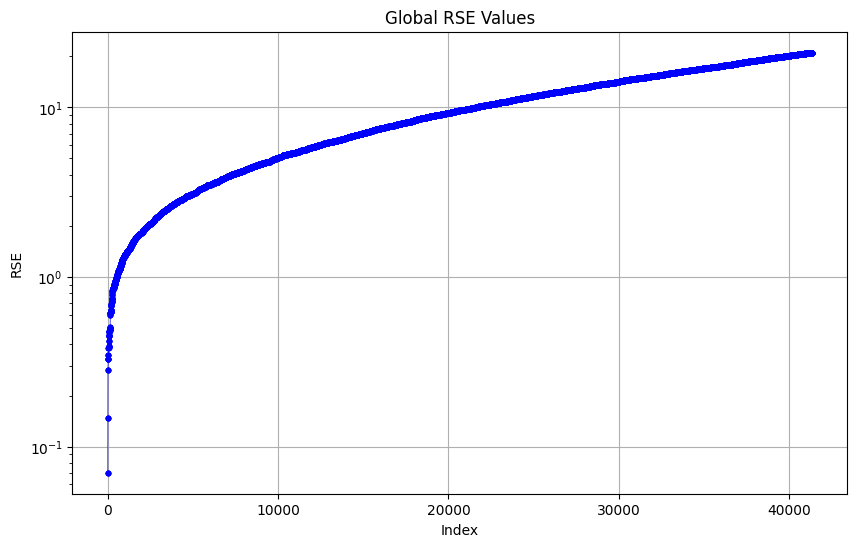

In [87]:
df_global = df_global.orderBy('RSE_GLOBAL', ascending=True)
df_global_with_index = df_global.withColumn("Index", F.monotonically_increasing_id())
data = df_global_with_index.select("Index", "RSE_GLOBAL").rdd.map(lambda row: (row["Index"], row["RSE_GLOBAL"])).collect()
indices, rse_values = zip(*data)

plt.figure(figsize=(10, 6))
plt.plot(indices, rse_values, linestyle='-', marker='o', color='b', linewidth=0.5, markersize =  3)
plt.title('Global RSE Values')
plt.xlabel('Index')
plt.ylabel('RSE')
plt.yscale('log')  # Usa la scala logaritmica se necessario
plt.grid(True)
plt.show()

In [88]:
def plot_glob(event, islocal = True):

    fig, ax = plt.subplots(1, 1, figsize = (10, 15))
    factor_y = 10
    w, h = 1, 13/42 * 3 
    
    chambers, orbit, layers = event['CHAMBER'], event['ORBIT'], event['LAYER']
    Z, X = event['Z_GLOBAL'], event['X_GLOBAL']
    m, q, rse = event['M_GLOBAL'][0], event['Q_GLOBAL'][0], event['RSE_GLOBAL'][0]
    
    
    # Defining an offset by layer for each chamber
    offset_layer = [2*h, h, -h, -2*h]
    
    offset_ch_z = [219.8, 0, 1035.6, 1819.8]

    X_global_converted = [i / 42 for i in X]
    Z_global_converted = [(i - offset_layer[int(index) - 1]) / 14 for i, index in zip(Z, layers)]

    X_left_converted = [i / 42 for i in event['X_LEFT']]
    X_right_converted = [i / 42 for i in event['X_RIGHT']]

    # Contruscting the hits in the chambers
    
    ax.plot(X_global_converted, Z_global_converted, color = 'red', marker = 'x', label = 'Hit', linestyle = 'none', markersize = 10)
    #ax.plot(X_left_converted, Z_global_converted, color = 'black', marker = 'o', label = 'X left', linestyle = 'none', markersize = 3)
    #ax.plot(X_right_converted, Z_global_converted, color = 'black', marker = 'o', label = 'X right', linestyle = 'none', markersize = 3)

    if islocal:
    # Plotting the local fits
    
        counter = 0
        
        for ch in chambers.unique():
            single_ch = event[event['CHAMBER'] == ch]

        
            mi = 3 * single_ch['M'].iloc[0]
            qi = single_ch['Q'].iloc[0] / 14
            layer = single_ch['LAYER']

            xi = single_ch['X_TRUE']
            xi_conv = [i / 42 for i in xi]
        
            diff = (max(xi) - min(xi)) + 1e-7

            if abs(mi) / 3 <= 50:
                x_min, x_max = min(xi_conv) - 2 , max(xi_conv) + 2
            else:
                x_min, x_max = min(xi_conv) - 2 * 1 / diff, max(xi_conv) + 2 * 1 / diff
    
        
            y_min_line = mi * x_min + qi
            y_max_line = mi * x_max + qi
       
            if counter == 0:
                ax.plot([x_min, x_max], [y_min_line, y_max_line], color = 'darkgreen', linestyle='--', lw=1, label = 'Local fit reconstruction') 
            else: 
                ax.plot([x_min, x_max], [y_min_line, y_max_line], color = 'darkgreen', linestyle='--', lw=1)

            counter += 1
            

    # Now plotting the global fit 
    
    y_offset = min(Z_global_converted) 
    adj_m = 3 * m
    adj_q = (q )/ 14
    
    if m > 50: 
        x_min, x_max = min(X_global_converted) - 0.5, max(X_global_converted) + 0.5
    else:
        x_min, x_max = min(X_global_converted) - 10, max(X_global_converted) + 10
    
    y_min_line = adj_m * x_min + adj_q 
    y_max_line = adj_m * x_max + adj_q
    
    ax.plot([x_min, x_max], [y_min_line, y_max_line], color = 'blue', linestyle = ':', lw = 1, label = 'Global fit reconstruction') 
    

    x_rect = np.arange(-8*w, 8*w, w)
    z_rect = np.arange(-2*h, 2*h, h)
    base_colors = plt.cm.tab20(np.linspace(0, 1, 16))
    colors = [to_rgba(c, alpha=0.5) for c in base_colors]
    scintillator_height = 0.3
    scintillator_y = -3.75*h - scintillator_height/2
    scintillator_x_start = 0.5*w + 7.5 + 0.20
    scintillator_width = 4.5*w - 0.5 - 0.20

    ax.set_xlim(-8.5, 9)
    ax.set_ylim(0, 150)  
 
    
    for k in range(4):
        offset_y = offset_ch_z[k] / 14 # Compute the vertical offset for each repetition

        for i in range(4):

            # No plot for chamber 1
            if k == 1: 
               break 
            if i % 2 == 0:
                x = x_rect + w/2 
            else:
                x = x_rect
            for j in range(16):
                ax.add_patch(Rectangle((x[j], z_rect[i] + offset_y), w, h, lw = 3, edgecolor = 'gray', facecolor = 'white'))

            text_x = -7 # posizione del testo 
            text_y = offset_y + 4
            ax.text(text_x, text_y, f'Chamber {k}', ha = 'center', va = 'center')

    unique_ch = [ch for ch in chambers.unique()]
    unique_ch_str = ', '.join(map(str, sorted(unique_ch)))
    
    plt.title(f'Hit collected in orbit {orbit[0]} and chambers: {unique_ch_str} (RSE: {rse:.4g})')
    
    ax.legend()    
    plt.tight_layout()
    plt.show()
    

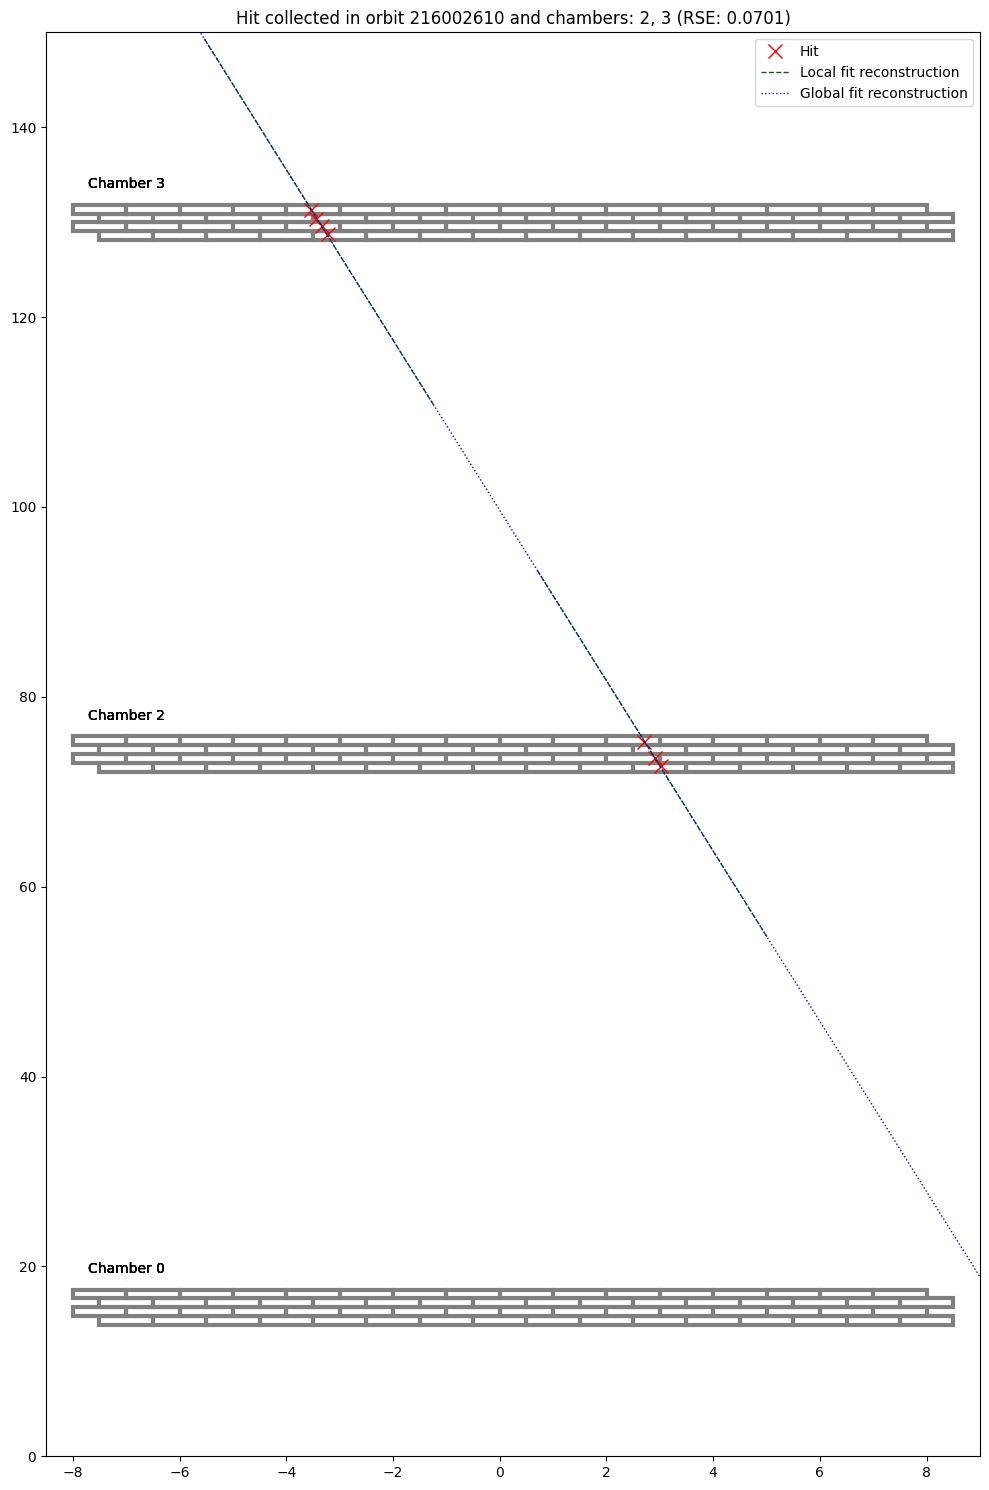

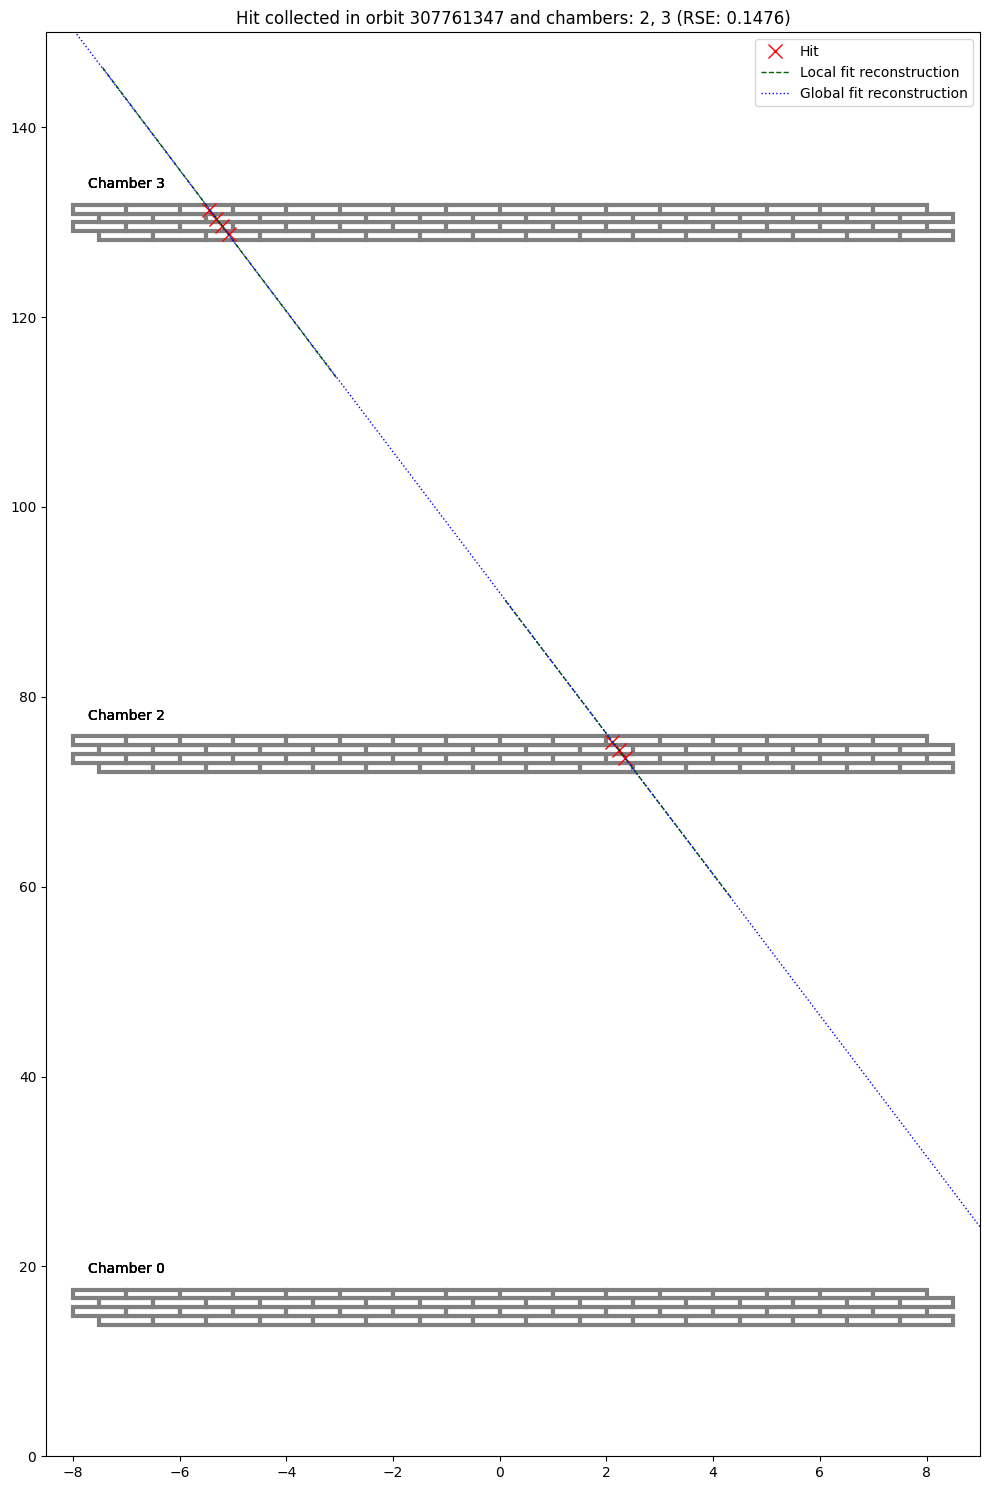

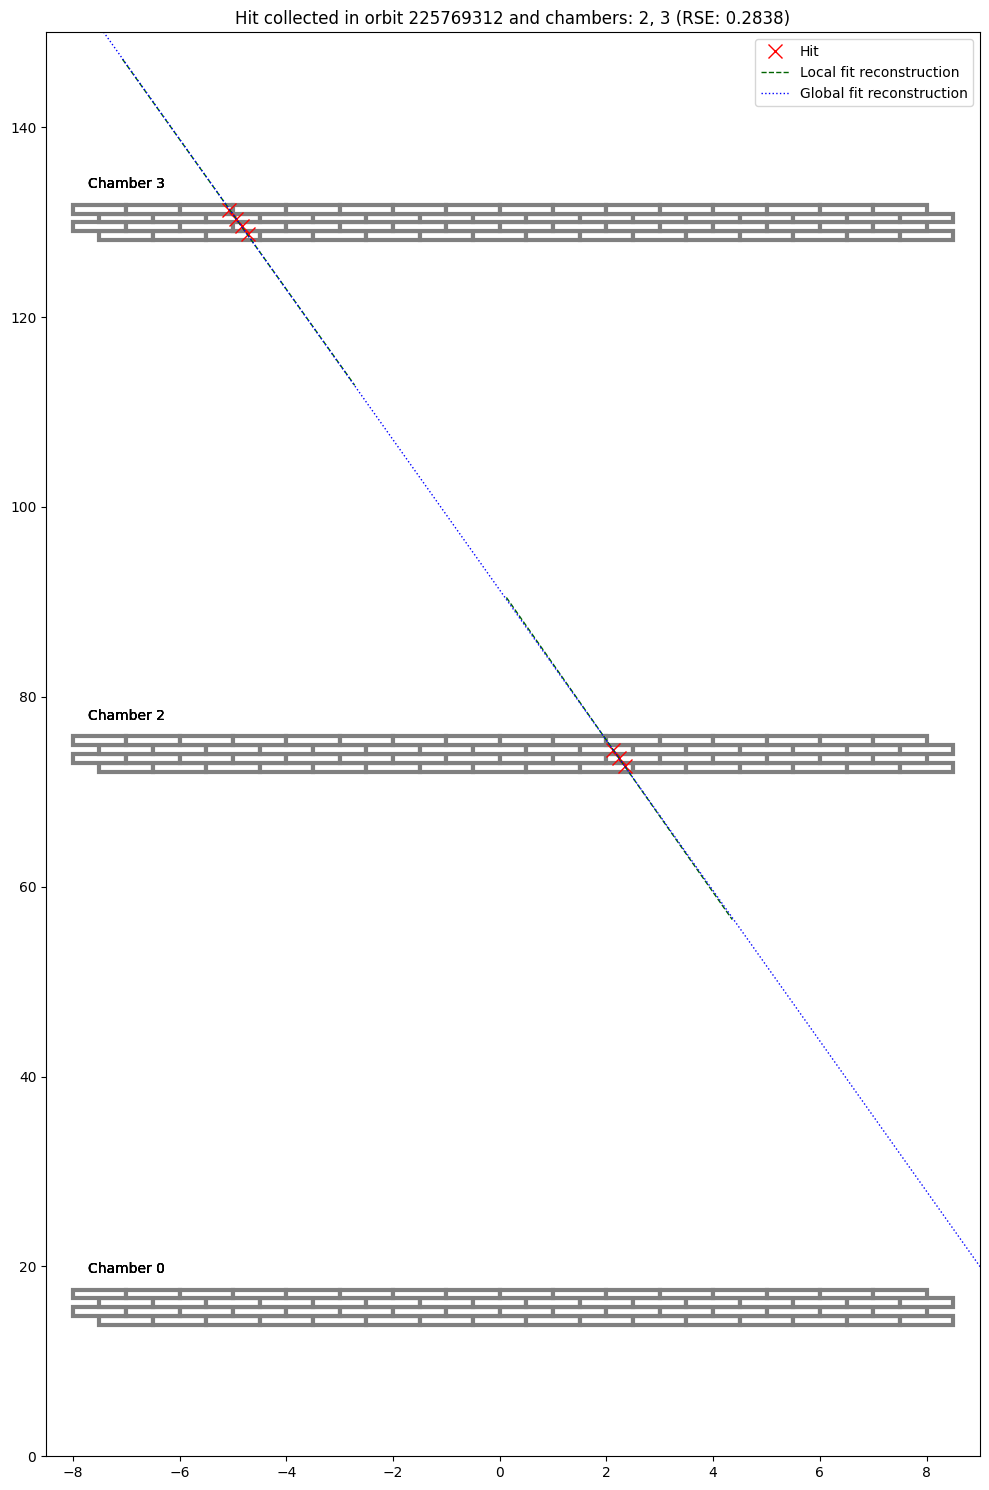

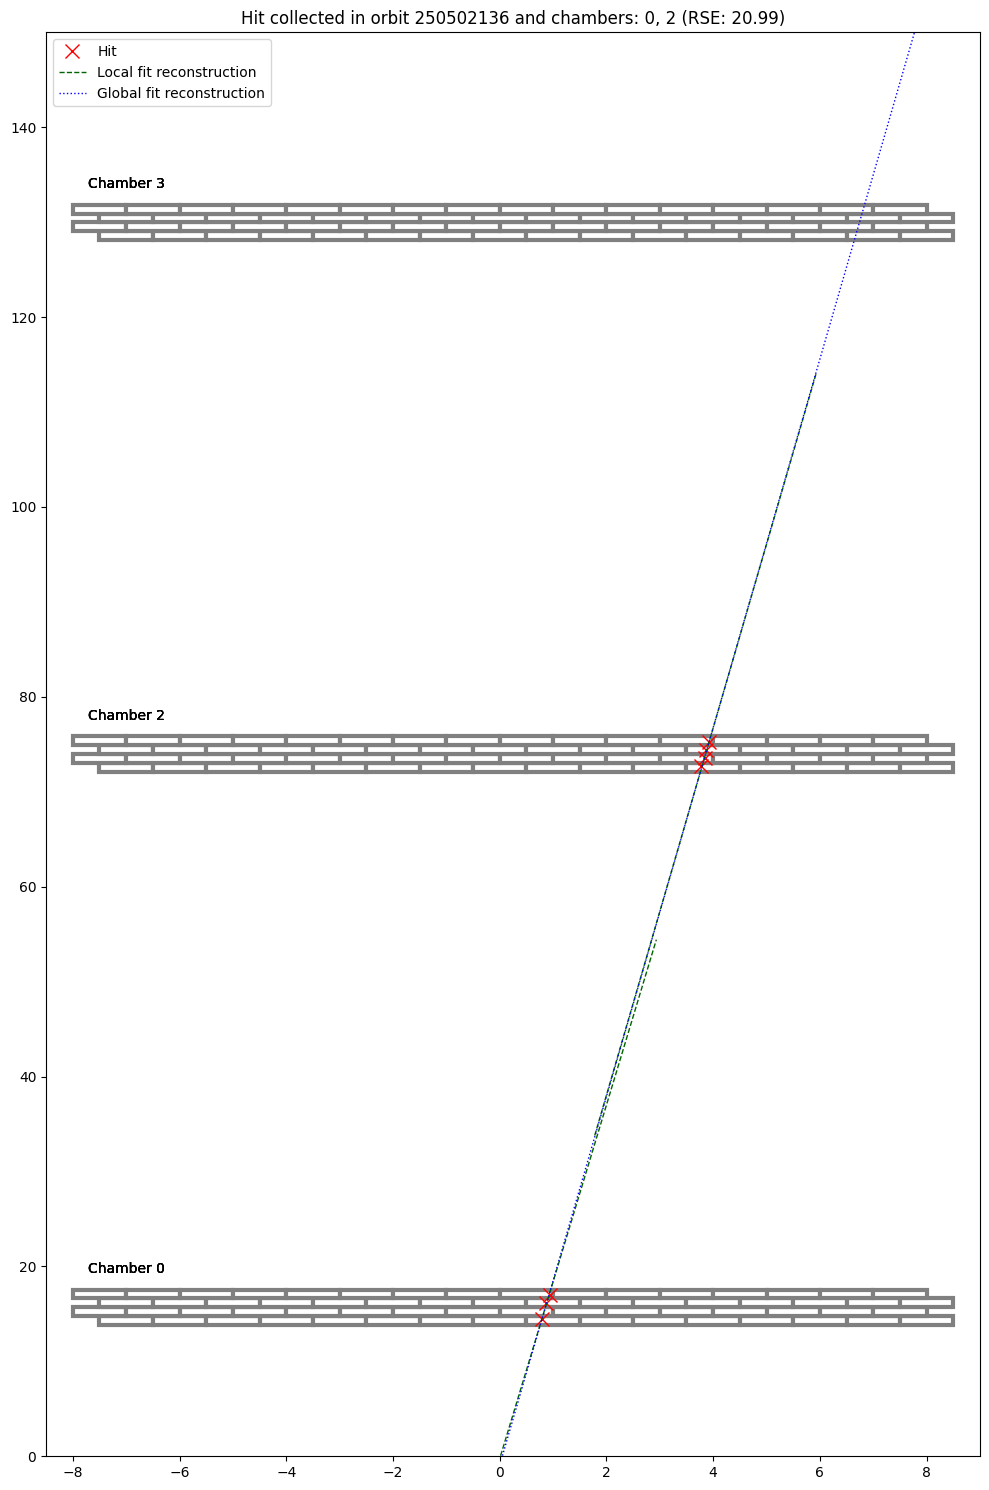

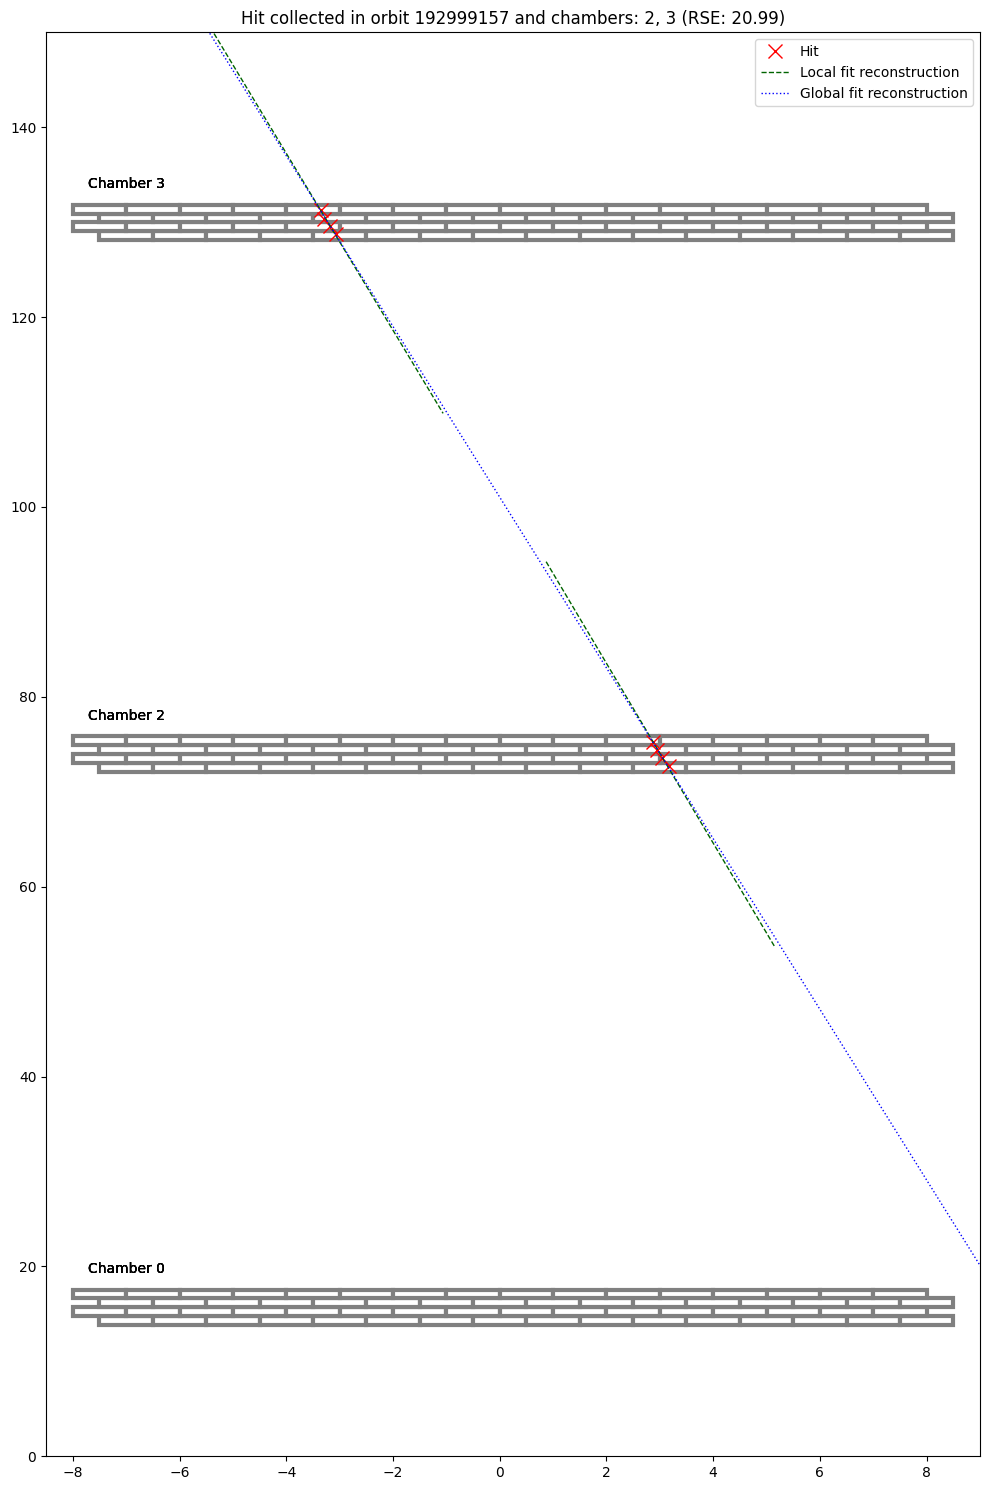

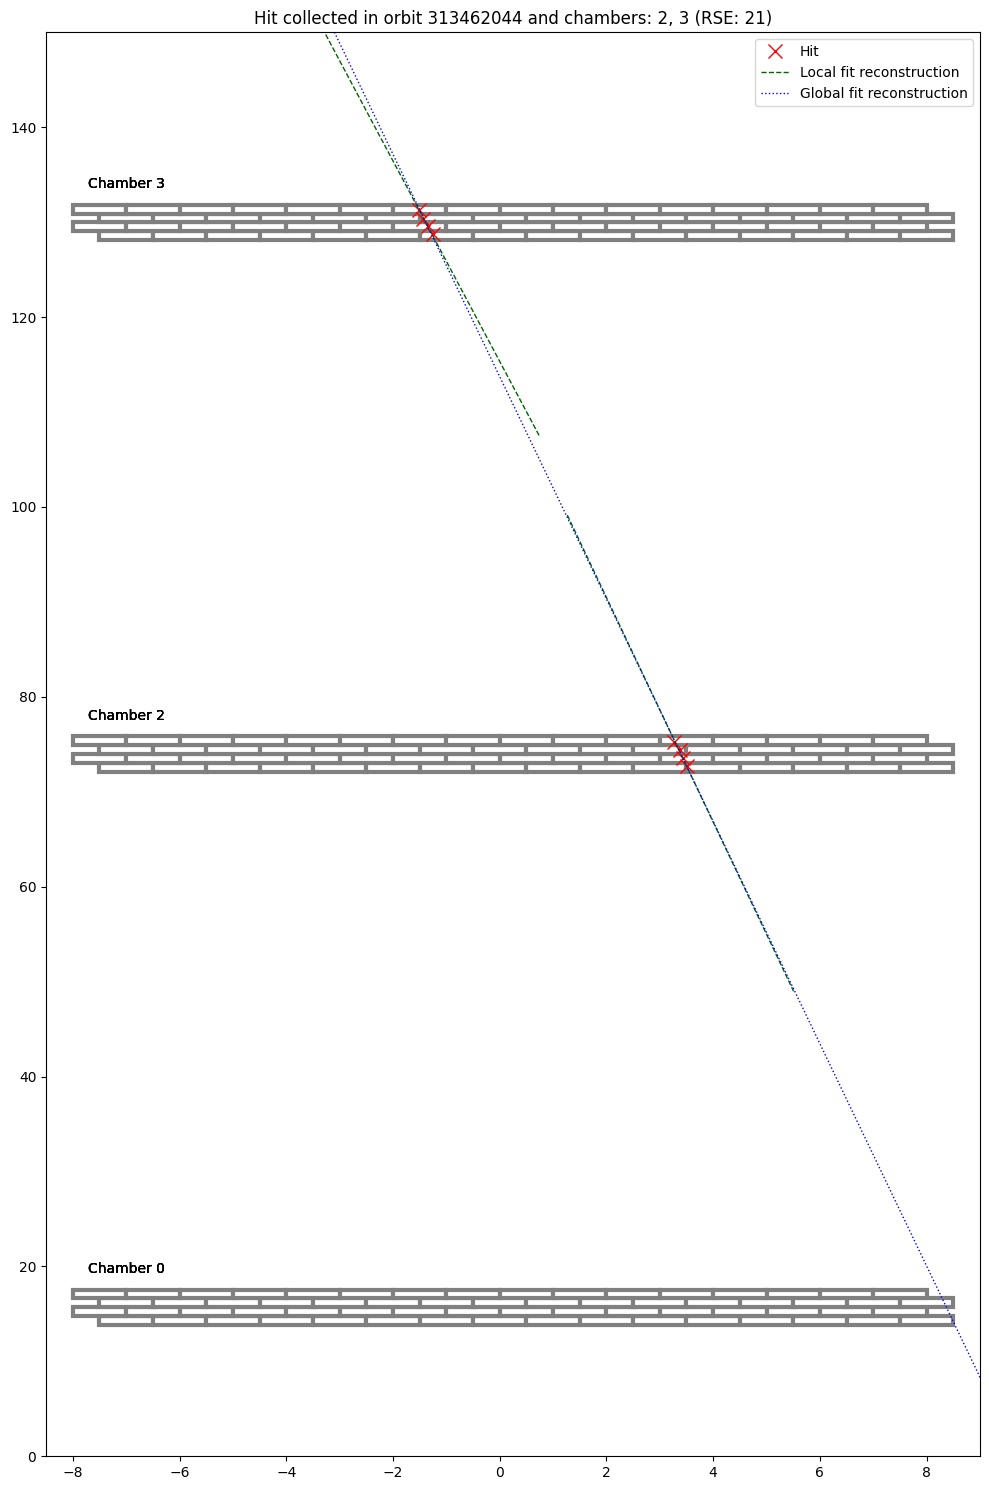

In [89]:
# Plotting best and worst results 

distinct_groups = df_global.select('ORBIT', 'RSE_GLOBAL').distinct().orderBy('RSE_GLOBAL', ascending=True).collect()

# Indici degli elementi che vogliamo plottare, ossia i primi migliori 
# e gli ultimi peggiori 

elements = [0, 1, 2, -3, -2, -1]

for i in elements:
    orbit = distinct_groups[i]
    
    plot_glob(df_global[df_global.ORBIT == orbit['ORBIT']].toPandas())

**Extended global fit**

In [90]:
# Vogliamo soltanto le hit in cui count è > 2
# Conto il numero di occorrenze di eventi raggruppati per ORBIT e CHAMBER
df_grouped = df1.filter(col('SCINT') != 1)\
                 .groupBy('ORBIT', 'CHAMBER')\
                 .agg(count('*').alias('hit_count'))


# Conto soltanto i casi in cui in una STESSA ORBIT registro almeno 2 conteggi da 2 CHAMBER diverse
# Ossia dato il df_grouped, sommo sulla colonna CHAMBER contenuta in questo df, di modo da verificare che 
# tale valore sia maggiore di due. 
# Ottengo il dataframe:

df_filtered_chamber = df_grouped.filter(col('hit_count') > 2)\
                                .groupBy('ORBIT')\
                                .agg(count('CHAMBER').alias('num_chambers_with_more_than_2_hits'))

df_double_filtered = df_filtered_chamber.filter(col('num_chambers_with_more_than_2_hits') > 1)\
                                        .drop(col('num_chambers_with_more_than_2_hits'))


df_extended = df1.join(df_double_filtered, on='ORBIT', how='left')\
                 .drop(col('SCINT'))

df_extended =  df_extended.filter(col('SCINT') != 1)\
                           .drop('SCINT')

# Abbiamo ottenuto un dataframe con tutte le hit, di queste è interessante vedere quante hit abbiamo per chamber
# N B: è già filtrato di tutte le righe con SCINT = 1
df_extended.show(10)

# Quello che faremo nelle celle successive è quindi ricalcolare il fit per tutti i valori che abbiamo ottenuto 
# N B 2: poiché in questo caso non abbiamo applicato prima il fit locale, non sarà possibile averlo poi nei plot successivi 

+-------+-------+-----+-------------------+-------------------+------+------+---+---+---+
|  ORBIT|CHAMBER|LAYER|             X_LEFT|            X_RIGHT|     Z|X_TRUE|  M|  Q|RSE|
+-------+-------+-----+-------------------+-------------------+------+------+---+---+---+
|1135298|      2|    4|           166.8971|           169.1029|1016.1|   0.0|0.0|0.0|0.0|
|1135298|      2|    2| 159.67893388061523| 176.32106611938477|1042.1|   0.0|0.0|0.0|0.0|
|1135298|      2|    1| 179.96160082092285| 198.03839917907715|1055.1|   0.0|0.0|0.0|0.0|
|1135298|      2|    3| 171.71226694030761| 206.28773305969239|1029.1|   0.0|0.0|0.0|0.0|
|1135298|      0|    3|-106.68931967163086|-103.31068032836914| 213.3|   0.0|0.0|0.0|0.0|
|1135298|      0|    1|-114.40065273132325| -95.59934726867675| 239.3|   0.0|0.0|0.0|0.0|
|1135298|      0|    2|   -99.677318850708|   -68.322681149292| 226.3|   0.0|0.0|0.0|0.0|
|1135298|      0|    4|  -143.560318850708|  -108.439681149292| 200.3|   0.0|0.0|0.0|0.0|
|1297227| 

In [91]:
# Now cleaning a bit the dataframe 
df_extended = df_extended.dropna()

df_extended = df_extended.withColumnRenamed('X_TRUE', 'X_GLOBAL')\
                         .withColumnRenamed('Z', 'Z_GLOBAL')\
                         .withColumnRenamed('M', 'M_GLOBAL')\
                         .withColumnRenamed('Q', 'Q_GLOBAL')\
                         .withColumnRenamed('RSE', 'RSE_GLOBAL')

df_extended.show(10)

+-------+-------+-----+-------------------+-------------------+--------+--------+--------+--------+----------+
|  ORBIT|CHAMBER|LAYER|             X_LEFT|            X_RIGHT|Z_GLOBAL|X_GLOBAL|M_GLOBAL|Q_GLOBAL|RSE_GLOBAL|
+-------+-------+-----+-------------------+-------------------+--------+--------+--------+--------+----------+
|1135298|      2|    4|           166.8971|           169.1029|  1016.1|     0.0|     0.0|     0.0|       0.0|
|1135298|      2|    2| 159.67893388061523| 176.32106611938477|  1042.1|     0.0|     0.0|     0.0|       0.0|
|1135298|      2|    1| 179.96160082092285| 198.03839917907715|  1055.1|     0.0|     0.0|     0.0|       0.0|
|1135298|      2|    3| 171.71226694030761| 206.28773305969239|  1029.1|     0.0|     0.0|     0.0|       0.0|
|1135298|      0|    3|-106.68931967163086|-103.31068032836914|   213.3|     0.0|     0.0|     0.0|       0.0|
|1135298|      0|    1|-114.40065273132325| -95.59934726867675|   239.3|     0.0|     0.0|     0.0|       0.0|
|

In [120]:
def null_event_glob():
        return pd.DataFrame({
            'ORBIT': [None],
            'CHAMBER': [None],
            'LAYER': [None],
            'X_LEFT': [None],
            'X_RIGHT': [None],
            'Z_GLOBAL': [None],
            'X_GLOBAL': [None],
            'M_GLOBAL': [None],
            'Q_GLOBAL': [None],
            'RSE_GLOBAL': [None],
        })

def unique_ordered_elements(array):
    seen = set()  # Set per tenere traccia degli elementi già visti
    unique_elements = []  # Lista per memorizzare gli elementi unici

    for item in array:
        if item not in seen:
            unique_elements.append(item)
            seen.add(item)

    return unique_elements

def add_padding_glob_ex(lst_, LST):
    """
    Aggiunge padding di zeri a lst_ per far sì che abbia la stessa lunghezza di LST.
    Gli zeri vengono aggiunti in corrispondenza degli indici in cui gli elementi di lst_
    non corrispondono agli elementi di LST. Se lst_ è più corto, verranno aggiunti zeri alla fine.
    Restituisce un array NumPy monodimensionale con i valori aggiornati.
    """
    # Converti lst_ e LST in liste se sono array NumPy
    if isinstance(lst_, np.ndarray):
        lst_ = lst_.tolist()
    
    if isinstance(LST, np.ndarray):
        LST = LST.tolist()

    # Aggiungi zeri a lst_ fino a raggiungere la lunghezza di LST
    while len(lst_) < len(LST):
        lst_.append(0)
    
    # Aggiorna lst_ con i valori di LST dove necessario
    for i in range(len(LST)):
        if i < len(lst_):
            if LST[i] != lst_[i]:
                lst_[i] = 0  # Imposta zero se gli elementi non corrispondono
        else:
            lst_.append(0)  # Aggiungi zeri se `lst_` è più corta di `LST`

    # Converti la lista risultante in un array NumPy monodimensionale
    return np.array(lst_, dtype=np.float64)

def get_minimum_glob_ex(group, DICTIONARY):
   min_rse = float('inf')
   min_counter = None

   # Iterare sui valori del dizionario
   for counter, value in DICTIONARY.items():
   # Trovare il valore minimo di RSE e il relativo counter fra tutte le combinazioni che ho considerato 
          rse = value[2]
          if rse < min_rse:
                min_rse = rse
                min_counter = counter
              
   group['X_GLOBAL'] = DICTIONARY[min_counter][3]
   group['M_GLOBAL'] = DICTIONARY[min_counter][0]
   group['Q_GLOBAL'] = DICTIONARY[min_counter][1]
   group['RSE_GLOBAL'] = DICTIONARY[min_counter][2]
   group['Z_GLOBAL'] = DICTIONARY[min_counter][4]
   group['LAYER'] = DICTIONARY[min_counter][5]
   group['X_LEFT'] = DICTIONARY[min_counter][6]
   group['X_RIGHT'] = DICTIONARY[min_counter][7]

    
   return group


def remove_chamber(group): # Obatining the minimum removing one chamber at a time 
    m_global, q_global, rse_global = np.asarray(group['M_GLOBAL'], dtype = np.float64)[0], np.asarray(group['Q_GLOBAL'], dtype = np.float64)[0], np.asarray(group['RSE_GLOBAL'], dtype = np.float64)[0]
    x_global, z_global, LAYER_global = np.asarray(group['X_GLOBAL'], dtype = np.float64), np.asarray(group['Z_GLOBAL'], dtype = np.float64), np.asarray(group['LAYER'], dtype = np.float64)
    X_LEFT, X_RIGHT = np.asarray(group['X_LEFT'], dtype = np.float64), np.asarray(group['X_RIGHT'], dtype = np.float64)
    
    chambers = group['CHAMBER'].tolist()
    
    counter = 0
    MINIMUM_CHAMBERS = {counter : [m_global, q_global, rse_global, x_global, z_global, LAYER_global]}  
              
    for ch in unique_ordered_elements(chambers): 
          if ch != 2:
              # I don't want to cut on chamber 2
              single_event = group[group.CHAMBER == ch]
              x_glob_, z_glob_, LAYER_glob_ = np.asarray(single_event.X_GLOBAL, dtype = np.float64), np.asarray(single_event.Z_GLOBAL, dtype = np.float64), np.asarray(single_event.LAYER, dtype = np.float64)
              x_left, x_right = np.asarray(single_event.X_LEFT,  dtype=np.float64), np.asarray(single_event.X_RIGHT,  dtype=np.float64)
                  
               # elimino man mano un elemento dalla lista in modo sequenziale 
              m_global_, q_global_, rse = get_glob_coeff(x_glob_, z_glob_)
          
               # Padding necessario per evitare errori sulle lunghezze, da rimuovere nella cella successiva 
              x_glob_, z_glob_, LAYER_glob_ = add_padding_glob_ex(x_glob_, x_global), add_padding_glob_ex(z_glob_, z_global), add_padding_glob_ex(LAYER_glob_, LAYER_global)
              x_left, x_right = add_padding_glob_ex(x_left, X_LEFT), add_padding_glob_ex(x_right, X_RIGHT) 
        
              counter += 1 
                  
              MINIMUM_CHAMBERS[counter] = [m_global_, q_global_, rse, x_glob_, z_glob_, LAYER_glob_, x_left, x_right]

          elif ch == 2:
              
              counter += 1
             # Gives back the group containing the coefficients 
             # corresponding to the minimum in the dictionary 
    
    return get_minimum_glob_ex(group, MINIMUM_CHAMBERS) 

def generate_combinations_ex(lists):
    all_combinations = []
    for sublist in lists:
        # Genera tutte le combinazioni in cui rimuovi uno degli indici dal sublist
        n = len(sublist)
        sub_combinations = [combo for combo in itertools.combinations(sublist, n - 1)]
        all_combinations.append(sub_combinations)
    
    # Usa product per ottenere tutte le combinazioni tra le sotto-combinazioni generate
    result_combinations = list(itertools.product(*all_combinations))
    
    # Appiattisci le tuple di tuple in una singola lista
    flattened_combinations = [list(sum(comb, ())) for comb in result_combinations]
    
    return flattened_combinations
            

In [121]:
def extended_global_fit(group):
    '''
    The event in entrance is the df_extended dataframe grouped on ORBIT only 
    This function should take all the cases that are not yet analyzed in df_local and should compute the fit for 
    all these cases selecting the best X_LEFT and X_RIGHT combination.

    It works in a way similar to local fit, takes all the entrances and computes the total fit on them 
    '''
    
    isDuplicated = False
    
    z = np.asarray(group.Z_GLOBAL.values,  dtype=np.float64)
    X_LEFT, X_RIGHT = np.asarray(group.X_LEFT.values,  dtype=np.float64), np.asarray(group.X_RIGHT.values,  dtype=np.float64)
    #chambers = np.asarray(group.CHAMBER.values, dtype = np.float64)

    chambers = group['CHAMBER'].tolist()
    LAYER = group['LAYER'].tolist()
    

    # Now implementing the LAYER problem - we need to check if there are some repetitions for each layer but trying to recover the chamber info 
    index_original = [] # Lista contenente gli indici originali dei duplicati, di modo da rimuoverli mantenendo l'info corretta sulla chamber
    combos = [] # combinazioni possibili degli indici 
    dup_layer = []
    
    for ch in unique_ordered_elements(chambers):  # Lista delle chamber ordinate e ripetute una sola volta       
        single_event = group[group.CHAMBER == ch] # estraggo una sola chamber e gli eventi legati ad essa 
        single_layer = np.asarray(single_event.LAYER, dtype = np.float64) # Layer info legata alla chamber, per vedere se ci sono ripetizioni 
        
        original_indices = [i for i, (layer, chamber) in enumerate(zip(LAYER, chambers)) if chamber == ch]  # mi indica a quale chamber appartiene il layer che presenta duplicati
        
        layer_combo = get_combinations(single_layer) # Ottengo tutte le combinazioni possibili degli stessi indici:
                                                    # se ho LAYER = [2, 4, 2, 5, 6] avrò [2, 4, 5, 6] e [4, 2, 5, 6]
                                                    # se LAYER non ha duplicati questa lista sarà vuota 

        if layer_combo != [()]: # Significa che ho trovato delle ripetizioni nel layer 
            index_original.append(original_indices) # Appendo la chamber in cui si trova il layer birichino
            isDuplicated = True 
            
    # index_original contiene tutti gli indici originari in cui ho trovato dei duplicati
    big_combo = generate_combinations_ex(index_original) # genero tutte le possibili combinationi di flatten_combo, ossia degli indici 

    # Prima parte della funzione, si applica al caso in cui il layer non abbia duplicati 
    # Dobbiamo sempre però richiedere di avere almeno 2 chamber che hanno un punto, 
    # altrimenti che fit globale è?
    if group['CHAMBER'].nunique() >= 2 and not isDuplicated: 
          # Performing the linear fit and getting the coefficients 
          rse, m, q, X_TRUE = get_coefficients(z, X_LEFT, X_RIGHT)

          # Se rse = -1 significa che len(residuals) == 0, ossia che non ho elementi per l'analisi
          if rse == -1:
              return null_event_glob() 
          
          elif rse > 1e2: # 100 è un valore ragionevole per l'RSE
          # In questo caso ricalcolo l'RSE rimuovendo di volta in volta un punto dalla lista e restituisco soltanto il caso migliore (minor rse)
              counter = 0
              MINIMUM_INDECES = {counter : [m, q, rse, X_TRUE, z, X_LEFT, X_RIGHT]}  
              
              while counter < len(z): 
                  X_left, X_right, z_, LAYER_ = remove_element(X_LEFT.copy(), [counter]), remove_element(X_RIGHT.copy(), [counter]), remove_element(z.copy(), [counter]), remove_element(LAYER.copy(), [counter]) 
                  # elimino man mano un elemento dalla lista in modo sequenziale 
                  
                  rse, m, q, X_true = get_coefficients(z_, X_left, X_right)
                
                  if rse == -1:
                      return null_event_glob()

                  
                  x_trues, z_, LAYER_ = np.insert(X_true, counter, 0.0), np.insert(z_, counter, 0.0), np.insert(LAYER_, counter, 0.0)
                                                            # aggiungere gli zeri serve come padding sennò da errore sulle lunghezze, 
                                                            # li rimuovo nella cella successiva 
                  X_left, X_right = np.insert(X_left, counter, 0.0), np.insert(X_right, counter, 0.0)
                  
                  counter += 1 

                  
                  MINIMUM_INDECES[counter] = [m, q, rse, x_trues, z_, LAYER_, X_left, X_right]
            

              # Gives back the group containing the coefficients 
              # corresponding to the minimum in the dictionary 
              group = get_minimum_glob_ex(group, MINIMUM_INDECES) # estrarre valori 

              # Now removing one chamber at a time and seeing what is better 
              best_rse = group['RSE_GLOBAL'][0]
              # This code is used to treat all the strange cases where we have noise in one chamber and two other chambers filled with a still high rse
              if best_rse >= 1e3 and group['X_GLOBAL'].nunique() > 5 and group['CHAMBER'].nunique() >= 3: # Still computing the rse 
                                  # Removes one chamber at a time and returns the best value 
                                  # We need to have a sufficient number of chambers 
                 return remove_chamber(group)

              else:
                  return group
                  


                  
          # New attributes
          group['X_GLOBAL'] = X_TRUE
          group['M_GLOBAL'] = m
          group['Q_GLOBAL'] = q
          group['RSE_GLOBAL'] = rse

          return group 

    
    #Seconda parte, si applica ai casi in cui ho un duplicato in qualche layer, 
    #l'algoritmo sceglierà quale delle due hit è la migliore in base al calcolo dell'RSE
   
    elif group['CHAMBER'].nunique() >= 2 and isDuplicated:
        counter = 0
        MINIMUM_DUP = {}

        # Itero su tutte le chamber in cui ho dei layer birichini
        
        for lst in big_combo: # Devo rimuovere elementi duplicati dalla lista ed eseguire il fit 

            # Rimuove di volta in volta gli indici che sono contenuti in lst e ricalcola il fit 
                LAYER_ = remove_element(LAYER.copy(), lst)
           
                X_left, X_right, z_ = remove_element(X_LEFT.copy(), lst), remove_element(X_RIGHT.copy(), lst), remove_element(z.copy(), lst) 

                rse, m, q, X_true = get_coefficients(z_, X_left, X_right)

                if rse == -1:
                     return null_event_glob()

                # Aggiungo un padding di zeri, viene rimosso successivamente 
                x_trues, z_, LAYER_ = add_padding(X_true, LAYER), add_padding(z_, LAYER), add_padding(LAYER_, LAYER)
                X_left, X_right = add_padding(X_left, LAYER), add_padding(X_right, LAYER)
            
                MINIMUM_DUP[counter] = [m, q, rse, x_trues, z_, LAYER_, X_left, X_right]
                

                counter += 1
            
        
        group = get_minimum_glob(group, MINIMUM_DUP)

        
        # Now removing one chamber at a time 
        best_rse = group['RSE_GLOBAL'][0]
        
        if best_rse >= 1e3 and group['X_GLOBAL'].nunique() > 5 and group['CHAMBER'].nunique() >= 3: # Still computing the rse 
                                  # Removes one chamber at a time and returns the best value 
             return remove_chamber(group)

        else:
             return group

        # Restituisce la lista corrispondente soltanto al layer con indice minimo 
    else:
        return pd.DataFrame({
            'ORBIT': [None],
            'CHAMBER': [None],
            'LAYER': [None],
            'X_LEFT': [None],
            'X_RIGHT': [None],
            'Z_GLOBAL': [None],
            'X_GLOBAL': [None],
            'M_GLOBAL': [None],
            'Q_GLOBAL': [None],
            'RSE_GLOBAL': [None],
        })


In [111]:
'''
df_global_ex = df_extended.limit(1000).toPandas()
df_global_ex = df_global_ex.groupby(['ORBIT']).apply(lambda group: extended_global_fit(group))

print(df_global_ex)
'''

"\ndf_global_ex = df_extended.limit(1000).toPandas()\ndf_global_ex = df_global_ex.groupby(['ORBIT']).apply(lambda group: extended_global_fit(group))\n\nprint(df_global_ex)\n"

In [124]:
extended_schema = "ORBIT int, CHAMBER int, LAYER int, \
            X_LEFT double, X_RIGHT double, \
            X_GLOBAL double, Z_GLOBAL double, \
            M_GLOBAL double, Q_GLOBAL double, RSE_GLOBAL double"

df_global_ex = df_extended.groupBy("ORBIT").applyInPandas(extended_global_fit, extended_schema)

df_global_ex.show()


+-------+-------+-----+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+------------------+
|  ORBIT|CHAMBER|LAYER|             X_LEFT|            X_RIGHT|           X_GLOBAL|          Z_GLOBAL|           M_GLOBAL|           Q_GLOBAL|        RSE_GLOBAL|
+-------+-------+-----+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+------------------+
|1135298|      2|    4|           166.8971|           169.1029|           166.8971|1016.0999755859375|  2.961457642031076|  521.1374864773727|0.9908088106204849|
|1135298|      2|    2| 159.67893388061523| 176.32106611938477| 176.32106611938477|1042.0999755859375|  2.961457642031076|  521.1374864773727|0.9908088106204849|
|1135298|      2|    1| 179.96160082092285| 198.03839917907715| 179.96160082092285|1055.0999755859375|  2.961457642031076|  521.1374864773727|0.9908088106204849|
|1135298|      2|    3| 171.

In [125]:
df_global_ex = df_global_ex.filter((col('RSE_GLOBAL') != 0.0) & (~F.isnan(col('RSE_GLOBAL'))) & (col('RSE_GLOBAL').isNotNull()) & (col('RSE_GLOBAL') != -1.0))
df_global_ex = df_global_ex.filter((col('X_GLOBAL') != 0.0) & (col('Z_GLOBAL') != 0.0))
df_global_ex = df_global_ex.orderBy('RSE_GLOBAL', ascending=True)

df_global_ex.show()

+---------+-------+-----+------------------+------------------+-------------------+------------------+-------------------+-------------------+--------------------+
|    ORBIT|CHAMBER|LAYER|            X_LEFT|           X_RIGHT|           X_GLOBAL|          Z_GLOBAL|           M_GLOBAL|           Q_GLOBAL|          RSE_GLOBAL|
+---------+-------+-----+------------------+------------------+-------------------+------------------+-------------------+-------------------+--------------------+
|184151082|      0|    1| -192.886104296875| -185.113895703125|  -185.113895703125| 239.3000030517578|  2.557118842069823|  712.6586011140004| 4.06247843501746E-8|
|184151082|      0|    2|  -229.80197265625|  -190.19802734375|   -190.19802734375| 226.3000030517578|  2.557118842069823|  712.6586011140004| 4.06247843501746E-8|
|184151082|      2|    4|   118.66533671875|133.33466328125002|    118.66533671875|1016.0999755859375|  2.557118842069823|  712.6586011140004| 4.06247843501746E-8|
| 29604697|     

All the cases where there are not chamber $2$ hits cannot be considered, since a global track needs to pass through chamber $2$ for the geometrical structure of the apparatus.

In [127]:
#df_global = df_global[df_global['CHAMBER'].apply(lambda x: 2 in x)]


df_global_ex.unpersist()
df_global_ex = df_global_ex.filter(col('RSE_GLOBAL') <= 100)
df_global_ex = df_global_ex.persist()

To select a threshold, we plot the trend of the error value also in this case.

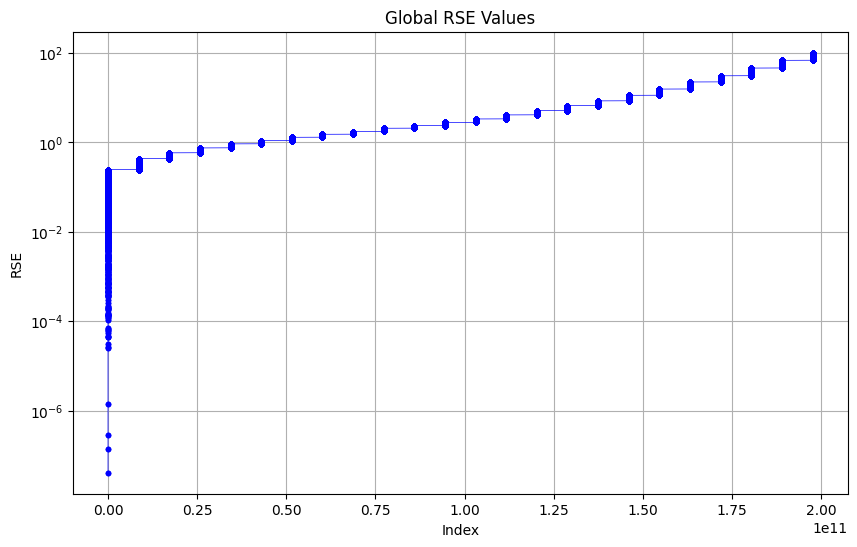

In [128]:
df_global_with_index = df_global_ex.withColumn("Index", F.monotonically_increasing_id())
data = df_global_with_index.select("Index", "RSE_GLOBAL").rdd.map(lambda row: (row["Index"], row["RSE_GLOBAL"])).collect()
indices, rse_values = zip(*data)

plt.figure(figsize=(10, 6))
plt.plot(indices, rse_values, linestyle='-', marker='o', color='b', linewidth=0.5, markersize =  3)
plt.title('Global RSE Values')
plt.xlabel('Index')
plt.ylabel('RSE')
plt.yscale('log')  # Usa la scala logaritmica se necessario
plt.grid(True)
plt.show()

The trend resembles the one in the local fits, but more curved upwards. Of course, we cannot select a threshold value that is too big. Considering half of the width the cell as a coarse measure of the resolution, we choose an `RSE` threshold equal to $21$.

We now plot the best three fit and the worst three.

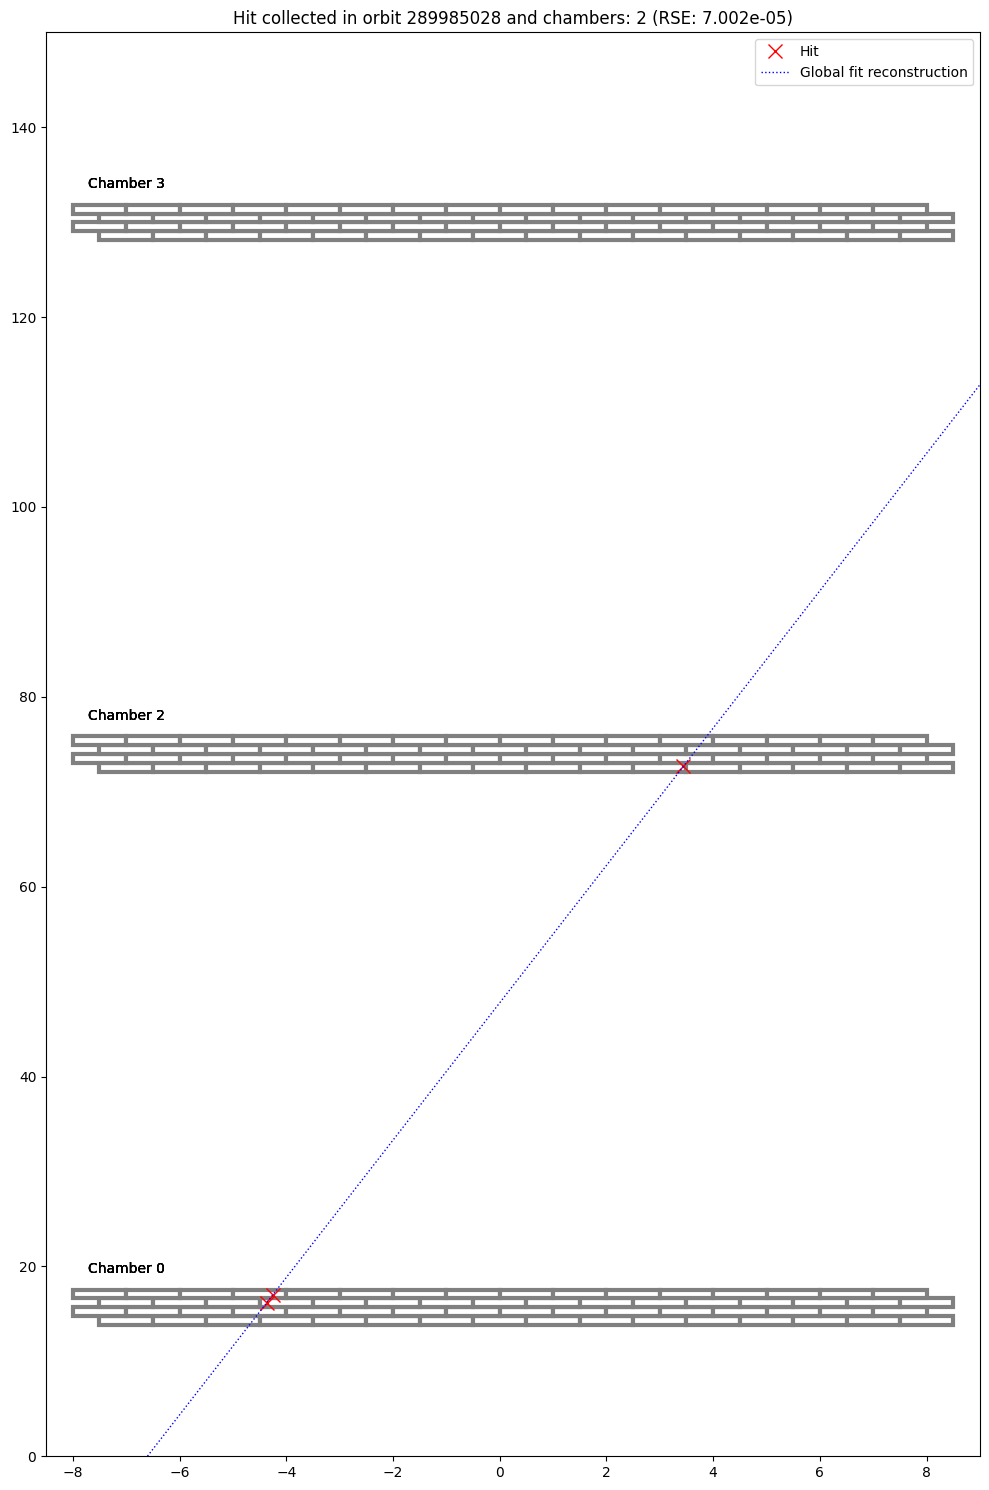

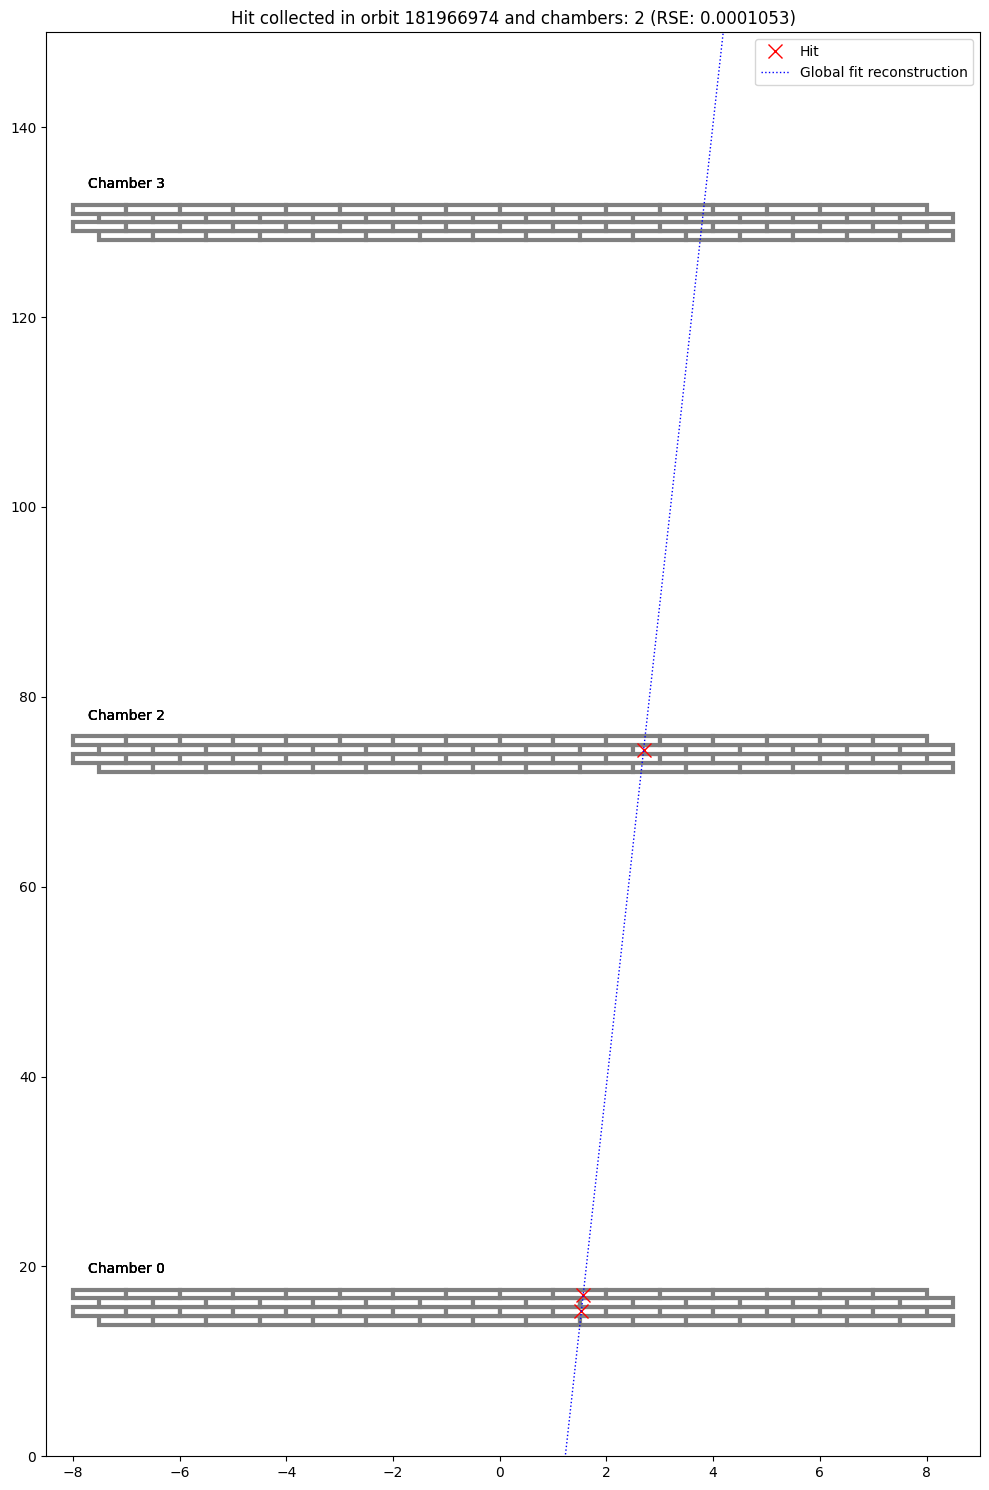

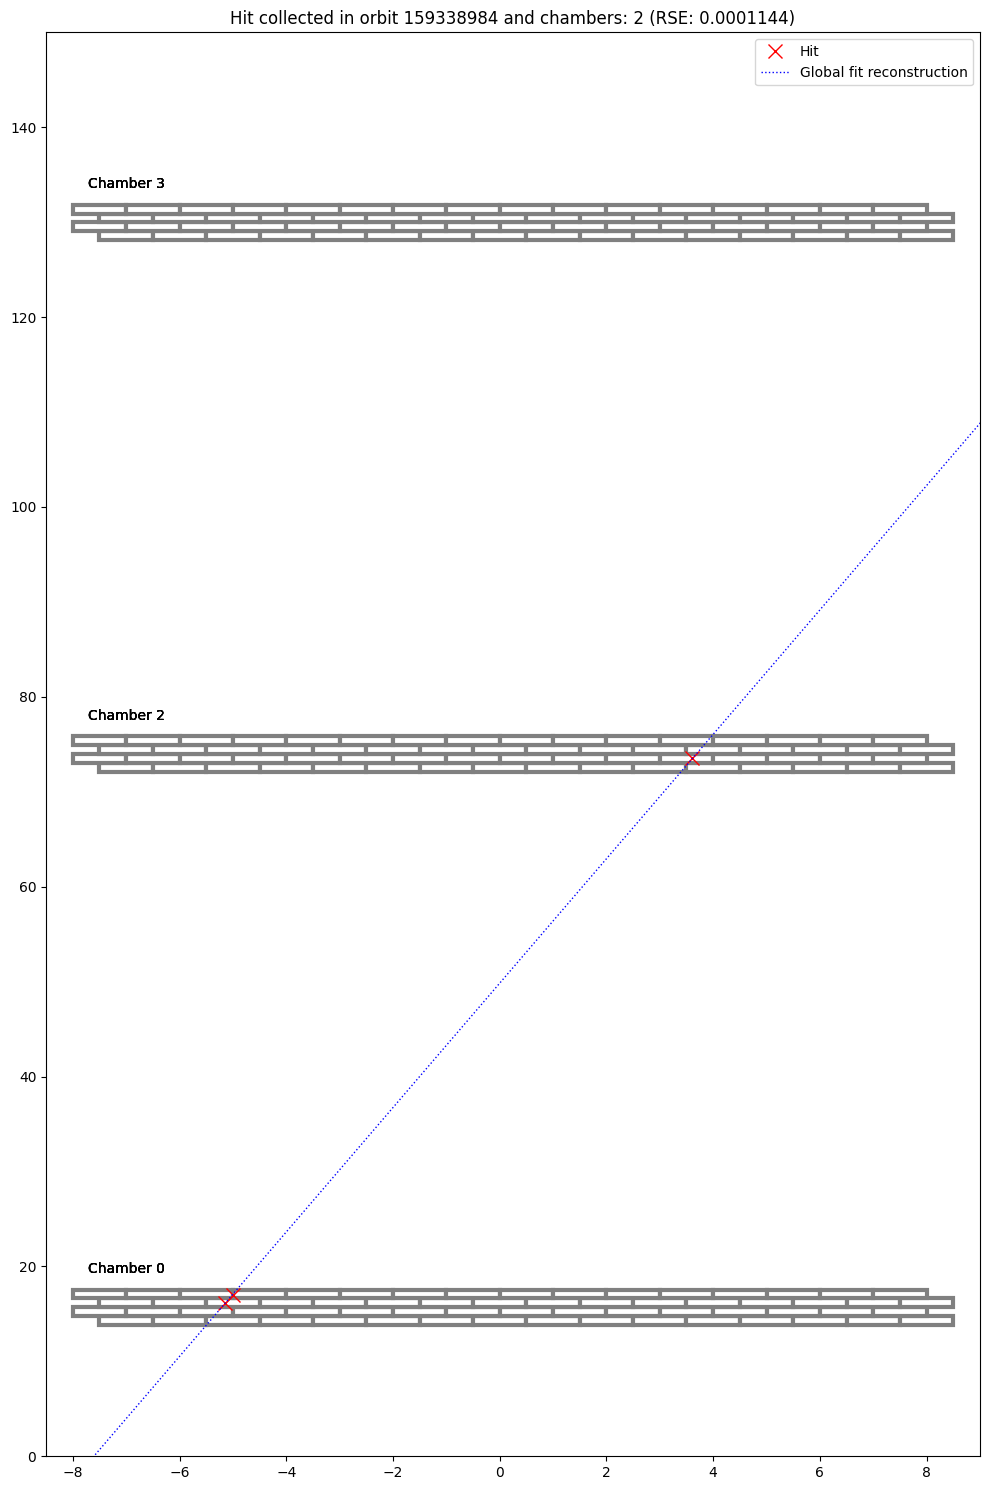

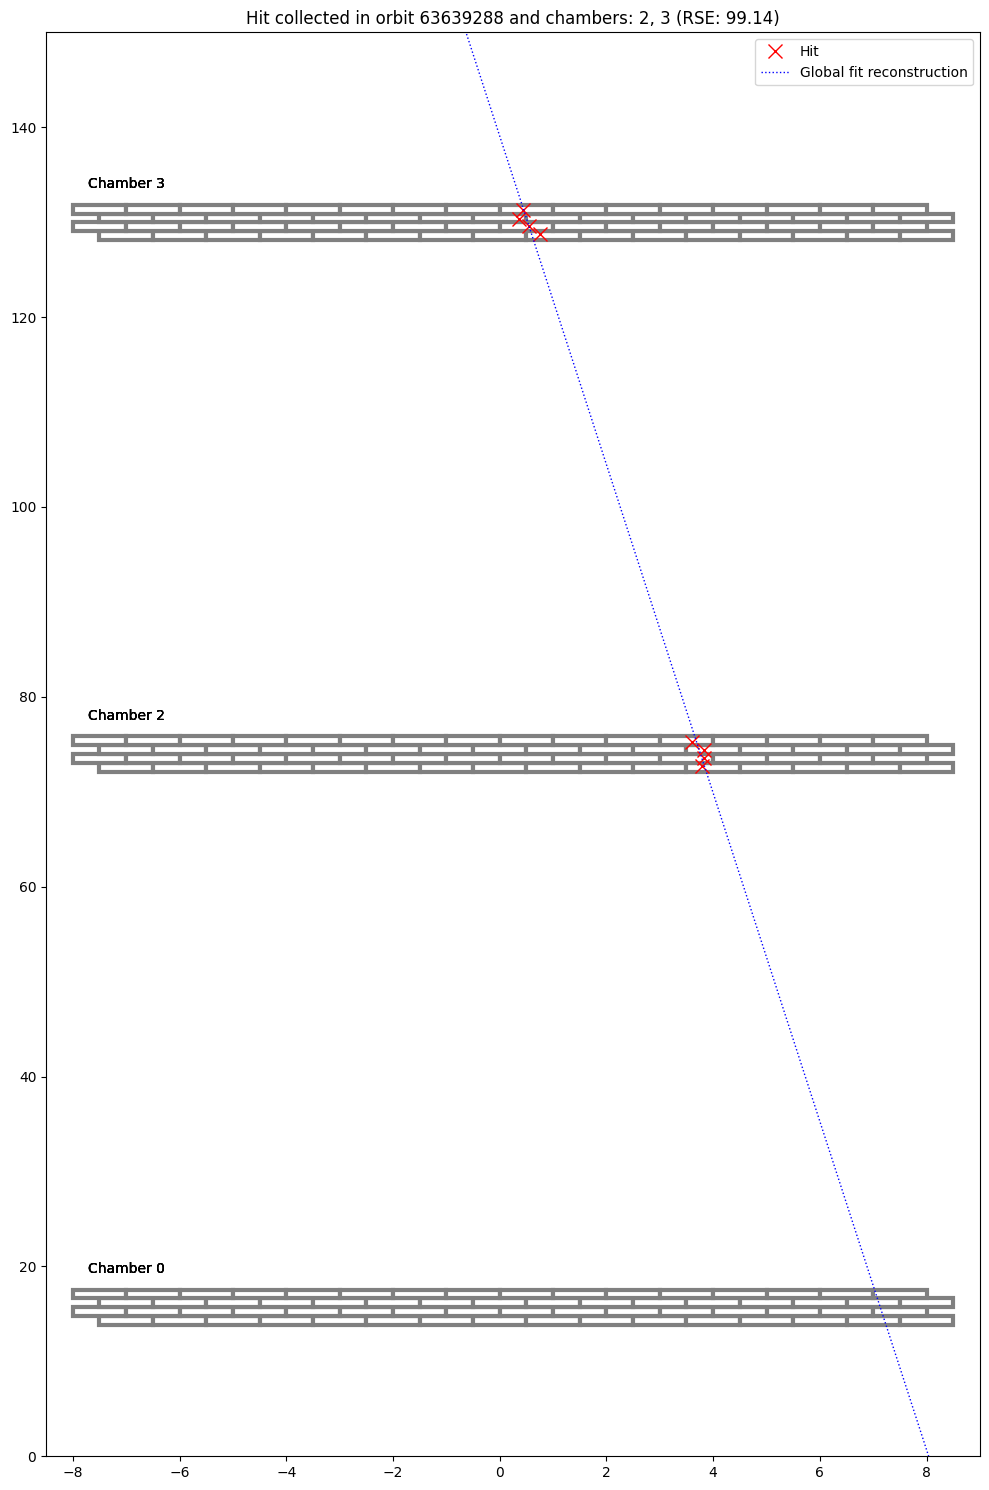

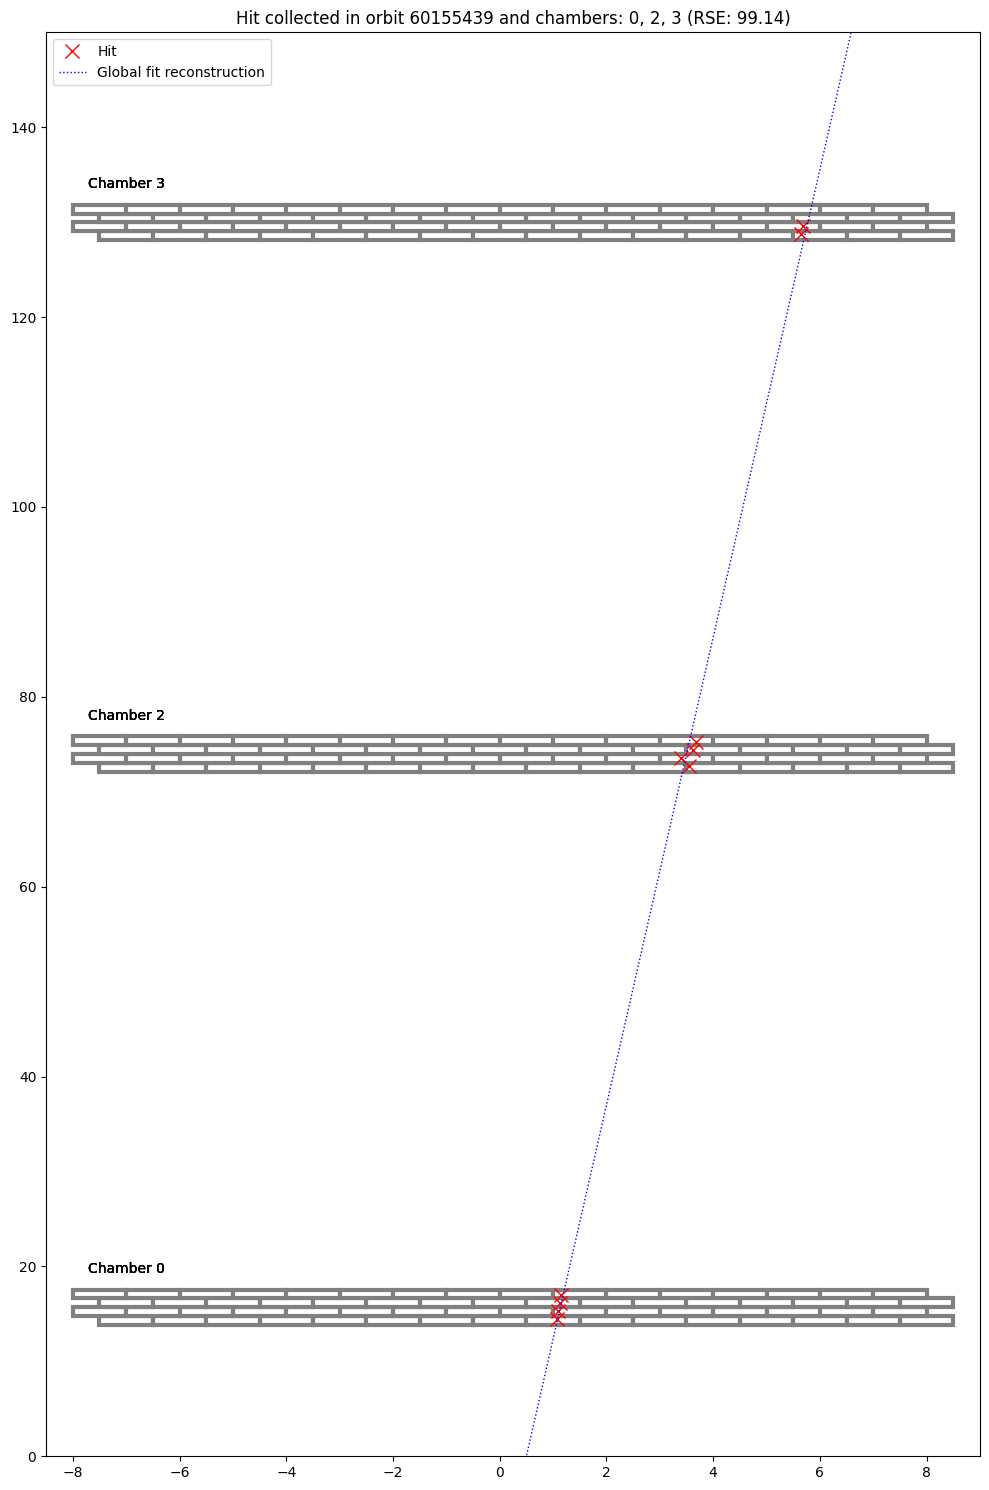

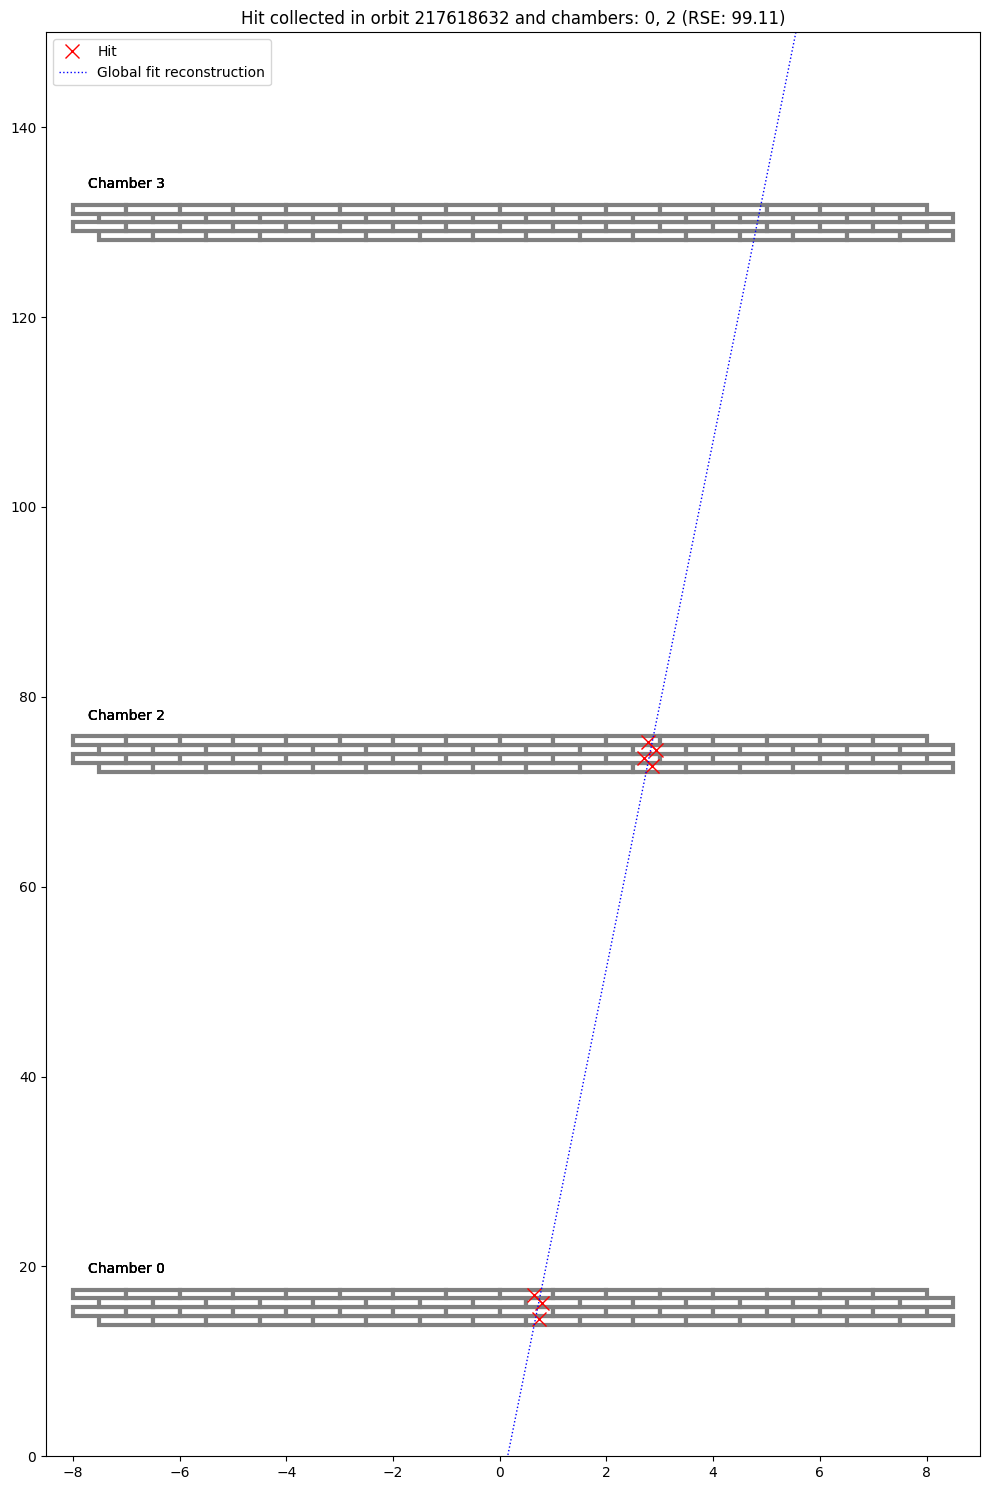

In [130]:
# Plotting best and worst results 

distinct_groups = df_global_ex.select('ORBIT', 'RSE_GLOBAL').distinct().collect()

# Indici degli elementi che vogliamo plottare, ossia i primi migliori 
# e gli ultimi peggiori 

elements = [14, 15, 16, -14, -15, -16]

for i in elements:
    orbit = distinct_groups[i]
    
    plot_glob(df_global_ex[df_global_ex.ORBIT == orbit['ORBIT']].toPandas(), islocal = False)



We have observed that in most of the cases the reconstructed track crosses only two chambers in the apparatus. Even though in some cases the slope of the straight line is such that not all the chambers are affected, we also observe other cases where, according to the fit, the muon should pass through all the three detectors. 

Let's see the number of cases in which three chambers registered the passage of a muon in the same orbit with respect to the total.

In [131]:
orbit_chamber_count = df_global_ex.groupBy('ORBIT') \
    .agg(F.countDistinct('CHAMBER').alias('chamber_count'))

# Filtra le orbite che hanno esattamente 3 camere
n_3_chambers = orbit_chamber_count.filter(F.col('chamber_count') == 3).count()

##
total_rows = df_global_ex.groupBy('ORBIT').count()

# Conta il numero totale di orbite
total_orbits = total_rows.count()

# Calculate the rate
Rate = (n_3_chambers / total_orbits) * 100

# Print the rate
print(f'Rate of 3 chambers: {Rate:.2f} %')


Rate of 3 chambers: 25.29 %


In [139]:
#write_time(f"Global tracks: {time.time() - start_time}")

## Detector angular resolution

As suggested by the guidelines, in order to provide an estimate of the angular resolution of the detector we can inspect the angular difference between the local fit in the chamber $2$ and the global fit for the same event. We expect those differences to distribute as a normal curve around zero (assuming there are no bias for the left or for the right).

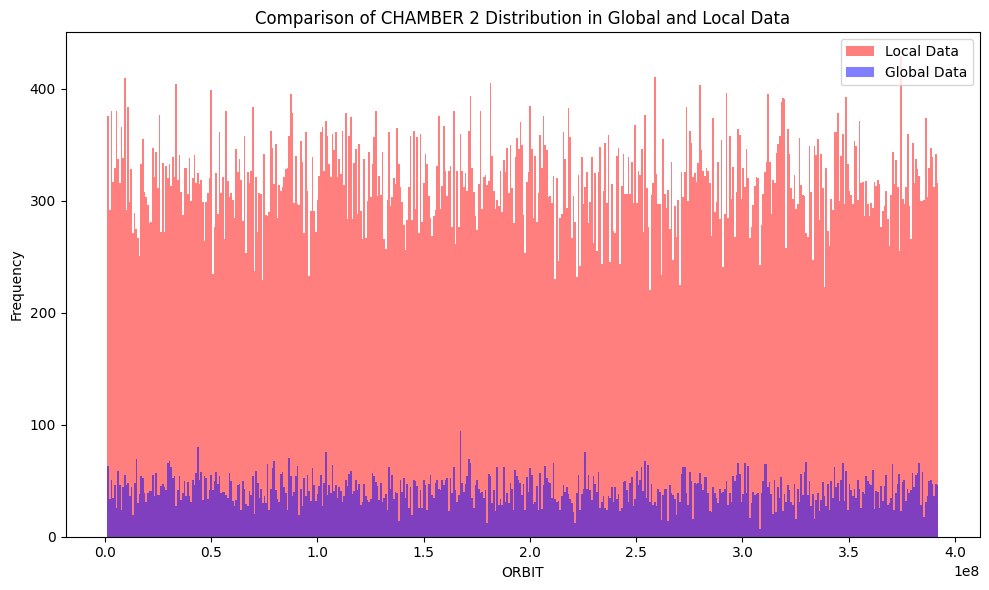

In [133]:
# Let's make an instogram to visualize the distribution of chamber 2 in df_global and df_local 

df_global_pd = df_global.filter(F.col('CHAMBER') == 2).select('ORBIT').toPandas()
df_local_pd = df_local.filter(F.col('CHAMBER') == 2).select('ORBIT').toPandas()

nbin = 500

# Plotting the combined histogram
plt.figure(figsize=(10, 6))

plt.hist(df_local_pd['ORBIT'], bins=nbin, color='red', alpha=0.5, label='Local Data')
plt.hist(df_global_pd['ORBIT'], bins=nbin, color='blue', alpha=0.5, label='Global Data')

plt.title('Comparison of CHAMBER 2 Distribution in Global and Local Data')
plt.xlabel('ORBIT')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [134]:
df_global.show(10)

+---------+-------+-----+-----+-------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+-----------------+-------------------+-------------------+------------------+--------------------+
|    ORBIT|CHAMBER|LAYER|SCINT|             X_LEFT|            X_RIGHT|             X_TRUE|                 Z|           X_GLOBAL|          Z_GLOBAL|           M_GLOBAL|         Q_GLOBAL|         RSE_GLOBAL|                  M|                 Q|                 RSE|
+---------+-------+-----+-----+-------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+-----------------+-------------------+-------------------+------------------+--------------------+
|216002610|      3|    1|    0|   -148.51879921875|   -145.48120078125|   -148.51879921875| 1839.300048828125|   -148.51879921875| 1839.300048828125|-2.9909489746274347|1395.050267648488|0.0701016

In [135]:
df_global = df_global.withColumnRenamed("M", "M_RENAMED")

df_angles = df_local.filter(col("CHAMBER") == 2)\
                    .join(df_global, on = "ORBIT", how = "inner")\
                    .select("ORBIT", "M", "M_GLOBAL")

df_angles = df_angles.withColumn("ANGLE", F.atan(F.col("M"))) \
                     .withColumn("ANGLE_GLOBAL", F.atan(F.col("M_GLOBAL"))) \
                     .withColumn("ANGLE_DIFF", (F.col("ANGLE") - F.col("ANGLE_GLOBAL")) * 1000)

df_angles = df_angles.drop("M", "M_GLOBAL")

df_angles.show(100)

+---------+-------------------+-------------------+-------------------+
|    ORBIT|              ANGLE|       ANGLE_GLOBAL|         ANGLE_DIFF|
+---------+-------------------+-------------------+-------------------+
|147514629|-1.2600274831245115|-1.2504828236244983| -9.544659500013264|
|147514629|-1.2600274831245115|-1.2504828236244983| -9.544659500013264|
|147514629|-1.2600274831245115|-1.2504828236244983| -9.544659500013264|
|147514629|-1.2600274831245115|-1.2504828236244983| -9.544659500013264|
|147514629|-1.2600274831245115|-1.2504828236244983| -9.544659500013264|
|147514629|-1.2600274831245115|-1.2504828236244983| -9.544659500013264|
|147514629|-1.2600274831245115|-1.2504828236244983| -9.544659500013264|
|147514629|-1.2600274831245115|-1.2504828236244983| -9.544659500013264|
|147514629|-1.2600274831245115|-1.2504828236244983| -9.544659500013264|
|147514629|-1.2600274831245115|-1.2504828236244983| -9.544659500013264|
|147514629|-1.2600274831245115|-1.2504828236244983| -9.544659500

Mean = 0.0537985807444814
Standard deviation = 11.82579617053441


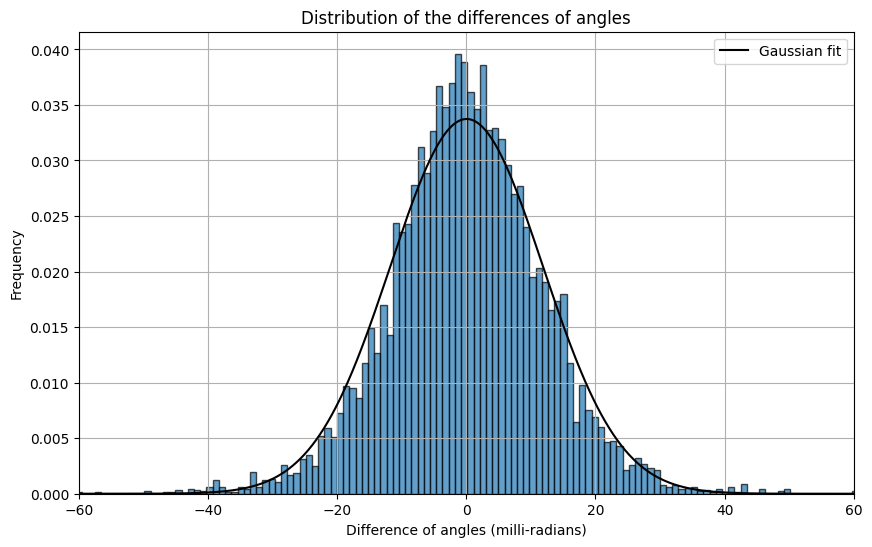

In [136]:
angle_diff = df_angles.rdd.map(lambda row: (row["ANGLE_DIFF"])).collect()

mu, s = stats.norm.fit(angle_diff)
p = stats.norm.pdf(np.linspace(-60, 60, 1000), mu, s)

plt.figure(figsize = (10, 6))
plt.hist(angle_diff, bins = 150, edgecolor = 'black', alpha = 0.7, density = True)
plt.title('Distribution of the differences of angles')
plt.xlabel('Difference of angles (milli-radians)')
plt.ylabel('Frequency')
plt.xlim(-60, 60)

plt.plot(np.linspace(-60, 60, 1000), p, 'k', label = 'Gaussian fit')
print(f"Mean = {mu}")
print(f"Standard deviation = {s}")

plt.grid(True)
plt.legend()
plt.show()

In [137]:
## NOW TRYING AGAIN WITH DF_GLOBAL_EXTENDED

df_global_ex = df_global_ex.withColumnRenamed("M", "M_RENAMED")

df_angles = df_local.filter(col("CHAMBER") == 2)\
                    .join(df_global_ex, on = "ORBIT", how = "inner")\
                    .select("ORBIT", "M", "M_GLOBAL")

df_angles = df_angles.withColumn("ANGLE", F.atan(F.col("M"))) \
                     .withColumn("ANGLE_GLOBAL", F.atan(F.col("M_GLOBAL"))) \
                     .withColumn("ANGLE_DIFF", (F.col("ANGLE") - F.col("ANGLE_GLOBAL")) * 1000)

df_angles = df_angles.drop("M", "M_GLOBAL")

df_angles.show(10)


+---------+------------------+------------------+-----------------+
|    ORBIT|             ANGLE|      ANGLE_GLOBAL|       ANGLE_DIFF|
+---------+------------------+------------------+-----------------+
|298376858|1.4188561387191143|1.4768136728188117|-57.9575340996974|
|298376858|1.4188561387191143|1.4768136728188117|-57.9575340996974|
|298376858|1.4188561387191143|1.4768136728188117|-57.9575340996974|
|298376858|1.4188561387191143|1.4768136728188117|-57.9575340996974|
|298376858|1.4188561387191143|1.4768136728188117|-57.9575340996974|
|298376858|1.4188561387191143|1.4768136728188117|-57.9575340996974|
|298376858|1.4188561387191143|1.4768136728188117|-57.9575340996974|
|298376858|1.4188561387191143|1.4768136728188117|-57.9575340996974|
|298376858|1.4188561387191143|1.4768136728188117|-57.9575340996974|
|298376858|1.4188561387191143|1.4768136728188117|-57.9575340996974|
+---------+------------------+------------------+-----------------+
only showing top 10 rows



Mean = -24.919629530108725
Standard deviation = 684.7277590332687


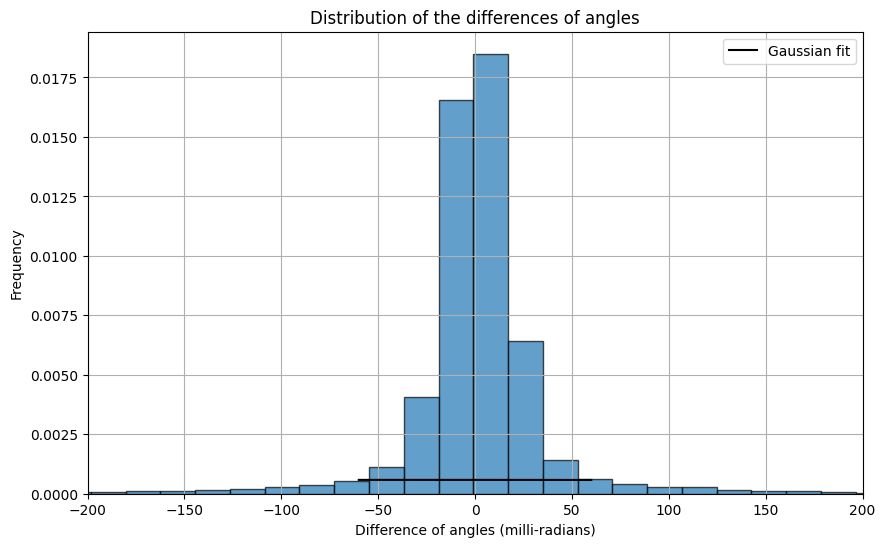

In [138]:
#df_angles = df_angles.persist()

angle_diff = df_angles.rdd.map(lambda row: (row["ANGLE_DIFF"])).collect()

mu, s = stats.norm.fit(angle_diff)
p = stats.norm.pdf(np.linspace(-60, 60, 1000), mu, s)

plt.figure(figsize = (10, 6))
plt.hist(angle_diff, bins = 350, edgecolor = 'black', alpha = 0.7, density = True)
plt.title('Distribution of the differences of angles')
plt.xlabel('Difference of angles (milli-radians)')
plt.ylabel('Frequency')
plt.xlim(-200, 200)

plt.plot(np.linspace(-60, 60, 1000), p, 'k', label = 'Gaussian fit')
print(f"Mean = {mu}")
print(f"Standard deviation = {s}")

plt.grid(True)
plt.legend()
plt.show()

**PARTE IN PANDAS** 

In [ ]:
df_angles = pd.merge(df_local[df_local['CHAMBER'] == 2], df_global, on = 'ORBIT')[['ORBIT', 'M', 'M_GLOBAL']]

df_angles['ANGLE']        = df_angles['M'].apply(np.arctan)
df_angles['ANGLE_GLOBAL'] = df_angles['M_GLOBAL'].apply(np.arctan)

df_angles = df_angles.drop(columns = ['M', 'M_GLOBAL'])

df_angles['ANGLE_DIFF'] = (df_angles['ANGLE'] - df_angles['ANGLE_GLOBAL']) * 1000

df_angles

Let's make a gaussian fit with the function `stats.norm.fit()` from the `scipy` package.

In [ ]:
mu, s = stats.norm.fit(df_angles['ANGLE_DIFF'])
p = stats.norm.pdf(np.linspace(-60, 60, 1000), mu, s)

plt.figure(figsize = (10, 6))
plt.hist(df_angles['ANGLE_DIFF'], bins = 25, edgecolor = 'black', alpha = 0.7, density = True)
plt.title('Distribution of the differences of angles')
plt.xlabel('Difference of angles (milli-radians)')
plt.ylabel('Frequency')
plt.xlim(-60, 60)

plt.plot(np.linspace(-60, 60, 1000), p, 'k', label = 'Gaussian fit')
print(f"Mean = {mu}")
print(f"Standard deviation = {s}")

plt.grid(True)
plt.legend()
plt.show()

Data follows what expected. Of course, we cannot be very accurate since we miss some valuable information (error on the chamber hit time, error on the scintillator hit time and so on), but we can say that the angular resolution is strongly related to the standard deviation of the curve that fits our histogram. Hence, our estimated angular resolution $\sigma\simeq11.43 \ mrad$, which corresponds to $\sim0.65°$.

In [ ]:
write_time(f"Detector angular resolution: {time.time() - start_time}")
file.close()

In [ ]:
sc.stop()
spark.stop()